In [154]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline
import pickle as pickle
# 이거 데이터프레임 숫자 표시 개수 정해주는 거
pd.options.display.float_format = '{:.4f}'.format
import warnings
warnings.filterwarnings('ignore')
import matplotlib.gridspec as gridspec

In [2]:
dev_loss_nost = pd.read_csv('/opt/ml/code/prediction/0_dev_loss_nost.csv')
dev_loss_st = pd.read_csv('/opt/ml/code/prediction/0_dev_loss_st.csv')
dev_nost = pd.read_csv('/opt/ml/code/prediction/0_dev_nost.csv')
dev_st = pd.read_csv('/opt/ml/code/prediction/0_dev.csv')

In [3]:
train = pd.read_csv('/opt/ml/dataset/train/train.csv')
test_nost = pd.read_csv('/opt/ml/code/prediction/0_test_nost.csv')
test_st = pd.read_csv('/opt/ml/code/prediction/0_test_st.csv')
sub = pd.read_csv('/opt/ml/code/prediction/19_klue-roberta-small.csv')

In [17]:
train

,id,sentence,subject_entity,object_entity,label,source
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",no_relation,wikipedia
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikitree
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...",org:member_of,wikitree
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...",org:top_members/employees,wikitree
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia
...,...,...,...,...,...,...
32465,32465,한국당은 7일 오전 9시부터 오후 5시까지 진행된 원내대표 및 정책위의장 후보자 등...,"{'word': '유기준', 'start_idx': 93, 'end_idx': 95...","{'word': '부산 서구·동구', 'start_idx': 100, 'end_id...",per:employee_of,wikitree
32466,32466,"법포는 다시 최시형, 서병학, 손병희 직계인 북접과 다시 서장옥, 전봉준, 김개남을...","{'word': '최시형', 'start_idx': 7, 'end_idx': 9, ...","{'word': '손병희', 'start_idx': 17, 'end_idx': 19...",per:colleagues,wikipedia
32467,32467,완도군(군수 신우철)이 국토교통부에서 실시한 '2019 교통문화지수 실태조사'에서 ...,"{'word': '완도군', 'start_idx': 0, 'end_idx': 2, ...","{'word': '신우철', 'start_idx': 7, 'end_idx': 9, ...",org:top_members/employees,wikitree
32468,32468,"중앙일보, JTBC 회장을 지낸 이후 중앙홀딩스 회장, 재단법인 한반도평화만들기 이...","{'word': 'JTBC', 'start_idx': 6, 'end_idx': 9,...","{'word': '중앙홀딩스', 'start_idx': 21, 'end_idx': ...",no_relation,wikipedia


In [18]:
dev_loss_nost

,id,gold_label,pred_label,probs
0,2893,per:other_family,per:other_family,"[0.02351098135113716, 8.021946996450424e-05, 9..."
1,25844,per:origin,per:origin,"[3.221247243345715e-05, 0.000273466226644814, ..."
2,17759,per:colleagues,per:colleagues,"[0.003172215074300766, 5.874208363820799e-05, ..."
3,10515,per:parents,per:parents,"[0.00031502090860158205, 2.6371824787929654e-0..."
4,12680,no_relation,no_relation,"[0.579675018787384, 0.00018760505190584809, 2...."
...,...,...,...,...
6489,23174,org:top_members/employees,org:top_members/employees,"[1.6761961887823418e-05, 0.9997926354408264, 2..."
6490,24775,org:top_members/employees,org:top_members/employees,"[1.3662452147400472e-05, 0.9998244643211365, 2..."
6491,26311,no_relation,no_relation,"[0.7584547400474548, 0.0010088387643918395, 0...."
6492,5937,no_relation,no_relation,"[0.9996925592422485, 3.084952550125308e-05, 7...."


In [19]:
dev_loss_st

,id,gold_label,pred_label,probs
0,9127,org:top_members/employees,org:top_members/employees,"[4.229257228871575e-06, 0.999854564666748, 2.8..."
1,18956,org:top_members/employees,org:top_members/employees,"[4.469017767405603e-06, 0.9998706579208374, 4...."
2,13521,per:title,per:title,"[5.788671842310578e-06, 1.319528109888779e-05,..."
3,31250,org:founded,org:founded,"[7.26467897038674e-06, 7.791402822476812e-06, ..."
4,14236,no_relation,no_relation,"[0.9999388456344604, 6.0610809669015e-06, 2.92..."
...,...,...,...,...
6489,269,per:title,per:title,"[1.196963967231568e-05, 7.841359547455795e-06,..."
6490,1379,org:alternate_names,org:alternate_names,"[0.0007559560472145677, 7.358557922998443e-06,..."
6491,8825,per:children,per:children,"[1.5807643649168313e-05, 9.747369040269405e-05..."
6492,28301,org:place_of_headquarters,org:place_of_headquarters,"[8.110693670460023e-06, 3.888205174007453e-05,..."


In [20]:
dev_nost

,id,gold_label,pred_label,probs
0,2893,per:other_family,per:other_family,"[0.0037233829498291016, 4.437719690031372e-05,..."
1,25844,per:origin,per:origin,"[1.8377078959019855e-05, 0.0001503239473095163..."
2,17759,per:colleagues,per:colleagues,"[0.001198279089294374, 3.319122697575949e-05, ..."
3,10515,per:parents,per:parents,"[0.00021009040938224643, 4.1742092435015365e-0..."
4,12680,no_relation,no_relation,"[0.5147453546524048, 0.00010344749898649752, 1..."
...,...,...,...,...
6489,23174,org:top_members/employees,org:top_members/employees,"[1.4544129953719676e-05, 0.9998385906219482, 2..."
6490,24775,org:top_members/employees,org:top_members/employees,"[1.0684536391636357e-05, 0.9998658895492554, 1..."
6491,26311,no_relation,no_relation,"[0.586336612701416, 0.0010929176351055503, 0.0..."
6492,5937,no_relation,no_relation,"[0.9997221827507019, 2.117765325237997e-05, 4...."


In [21]:
dev_st

,id,gold_label,pred_label,probs
0,9127,org:top_members/employees,org:top_members/employees,"[4.229257228871575e-06, 0.999854564666748, 2.8..."
1,18956,org:top_members/employees,org:top_members/employees,"[4.469017767405603e-06, 0.9998706579208374, 4...."
2,13521,per:title,per:title,"[5.788671842310578e-06, 1.319528109888779e-05,..."
3,31250,org:founded,org:founded,"[7.26467897038674e-06, 7.791402822476812e-06, ..."
4,14236,no_relation,no_relation,"[0.9999388456344604, 6.0610809669015e-06, 2.92..."
...,...,...,...,...
6489,269,per:title,per:title,"[1.196963967231568e-05, 7.841359547455795e-06,..."
6490,1379,org:alternate_names,org:alternate_names,"[0.0007559560472145677, 7.358557922998443e-06,..."
6491,8825,per:children,per:children,"[1.5807643649168313e-05, 9.747369040269405e-05..."
6492,28301,org:place_of_headquarters,org:place_of_headquarters,"[8.110693670460023e-06, 3.888205174007453e-05,..."


In [22]:
test_nost

,id,gold_label,pred_label,probs
0,0,100,org:members,"[0.00057884311536327, 0.0002180445153499022, 0..."
1,1,100,per:alternate_names,"[3.022115151907201e-06, 4.5307548134587705e-05..."
2,2,100,no_relation,"[0.9998899698257446, 7.715317224210594e-06, 7...."
3,3,100,per:other_family,"[0.41120561957359314, 0.00021089380607008934, ..."
4,4,100,org:top_members/employees,"[0.0012245755642652512, 0.9984153509140015, 4...."
...,...,...,...,...
7760,7760,100,no_relation,"[0.6559950709342957, 0.0007126444834284484, 0...."
7761,7761,100,no_relation,"[0.999886155128479, 4.993907168682199e-06, 8.0..."
7762,7762,100,org:top_members/employees,"[1.0821405339811463e-05, 0.999811589717865, 2...."
7763,7763,100,no_relation,"[0.9923446774482727, 0.00013847206719219685, 3..."


In [23]:
dev_loss_nost[dev_loss_nost['gold_label']!=dev_loss_nost['pred_label']]

,id,gold_label,pred_label,probs
9,2678,org:political/religious_affiliation,no_relation,"[0.9324898719787598, 0.0002827853604685515, 0...."
20,1331,per:parents,per:children,"[2.6619014533935115e-05, 6.788333848817274e-05..."
28,12900,per:colleagues,no_relation,"[0.9991039633750916, 4.10787615692243e-05, 7.6..."
37,16397,no_relation,org:place_of_headquarters,"[0.00024367167497985065, 5.263893035589717e-05..."
41,16580,no_relation,per:colleagues,"[0.003275593975558877, 3.9721111534163356e-05,..."
...,...,...,...,...
6472,27212,no_relation,org:member_of,"[0.21273280680179596, 0.00023621201398782432, ..."
6477,1108,org:member_of,no_relation,"[0.9977731108665466, 0.00010144322732230648, 0..."
6478,8628,per:employee_of,per:origin,"[6.046368071110919e-06, 8.442984108114615e-05,..."
6482,31981,org:top_members/employees,no_relation,"[0.9998424053192139, 2.554232742113527e-05, 4...."


In [24]:
dev_loss_st[dev_loss_st['gold_label']!=dev_loss_st['pred_label']]

,id,gold_label,pred_label,probs
19,9018,org:founded_by,no_relation,"[0.9990372657775879, 0.0005159031716175377, 3...."
20,10441,per:parents,per:alternate_names,"[5.556320320465602e-05, 2.075536576739978e-05,..."
26,8414,per:place_of_residence,per:origin,"[4.840868496103212e-05, 4.689094566856511e-05,..."
32,18870,per:title,per:spouse,"[0.0034515236038714647, 0.00037151676951907575..."
43,14754,no_relation,per:colleagues,"[5.89135306654498e-05, 2.00111808226211e-05, 4..."
...,...,...,...,...
6468,7294,org:members,org:place_of_headquarters,"[0.002682080492377281, 0.0006530994432978332, ..."
6469,21346,per:place_of_residence,per:place_of_birth,"[1.5942834579618648e-05, 5.6649827456567436e-0..."
6474,955,no_relation,per:other_family,"[0.13481692969799042, 7.04499616404064e-05, 0...."
6478,8331,no_relation,per:colleagues,"[0.0009706506389193237, 0.000122888115583919, ..."


In [25]:
len(dev_loss_st[dev_loss_st['gold_label']!=dev_loss_st['pred_label']])

1322

In [26]:
nost = dev_loss_nost[dev_loss_nost['gold_label']!=dev_loss_nost['pred_label']]
st = dev_loss_st[dev_loss_st['gold_label']!=dev_loss_st['pred_label']]

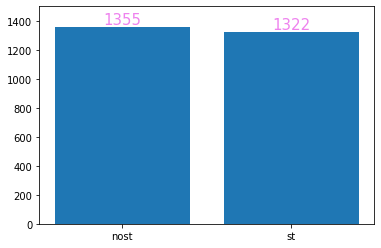

In [27]:
x = ['nost','st']
y = [len(nost),len(st)]
plt.bar(x ,y)
plt.ylim((0,1500))
for i, v in enumerate(x):
    plt.text(v, y[i], y[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 15, 
             color='violet',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)
plt.show()

In [28]:
dn_nomatch=dev_loss_nost[dev_loss_nost['gold_label']!=dev_loss_nost['pred_label']]
ds_nomatch=dev_loss_st[dev_loss_st['gold_label']!=dev_loss_st['pred_label']]

In [29]:
dn_nomatch.iloc[0].values

array([2678, 'org:political/religious_affiliation', 'no_relation',
       '[0.9324898719787598, 0.0002827853604685515, 0.0004275538376532495, 0.0004482753574848175, 0.00010598051449051127, 0.0007119640940800309, 0.0002151528897229582, 0.00020652037346735597, 0.001787026645615697, 0.00011726900993380696, 2.9801205528201535e-05, 0.00012296123895794153, 6.151590059744194e-05, 0.00018041771545540541, 0.00014904142881277949, 0.00028722514980472624, 1.219578643940622e-05, 2.281767228851095e-05, 0.0005300203920342028, 0.05990824103355408, 0.0006274333572946489, 5.568623237195425e-05, 0.00036383772385306656, 6.0461075918283314e-05, 3.483349792077206e-05, 4.342973625170998e-05, 5.508753929461818e-06, 5.2256029448471963e-05, 0.00044086045818403363, 0.0002190466329921037]'],
      dtype=object)

In [30]:
num_label = []
label = dev_loss_st['gold_label'].unique()
with open('/opt/ml/code/dict_label_to_num.pkl', 'rb') as f:
    dict_label_to_num = pickle.load(f)
    for v in label:
        num_label.append(dict_label_to_num[v])

In [31]:
label

array(['org:top_members/employees', 'per:title', 'org:founded',
       'no_relation', 'per:alternate_names', 'per:employee_of',
       'per:spouse', 'org:member_of', 'org:founded_by', 'per:parents',
       'per:date_of_death', 'per:place_of_residence',
       'org:place_of_headquarters', 'org:alternate_names',
       'per:date_of_birth', 'per:origin', 'per:colleagues',
       'per:place_of_birth', 'per:product', 'org:members', 'per:children',
       'org:product', 'per:other_family', 'per:religion', 'per:siblings',
       'org:dissolved', 'org:number_of_employees/members',
       'org:political/religious_affiliation', 'per:place_of_death',
       'per:schools_attended'], dtype=object)

In [32]:
pd.DataFrame([dev_loss_st['gold_label'].unique()],columns=num_label).sort_index(axis=1)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,no_relation,org:top_members/employees,org:members,org:product,per:title,org:alternate_names,per:employee_of,org:place_of_headquarters,per:product,org:number_of_employees/members,...,org:member_of,per:parents,org:dissolved,per:schools_attended,per:date_of_death,per:date_of_birth,per:place_of_birth,per:place_of_death,org:founded_by,per:religion


In [33]:
pd.DataFrame([dict_label_to_num])

,no_relation,org:top_members/employees,org:members,org:product,per:title,org:alternate_names,per:employee_of,org:place_of_headquarters,per:product,org:number_of_employees/members,...,org:member_of,per:parents,org:dissolved,per:schools_attended,per:date_of_death,per:date_of_birth,per:place_of_birth,per:place_of_death,org:founded_by,per:religion
0,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29


In [35]:
def pred_pd(dev_dataset,label_dict):
    # 데이터 프레임
    temp = dev_dataset['probs'].apply(lambda x: pd.Series(np.array(eval(x))))
    temp.columns=label_dict
    concatSet = pd.concat([dev_dataset[['id','gold_label','pred_label']],temp],axis=1)
    second_label=[]
    second_prob=[]
    pred_prob=[]
    gold_prob=[]
    prob_diff=[]
    prse_diff=[]
    for i,r in concatSet.iterrows():
        prob_sort = r[3:].sort_values()
        second_label.append(prob_sort.keys()[-2])
        second_prob.append(prob_sort[-2])
        pred_prob.append(r[concatSet['pred_label'][i]])
        gold_prob.append(r[concatSet['gold_label'][i]])
        prob_diff.append(r[concatSet['pred_label'][i]]-r[concatSet['gold_label'][i]])    
        prse_diff.append(r[concatSet['pred_label'][i]]-prob_sort[-2])
    concatSet['second_label'] = second_label
    concatSet['second_prob'] = second_prob
    concatSet['pred_prob'] = pred_prob
    concatSet['gold_prob'] = gold_prob
    concatSet['prob_diff'] = prob_diff
    concatSet['prse_diff'] = prse_diff
    del temp,  pred_prob, gold_prob, prob_diff, prob_sort, second_label, second_prob, prse_diff
    return concatSet

In [36]:
full_dev_st = pred_pd(dev_loss_st,dict_label_to_num)

In [37]:
full_dev_st.head(5)

,id,gold_label,pred_label,no_relation,org:top_members/employees,org:members,org:product,per:title,org:alternate_names,per:employee_of,...,per:place_of_birth,per:place_of_death,org:founded_by,per:religion,second_label,second_prob,pred_prob,gold_prob,prob_diff,prse_diff
0,9127,org:top_members/employees,org:top_members/employees,0.0000,0.9999,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,per:title,0.0000,0.9999,0.9999,0.0000,0.9998
1,18956,org:top_members/employees,org:top_members/employees,0.0000,0.9999,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,org:founded_by,0.0000,0.9999,0.9999,0.0000,0.9999
2,13521,per:title,per:title,0.0000,0.0000,0.0000,0.0000,0.9997,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,per:parents,0.0000,0.9997,0.9997,0.0000,0.9997
3,31250,org:founded,org:founded,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0001,0.0000,org:dissolved,0.0002,0.9990,0.9990,0.0000,0.9988
4,14236,no_relation,no_relation,0.9999,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,org:member_of,0.0000,0.9999,0.9999,0.0000,0.9999


In [38]:
train

,id,sentence,subject_entity,object_entity,label,source
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",no_relation,wikipedia
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikitree
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...",org:member_of,wikitree
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...",org:top_members/employees,wikitree
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia
...,...,...,...,...,...,...
32465,32465,한국당은 7일 오전 9시부터 오후 5시까지 진행된 원내대표 및 정책위의장 후보자 등...,"{'word': '유기준', 'start_idx': 93, 'end_idx': 95...","{'word': '부산 서구·동구', 'start_idx': 100, 'end_id...",per:employee_of,wikitree
32466,32466,"법포는 다시 최시형, 서병학, 손병희 직계인 북접과 다시 서장옥, 전봉준, 김개남을...","{'word': '최시형', 'start_idx': 7, 'end_idx': 9, ...","{'word': '손병희', 'start_idx': 17, 'end_idx': 19...",per:colleagues,wikipedia
32467,32467,완도군(군수 신우철)이 국토교통부에서 실시한 '2019 교통문화지수 실태조사'에서 ...,"{'word': '완도군', 'start_idx': 0, 'end_idx': 2, ...","{'word': '신우철', 'start_idx': 7, 'end_idx': 9, ...",org:top_members/employees,wikitree
32468,32468,"중앙일보, JTBC 회장을 지낸 이후 중앙홀딩스 회장, 재단법인 한반도평화만들기 이...","{'word': 'JTBC', 'start_idx': 6, 'end_idx': 9,...","{'word': '중앙홀딩스', 'start_idx': 21, 'end_idx': ...",no_relation,wikipedia


In [39]:
train['subject_entity'].apply(lambda x: pd.Series(eval(x)))

,word,start_idx,end_idx,type
0,비틀즈,24,26,ORG
1,민주평화당,19,23,ORG
2,광주FC,21,24,ORG
3,아성다이소,13,17,ORG
4,요미우리 자이언츠,22,30,ORG
...,...,...,...,...
32465,유기준,93,95,PER
32466,최시형,7,9,PER
32467,완도군,0,2,ORG
32468,JTBC,6,9,ORG


In [149]:
subjt=train['subject_entity'].apply(lambda x: pd.Series(eval(x))).add_prefix('subj_')
objt=train['object_entity'].apply(lambda x: pd.Series(eval(x))).add_prefix('obj_')
full_train = pd.concat([train[['id','sentence','label','source']],subjt,objt],axis=1)

In [150]:
full_train

,id,sentence,label,source,subj_word,subj_start_idx,subj_end_idx,subj_type,obj_word,obj_start_idx,obj_end_idx,obj_type
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,no_relation,wikipedia,비틀즈,24,26,ORG,조지 해리슨,13,18,PER
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,no_relation,wikitree,민주평화당,19,23,ORG,대안신당,14,17,ORG
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,org:member_of,wikitree,광주FC,21,24,ORG,한국프로축구연맹,34,41,ORG
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,org:top_members/employees,wikitree,아성다이소,13,17,ORG,박정부,22,24,PER
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,no_relation,wikipedia,요미우리 자이언츠,22,30,ORG,1967,0,3,DAT
...,...,...,...,...,...,...,...,...,...,...,...,...
32465,32465,한국당은 7일 오전 9시부터 오후 5시까지 진행된 원내대표 및 정책위의장 후보자 등...,per:employee_of,wikitree,유기준,93,95,PER,부산 서구·동구,100,107,LOC
32466,32466,"법포는 다시 최시형, 서병학, 손병희 직계인 북접과 다시 서장옥, 전봉준, 김개남을...",per:colleagues,wikipedia,최시형,7,9,PER,손병희,17,19,PER
32467,32467,완도군(군수 신우철)이 국토교통부에서 실시한 '2019 교통문화지수 실태조사'에서 ...,org:top_members/employees,wikitree,완도군,0,2,ORG,신우철,7,9,PER
32468,32468,"중앙일보, JTBC 회장을 지낸 이후 중앙홀딩스 회장, 재단법인 한반도평화만들기 이...",no_relation,wikipedia,JTBC,6,9,ORG,중앙홀딩스,21,25,ORG


In [42]:
def train_pred(train,pred):
    subjt=train['subject_entity'].apply(lambda x: pd.Series(eval(x))).add_prefix('subj_')
    objt=train['object_entity'].apply(lambda x: pd.Series(eval(x))).add_prefix('obj_')
    full_train = pd.concat([train[['id','sentence','source']],subjt,objt],axis=1)
    out_pd = pd.merge(full_train,pred,on='id',how='right')
    del subjt,objt,full_train
    return out_pd

In [43]:
tp = train_pred(train,full_dev_st)

In [44]:
tp

,id,sentence,source,subj_word,subj_start_idx,subj_end_idx,subj_type,obj_word,obj_start_idx,obj_end_idx,...,per:place_of_birth,per:place_of_death,org:founded_by,per:religion,second_label,second_prob,pred_prob,gold_prob,prob_diff,prse_diff
0,9127,이 돈가스집은 백종원 더본코리아 대표가 지난해 11월 ‘골목식당‘ 서울 홍은동 포방...,wikitree,더본코리아,12,16,ORG,백종원,8,10,...,0.0000,0.0000,0.0000,0.0000,per:title,0.0000,0.9999,0.9999,0.0000,0.9998
1,18956,경기 양평군(군수 정동균)은 지난 18일 별관4층 대회의실에서 2030년까지 양평의...,wikitree,양평군,3,5,ORG,정동균,10,12,...,0.0000,0.0000,0.0000,0.0000,org:founded_by,0.0000,0.9999,0.9999,0.0000,0.9999
2,13521,올시즌 프로에 데뷔한 센터백 최규백이 2016년 하계 올림픽 국가대표팀으로 발탁되었다.,wikipedia,최규백,16,18,PER,센터백,12,14,...,0.0000,0.0000,0.0000,0.0000,per:parents,0.0000,0.9997,0.9997,0.0000,0.9997
3,31250,NTSB는 1967년 4월 1일 대통령 직속기관으로 설립되었다.,wikipedia,NTSB,0,3,ORG,1967년 4월 1일,6,16,...,0.0000,0.0000,0.0001,0.0000,org:dissolved,0.0002,0.9990,0.9990,0.0000,0.9988
4,14236,리그 우승으로 2007 AFC 챔피언스리그 티켓을 획득한 성남은 조별 예선과 8강전...,wikipedia,우라와 레드 다이아몬즈,69,80,ORG,2007,8,11,...,0.0000,0.0000,0.0000,0.0000,org:member_of,0.0000,0.9999,0.9999,0.0000,0.9999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6489,269,"시는 앞서 지난 9일 지역구 국회의원인 민홍철(김해갑), 김정호(김해을) 의원을 시...",wikitree,김정호,32,34,PER,국회의원,16,19,...,0.0000,0.0000,0.0000,0.0000,per:parents,0.0000,0.9997,0.9997,0.0000,0.9997
6490,1379,한명진 예비후보는 30년 공직 중 25년을 정부경제부처인 기획예산처-기획재정부에서 ...,wikitree,기획재정부,38,42,ORG,기획예산처,32,36,...,0.0000,0.0000,0.0000,0.0000,org:members,0.0019,0.9966,0.9966,0.0000,0.9947
6491,8825,"일반적으로 김정은의 어머니는 고용희(고영희)인 것으로 알려지고 있지만, 이복형 김정...",wikipedia,고용희,16,18,PER,김정은,6,8,...,0.0004,0.0002,0.0002,0.0001,per:parents,0.2378,0.6424,0.6424,0.0000,0.4045
6492,28301,그러나 번번히 거절당하자 2011년 7월부터는 제천시 제천여성도서관에 대한 항의 방...,wikipedia,여성도서관,32,36,ORG,제천시,26,28,...,0.0001,0.0000,0.0000,0.0000,org:members,0.0002,0.9992,0.9992,0.0000,0.9990


In [45]:
tp[tp['gold_label']!=tp['pred_label']]

,id,sentence,source,subj_word,subj_start_idx,subj_end_idx,subj_type,obj_word,obj_start_idx,obj_end_idx,...,per:place_of_birth,per:place_of_death,org:founded_by,per:religion,second_label,second_prob,pred_prob,gold_prob,prob_diff,prse_diff
19,9018,이 음반은 또한 믹 테일러가 롤링 스톤스 음반에 처음 등장했고 기타리스트와 창시자인...,wikipedia,롤링 스톤스,71,76,ORG,브라이언 존스,47,53,...,0.0000,0.0000,0.0002,0.0000,org:top_members/employees,0.0005,0.9990,0.0002,0.9989,0.9985
20,10441,막부는 지묘인 황통이 홀대받는 것을 우려하여 타협안으로 고후카쿠사 천황의 아들을 고...,wikipedia,후시미 천황,66,71,PER,고우다 천황,45,50,...,0.0001,0.0000,0.0000,0.0000,per:parents,0.0030,0.9956,0.0030,0.9926,0.9926
26,8414,2014년 2월 보홀의 르네 렐람파고스 하원의원이 제출한 또 다른 법안은 호세 리잘...,wikipedia,호세 리잘,41,45,PER,필리핀,52,54,...,0.0003,0.0000,0.0000,0.0000,per:place_of_residence,0.0003,0.9987,0.0003,0.9984,0.9984
32,18870,"그녀는 오스카르 1세의 아들이자 칼 15세의 동생인 오스카르 왕자와 결혼했으며, 오...",wikipedia,오스카르 2세,63,69,PER,스웨덴의 왕비,77,83,...,0.0001,0.0001,0.0003,0.0002,per:parents,0.3907,0.5232,0.0634,0.4598,0.1325
43,14754,"그들의 서울 계획은 사전에 발각되었고, 게다가 최시형, 손병희, 김연국, 손천민 등...",wikipedia,손병희,31,33,PER,최시형,26,28,...,0.0000,0.0000,0.0000,0.0001,per:siblings,0.0002,0.9986,0.0001,0.9985,0.9984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6468,7294,당시 미국 대통령 윌리엄 매킨리가 이 사건은 필리핀 측에 의한 마닐라 시내에 대한 ...,wikipedia,필리핀,25,27,ORG,마닐라,35,37,...,0.0002,0.0002,0.0000,0.0000,org:members,0.0674,0.9254,0.0674,0.8579,0.8579
6469,21346,발라라마는 수라세나 왕국에 거주하던 야다바계 부족인 브리슈니의 일원이었던 바수데바 ...,wikipedia,바수데바,41,44,PER,수라세나,6,9,...,0.8568,0.0022,0.0001,0.0005,per:place_of_residence,0.1251,0.8568,0.1251,0.7317,0.7317
6474,955,일본 정부가 한일 병합 조약 체결 후 1912년 논공행상을 하면서 수여한 한국병합기...,wikipedia,다이쇼 천황,59,64,PER,쇼와 천황,67,71,...,0.0000,0.0002,0.0001,0.0001,no_relation,0.1348,0.8592,0.1348,0.7244,0.7244
6478,8331,"이날 협의회는 이해찬 당 대표, 박광온 최고위원, 김두관 참좋은지방정부위원회 상임위...",wikitree,우기종,114,116,PER,김영록,104,106,...,0.0000,0.0000,0.0000,0.0000,no_relation,0.0010,0.9976,0.0010,0.9966,0.9966


In [46]:
no_match=tp[tp['gold_label']!=tp['pred_label']][['sentence','subj_word','subj_type','obj_word','obj_type','gold_label','pred_label','second_label','gold_prob','pred_prob','second_prob','prob_diff','prse_diff']]
no_match.head(5)

,sentence,subj_word,subj_type,obj_word,obj_type,gold_label,pred_label,second_label,gold_prob,pred_prob,second_prob,prob_diff,prse_diff
19,이 음반은 또한 믹 테일러가 롤링 스톤스 음반에 처음 등장했고 기타리스트와 창시자인...,롤링 스톤스,ORG,브라이언 존스,PER,org:founded_by,no_relation,org:top_members/employees,0.0002,0.9990,0.0005,0.9989,0.9985
20,막부는 지묘인 황통이 홀대받는 것을 우려하여 타협안으로 고후카쿠사 천황의 아들을 고...,후시미 천황,PER,고우다 천황,PER,per:parents,per:alternate_names,per:parents,0.0030,0.9956,0.0030,0.9926,0.9926
26,2014년 2월 보홀의 르네 렐람파고스 하원의원이 제출한 또 다른 법안은 호세 리잘...,호세 리잘,PER,필리핀,LOC,per:place_of_residence,per:origin,per:place_of_residence,0.0003,0.9987,0.0003,0.9984,0.9984
32,"그녀는 오스카르 1세의 아들이자 칼 15세의 동생인 오스카르 왕자와 결혼했으며, 오...",오스카르 2세,PER,스웨덴의 왕비,LOC,per:title,per:spouse,per:parents,0.0634,0.5232,0.3907,0.4598,0.1325
43,"그들의 서울 계획은 사전에 발각되었고, 게다가 최시형, 손병희, 김연국, 손천민 등...",손병희,PER,최시형,PER,no_relation,per:colleagues,per:siblings,0.0001,0.9986,0.0002,0.9985,0.9984


In [47]:
no_match = no_match.sort_values(by=['gold_label','pred_label','second_label'])

In [48]:
# no_match.to_csv('/opt/ml/code/prediction/no_match.csv')

In [49]:
no_match[no_match['prob_diff']!=no_match['prse_diff']].head(5)

,sentence,subj_word,subj_type,obj_word,obj_type,gold_label,pred_label,second_label,gold_prob,pred_prob,second_prob,prob_diff,prse_diff
3425,드라마는 11월까지 촬영한 뒤 12월 셋째 주 금요일 저녁 8시 50분에 KBC 광...,CJB,ORG,민영방송,ORG,no_relation,org:alternate_names,org:member_of,0.0003,0.9701,0.0263,0.9698,0.9438
5696,이 경기의 승리 팀인 레알 마드리드는 2016년 UEFA 슈퍼컵에서 2015-16년...,유럽 축구 연맹,ORG,UEFA,POH,no_relation,org:alternate_names,org:member_of,0.0000,0.9992,0.0003,0.9992,0.9988
621,이시종 도지사는 “충북은 세계 에너지산업 시장 변화에 주목하며 일찌감치 ‘생명과 태...,충북도,ORG,생명과 태양의 땅,LOC,no_relation,org:alternate_names,org:members,0.0017,0.9465,0.0390,0.9448,0.9075
735,"1946년에는 조선인민군의 창군 활동과 북조선로동당, 조선로동당 창건 주역으로 참여...",조선로동당,ORG,조선인민군,ORG,no_relation,org:alternate_names,org:members,0.0003,0.9940,0.0047,0.9936,0.9893
1067,카누폴로의 국제 선수권 대회로는 국제카누연맹이 주관하는 ICF 카누폴로 세계 선수권...,국제카누연맹,ORG,ICF,POH,no_relation,org:alternate_names,org:members,0.0000,0.9994,0.0002,0.9993,0.9992


In [50]:
no_match[no_match['gold_label']==no_match['second_label']].head(5)

,sentence,subj_word,subj_type,obj_word,obj_type,gold_label,pred_label,second_label,gold_prob,pred_prob,second_prob,prob_diff,prse_diff
84,"2017년 2월 14일, 같은 해 여름에 치러질 도쿄도의회 선거를 앞두고 민진당 도...",유신당,ORG,민진당,ORG,no_relation,org:alternate_names,no_relation,0.0154,0.9829,0.0154,0.9675,0.9675
1026,"1991년 개헌후 처음 벌어졌던 기초지방선거에서 참패한 후, 9월 10일 합당에 합...",신민주연합,ORG,민주당,ORG,no_relation,org:alternate_names,no_relation,0.3459,0.5342,0.3459,0.1883,0.1883
5514,PSG-OM 혹은 OM-PSG는 흔히 르 클라시크(Le Classique)라고 불리...,파리 생제르맹 FC,ORG,PSG-OM,POH,no_relation,org:alternate_names,no_relation,0.0150,0.9835,0.0150,0.9684,0.9684
5677,"오르내림 (OLNL)이 소속된 크루는 쥬스오버알콜 (juiceoveralchol),...",OLNL,ORG,WYBH,ORG,no_relation,org:alternate_names,no_relation,0.3685,0.6259,0.3685,0.2574,0.2574
5782,"약칭은 한민당. 1945년 9월 16일에 조선민족당, 한국국민당 등이 만든 정당으로...",한민당,ORG,"조선민족당, 한국국민당",ORG,no_relation,org:alternate_names,no_relation,0.4267,0.5687,0.4267,0.1420,0.1420


In [51]:
no_match[no_match['pred_prob']<=0.25]

,sentence,subj_word,subj_type,obj_word,obj_type,gold_label,pred_label,second_label,gold_prob,pred_prob,second_prob,prob_diff,prse_diff


In [52]:
no_match[(no_match['pred_prob']>0.25)&(no_match['pred_prob']<=0.50)].head(5)

,sentence,subj_word,subj_type,obj_word,obj_type,gold_label,pred_label,second_label,gold_prob,pred_prob,second_prob,prob_diff,prse_diff
49,루프트한자 카고는 매우 혁신적인 경영 전략을 취하고 있지만 미래를 위한 전략이 약하...,싱가포르 항공 카고,ORG,와우 얼라이언스,ORG,no_relation,org:member_of,org:members,0.0068,0.4923,0.4633,0.4855,0.0290
4633,펫코 라초프 슬라베이코프(1827년 11월 17일 터르노보(현재의 벨리코터르노보)(...,소피아,PER,불가리아,LOC,no_relation,org:member_of,org:place_of_headquarters,0.0056,0.4919,0.4225,0.4863,0.0694
3413,"블라디미르 푸틴 대통령은 ""러시아와 터키 관계에 심각한 결과를 초래하고 있다""라며 ...",드미트리 메드베데프,PER,블라디미르 푸틴,PER,no_relation,per:colleagues,no_relation,0.3336,0.4766,0.3336,0.1430,0.1430
6340,그 예로 그의 통치 기간은 군주인 루이 11세와 샤를 8세가 어린 시절 섭정으로 있...,루이 11세,PER,샤를 8세,PER,no_relation,per:colleagues,per:other_family,0.0373,0.3887,0.2350,0.3514,0.1538
3506,캄푸치아 인민공화국(; 약칭: PRK)은 크메르 루주의 정권이었던 민주 캄푸치아가 ...,크메르 루주,ORG,민주 캄푸치아,ORG,org:member_of,org:political/religious_affiliation,no_relation,0.0018,0.4943,0.4578,0.4925,0.0365


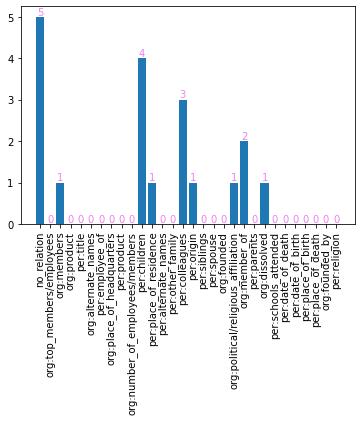

In [53]:
x = list(dict_label_to_num.keys())
y = [len(no_match[(no_match['pred_prob']>0.25)&(no_match['pred_prob']<=0.50)][no_match['pred_label']==d]) for d in x]
plt.bar(x,y)
plt.xticks(rotation=90)
for i, v in enumerate(x):
    plt.text(str(v), y[i], y[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 10, 
             color='violet',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)
plt.show()

In [54]:
no_match[(no_match['pred_prob']>0.5)&(no_match['pred_prob']<=0.6)].head(5)

,sentence,subj_word,subj_type,obj_word,obj_type,gold_label,pred_label,second_label,gold_prob,pred_prob,second_prob,prob_diff,prse_diff
1026,"1991년 개헌후 처음 벌어졌던 기초지방선거에서 참패한 후, 9월 10일 합당에 합...",신민주연합,ORG,민주당,ORG,no_relation,org:alternate_names,no_relation,0.3459,0.5342,0.3459,0.1883,0.1883
5782,"약칭은 한민당. 1945년 9월 16일에 조선민족당, 한국국민당 등이 만든 정당으로...",한민당,ORG,"조선민족당, 한국국민당",ORG,no_relation,org:alternate_names,no_relation,0.4267,0.5687,0.4267,0.1420,0.1420
806,양평군은 도농복합 도시로 다양한 토지이용현황이 분포되어 중앙정부 및 한국국토정보공사...,한국국토정보공사,ORG,국토교통부,ORG,no_relation,org:member_of,no_relation,0.4567,0.5406,0.4567,0.0838,0.0838
2282,페트릭 피어즈가 이끄는 아일랜드 의용군과 제임스 코놀리가 이끄는 아일랜드 시민군은 ...,아일랜드 시민군,ORG,아일랜드 의용군,ORG,no_relation,org:member_of,no_relation,0.4509,0.5172,0.4509,0.0664,0.0664
6185,11번가를 통해 SK텔레콤 상품을 구매하면 카드할인 및 무이자할부 외에도 애플 정품...,11번가,ORG,SK텔레콤,ORG,no_relation,org:member_of,no_relation,0.4034,0.5941,0.4034,0.1907,0.1907


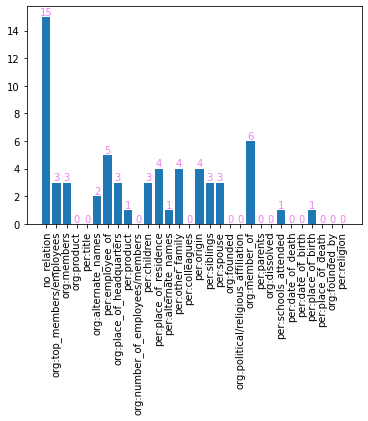

In [55]:
x = list(dict_label_to_num.keys())
y = [len(no_match[(no_match['pred_prob']>0.5)&(no_match['pred_prob']<=0.6)][no_match['pred_label']==d]) for d in x]
plt.bar(x,y)
plt.xticks(rotation=90)
for i, v in enumerate(x):
    plt.text(str(v), y[i], y[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 10, 
             color='violet',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)
plt.show()

In [56]:
no_match[(no_match['pred_prob']>0.6)&(no_match['pred_prob']<=0.7)].head(5)

,sentence,subj_word,subj_type,obj_word,obj_type,gold_label,pred_label,second_label,gold_prob,pred_prob,second_prob,prob_diff,prse_diff
5677,"오르내림 (OLNL)이 소속된 크루는 쥬스오버알콜 (juiceoveralchol),...",OLNL,ORG,WYBH,ORG,no_relation,org:alternate_names,no_relation,0.3685,0.6259,0.3685,0.2574,0.2574
708,이와 같이 2019년 3월 1일 자유조선은 조선민주주의인민공화국의 김정은 체제의 북...,자유조선,ORG,2019년 3월 1일,DAT,no_relation,org:founded,no_relation,0.3070,0.6832,0.3070,0.3763,0.3763
4639,현대 코나는 현대자동차의 소형 5도어 스포츠 유틸리티 자동차이다.,현대 코나,ORG,현대자동차,ORG,no_relation,org:member_of,org:product,0.0005,0.6069,0.3822,0.6063,0.2247
2400,필라레트(1929년 1월 23일 ~)는 우크라이나에서 가장 큰 기독교 교단인 키예프...,우크라이나,ORG,키예프,LOC,no_relation,org:members,no_relation,0.2823,0.6383,0.2823,0.3561,0.3561
4527,덧붙여 크루즈는 2004년부터 2009년까지 텍사스 대학교 오스틴 로스쿨의 조교수로...,텍사스,ORG,오스틴,ORG,no_relation,org:members,no_relation,0.3571,0.6381,0.3571,0.2811,0.2811


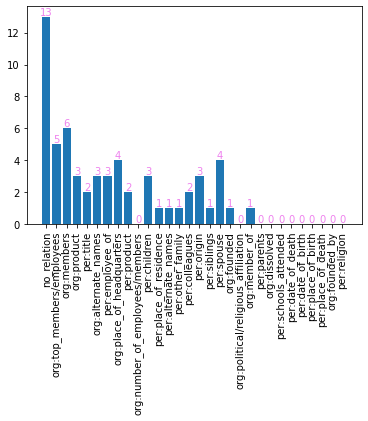

In [57]:
x = list(dict_label_to_num.keys())
y = [len(no_match[(no_match['pred_prob']>0.6)&(no_match['pred_prob']<=0.70)][no_match['pred_label']==d]) for d in x]
plt.bar(x,y)
plt.xticks(rotation=90)
for i, v in enumerate(x):
    plt.text(str(v), y[i], y[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 10, 
             color='violet',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)
plt.show()

In [58]:
no_match[(no_match['pred_prob']>0.7)&(no_match['pred_prob']<=0.8)].head(5)

,sentence,subj_word,subj_type,obj_word,obj_type,gold_label,pred_label,second_label,gold_prob,pred_prob,second_prob,prob_diff,prse_diff
2224,"현재 소속된 아티스트는 토이(유희열), 정재형, 루시드 폴, 페퍼톤스(신재평, 이장...",페퍼톤스,PER,신재평,PER,no_relation,org:alternate_names,per:alternate_names,0.0002,0.7828,0.1243,0.7826,0.6584
1664,법률요건을 충족시키고 원로원에 특권을 불하받은 핀레이슨은 1820년 탐페레에 소면기...,핀레이슨,PER,1820년,DAT,no_relation,org:founded,no_relation,0.2124,0.7808,0.2124,0.5684,0.5684
1075,페트릭 피어즈가 이끄는 아일랜드 의용군과 제임스 코놀리가 이끄는 아일랜드 시민군은 ...,아일랜드 의용군,ORG,아일랜드 시민군,ORG,no_relation,org:member_of,no_relation,0.2596,0.7329,0.2596,0.4733,0.4733
1623,"서울대 본부 측은 2011년 3월 총장, 교수, 외부위원 등으로 구성된 '국립대학법...",서울대학교,ORG,국립대학법인,ORG,no_relation,org:member_of,no_relation,0.2247,0.7223,0.2247,0.4975,0.4975
1832,마라도나교에는 오순절까지 존재하는데 마라도나가 잉글랜드를 상대로 벌인 '신의 손 사...,아르헨티나 대 잉글랜드,ORG,1986년 FIFA 월드컵,POH,no_relation,org:member_of,no_relation,0.2211,0.7749,0.2211,0.5538,0.5538


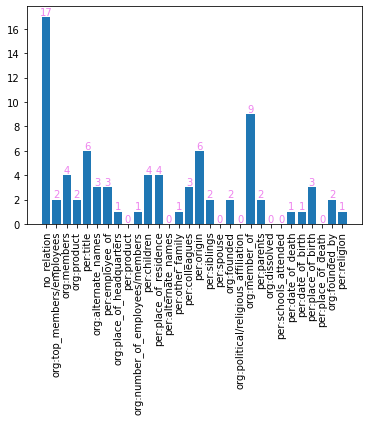

In [59]:
x = list(dict_label_to_num.keys())
y = [len(no_match[(no_match['pred_prob']>0.7)&(no_match['pred_prob']<=0.80)][no_match['pred_label']==d]) for d in x]
plt.bar(x,y)
plt.xticks(rotation=90)
for i, v in enumerate(x):
    plt.text(str(v), y[i], y[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 10, 
             color='violet',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)
plt.show()

In [60]:
no_match[(no_match['pred_prob']>0.8)&(no_match['pred_prob']<=0.9)].head(5)

,sentence,subj_word,subj_type,obj_word,obj_type,gold_label,pred_label,second_label,gold_prob,pred_prob,second_prob,prob_diff,prse_diff
3470,"3월 14일에는 신당명을 ""민진당""으로 결정하였고, 3월 22일에는 ""개혁결집회"" ...",개혁결집회,ORG,민진당,ORG,no_relation,org:alternate_names,org:members,0.0292,0.8202,0.1448,0.7909,0.6754
4911,호그와트 마법학교는 소설《해리 포터》시리즈에 등장하는 마법 학교이다.,호그와트,ORG,마법학교,ORG,no_relation,org:alternate_names,org:members,0.0348,0.8166,0.1298,0.7818,0.6868
2095,1988년 3월 6일에 완공하여 완공 당시 그린 스타디움 고베라는 애칭을 사용하여 ...,그린 스타디움 고베,ORG,1988년 3월 6일,DAT,no_relation,org:founded,no_relation,0.1595,0.8316,0.1595,0.6720,0.6720
2755,1947년 11월 1일 정부로부터 학교인가를 받아 같은해 11월 3일 단국대학교를 ...,단국대학교사범대학부속중학교,ORG,1947년,DAT,no_relation,org:founded,no_relation,0.0939,0.8896,0.0939,0.7957,0.7957
3676,"1995년 정계에 복귀한 김대중의 신당 새정치국민회의의 발기인으로 참여했고, 이듬해...",새정치국민회의,ORG,1996년,DAT,no_relation,org:founded,no_relation,0.1700,0.8057,0.1700,0.6357,0.6357


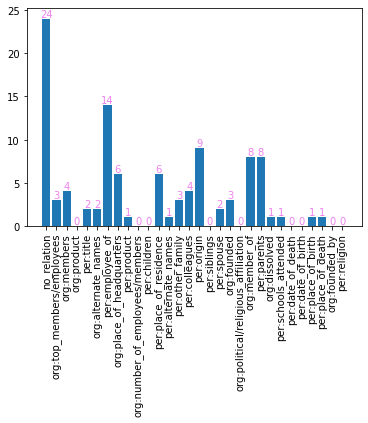

In [61]:
x = list(dict_label_to_num.keys())
y = [len(no_match[(no_match['pred_prob']>0.8)&(no_match['pred_prob']<=0.9)][no_match['pred_label']==d]) for d in x]
plt.bar(x,y)
plt.xticks(rotation=90)
for i, v in enumerate(x):
    plt.text(str(v), y[i], y[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 10, 
             color='violet',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)
plt.show()

In [62]:
no_match[(no_match['pred_prob']>0.9)&(no_match['pred_prob']<=1.0)].head(5)

,sentence,subj_word,subj_type,obj_word,obj_type,gold_label,pred_label,second_label,gold_prob,pred_prob,second_prob,prob_diff,prse_diff
84,"2017년 2월 14일, 같은 해 여름에 치러질 도쿄도의회 선거를 앞두고 민진당 도...",유신당,ORG,민진당,ORG,no_relation,org:alternate_names,no_relation,0.0154,0.9829,0.0154,0.9675,0.9675
5514,PSG-OM 혹은 OM-PSG는 흔히 르 클라시크(Le Classique)라고 불리...,파리 생제르맹 FC,ORG,PSG-OM,POH,no_relation,org:alternate_names,no_relation,0.0150,0.9835,0.0150,0.9684,0.9684
3425,드라마는 11월까지 촬영한 뒤 12월 셋째 주 금요일 저녁 8시 50분에 KBC 광...,CJB,ORG,민영방송,ORG,no_relation,org:alternate_names,org:member_of,0.0003,0.9701,0.0263,0.9698,0.9438
5696,이 경기의 승리 팀인 레알 마드리드는 2016년 UEFA 슈퍼컵에서 2015-16년...,유럽 축구 연맹,ORG,UEFA,POH,no_relation,org:alternate_names,org:member_of,0.0000,0.9992,0.0003,0.9992,0.9988
621,이시종 도지사는 “충북은 세계 에너지산업 시장 변화에 주목하며 일찌감치 ‘생명과 태...,충북도,ORG,생명과 태양의 땅,LOC,no_relation,org:alternate_names,org:members,0.0017,0.9465,0.0390,0.9448,0.9075


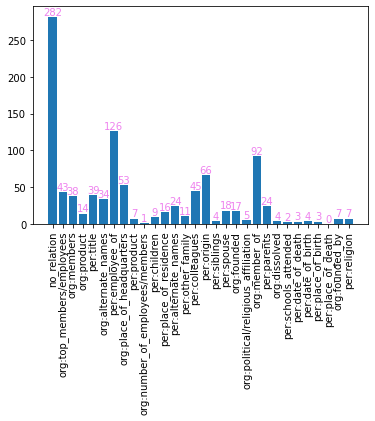

In [63]:
x = list(dict_label_to_num.keys())
y = [len(no_match[(no_match['pred_prob']>0.9)&(no_match['pred_prob']<=1.0)][no_match['pred_label']==d]) for d in x]
plt.bar(x,y)
plt.xticks(rotation=90)
for i, v in enumerate(x):
    plt.text(str(v), y[i], y[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 10, 
             color='violet',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)
plt.show()

In [64]:
dict_label_to_num.keys()

dict_keys(['no_relation', 'org:top_members/employees', 'org:members', 'org:product', 'per:title', 'org:alternate_names', 'per:employee_of', 'org:place_of_headquarters', 'per:product', 'org:number_of_employees/members', 'per:children', 'per:place_of_residence', 'per:alternate_names', 'per:other_family', 'per:colleagues', 'per:origin', 'per:siblings', 'per:spouse', 'org:founded', 'org:political/religious_affiliation', 'org:member_of', 'per:parents', 'org:dissolved', 'per:schools_attended', 'per:date_of_death', 'per:date_of_birth', 'per:place_of_birth', 'per:place_of_death', 'org:founded_by', 'per:religion'])

In [71]:
all_count=[]
for i in range(0,10):
    all_count.append(len(tp[(tp['pred_prob']>i*0.1)&(tp['pred_prob']<=(i+1)*0.1)]))

In [72]:
match_count=[]
match=tp[tp['gold_label']==tp['pred_label']][['sentence','subj_word','subj_type','obj_word','obj_type','gold_label','pred_label','second_label','gold_prob','pred_prob','second_prob','prob_diff','prse_diff']]
for i in range(0,10):
    match_count.append(len(match[(match['pred_prob']>i*0.1)&(match['pred_prob']<=(i+1)*0.1)]))

In [73]:
nomatch_count=[]
for i in range(0,10):
    nomatch_count.append(len(no_match[(no_match['pred_prob']>i*0.1)&(no_match['pred_prob']<=(i+1)*0.1)]))
    print(len(no_match[(no_match['pred_prob']>i*0.1)&(no_match['pred_prob']<=(i+1)*0.1)]))

0
0
0
5
14
62
59
80
104
998


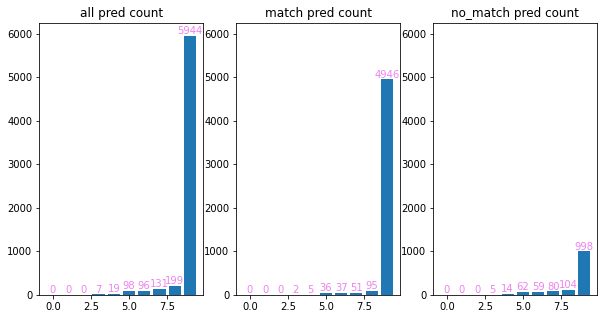

In [74]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132, sharey=ax1)
ax3 = fig.add_subplot(133, sharey=ax1)

ax1.bar(range(0,10),all_count)
ax2.bar(range(0,10),match_count)
ax3.bar(range(0,10),nomatch_count)
for i, v in enumerate(range(0,10)):
    ax1.text(v, all_count[i], all_count[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 10, 
             color='violet',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)
    ax2.text(v, match_count[i], match_count[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 10, 
             color='violet',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)
    ax3.text(v, nomatch_count[i], nomatch_count[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 10, 
             color='violet',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)
ax1.set_title('all pred count')
ax2.set_title('match pred count')
ax3.set_title('no_match pred count')
plt.show()

In [75]:
all_per =list(map(lambda x: round(x/sum(all_count),2),all_count))
match_per = list(map(lambda x: round(x/sum(match_count),2),match_count))
nomatch_per = list(map(lambda x: round(x/sum(nomatch_count),2),nomatch_count))

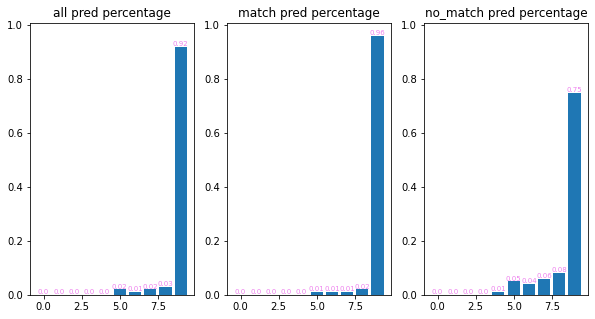

In [76]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132, sharey=ax1)
ax3 = fig.add_subplot(133, sharey=ax1)
ax1.bar(range(0,10),all_per)
ax2.bar(range(0,10),match_per)
ax3.bar(range(0,10),nomatch_per)
for i, v in enumerate(range(0,10)):
    ax1.text(v, all_per[i], all_per[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 7, 
             color='violet',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)
    ax2.text(v, match_per[i], match_per[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 7, 
             color='violet',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)
    ax3.text(v, nomatch_per[i], nomatch_per[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 7, 
             color='violet',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)
ax1.set_title('all pred percentage')
ax2.set_title('match pred percentage')
ax3.set_title('no_match pred percentage')
plt.show()

In [ ]:
tp[(tp['pred_prob']>i*0.01)&\(tp['pred_prob']<=(i+1)*0.01)&(tp['second_label']==l)&(tp['gold_label']==tp['second_label'])]

In [166]:
def multi_plot(tp):
    for j,l in enumerate(list(dict_label_to_num.keys())):
        nomatch_count=[]
        match_count=[]
        second_count=[]
        second_prob=[]
        second_nomatch=[]
        for i in range(0,100):
            nomatch_count.append(len(no_match[(no_match['pred_prob']>i*0.01)&\
                                            (no_match['pred_prob']<=(i+1)*0.01)&(no_match['pred_label']==l)]))
            match_count.append(len(match[(match['pred_prob']>i*0.01)&\
                                            (match['pred_prob']<=(i+1)*0.01)&(match['pred_label']==l)]))
            second_count.append(len(no_match[(no_match['pred_prob']>i*0.01)&\
                                            (no_match['pred_prob']<=(i+1)*0.01)&(no_match['second_label']==l)&(no_match['gold_label']==no_match['second_label'])]))
            second_prob.append(len(no_match[(no_match['second_prob']>i*0.01)&\
                                            (no_match['second_prob']<=(i+1)*0.01)&(no_match['second_label']==l)&(no_match['gold_label']==no_match['second_label'])]))
            second_nomatch.append(len(no_match[(no_match['second_prob']>i*0.01)&\
                                            (no_match['second_prob']<=(i+1)*0.01)&(no_match['second_label']!=l)&(no_match['gold_label']==no_match['second_label'])]))
        if sum(nomatch_count)>0:
            nomatch_per =list(map(lambda x: round(x/sum(nomatch_count),2),nomatch_count))
        if sum(match_count)>0:
            match_per =list(map(lambda x: round(x/sum(match_count),2),match_count))
        if sum(second_count)>0:
            second_per =list(map(lambda x: round(x/sum(second_count),2),second_count))
        if sum(second_prob)>0:
            second_prob_per =list(map(lambda x: round(x/sum(second_prob),2),second_prob))
        if sum(second_nomatch)>0:
            second_nomatch_per =list(map(lambda x: round(x/sum(second_nomatch),2),second_nomatch))
        x = range(0,100)
        fig = plt.figure(figsize=(40,240))
        gs = gridspec.GridSpec(30,5)
        for k in range(5):
            ax = fig.add_subplot(gs[j,k])
            if k==0:
                if tp=='count':
                    y = match_count
                elif tp=='perc':
                    y = match_per
                title = 'match'
            elif k==1:
                if tp=='count':
                    y = nomatch_count
                elif tp=='perc':
                    y = nomatch_per
                title = 'nomatch'
            elif k==2:
                if tp=='count':
                    y = second_count
                elif tp=='perc':
                    y = second_per
                title = 'pred-prob_match-second'
            elif k==3:
                if tp =='count':
                    y = second_prob
                elif tp=='perc':
                    y = second_prob_per
                title = 'second-prob_match-second'
            elif k==4:
                if tp =='count':
                    y = second_nomatch
                elif tp=='perc':
                    y = second_nomatch_per
                title = 'second-prob_nomatch-second'
            ax.bar(x,y)
            ax.set_title('{}_{}_{}'.format(l,title,tp))
            ax.set_xticks(range(0,100,5))
            for i, v in enumerate(x):
                if y[i] != 0:
                    ax.text(v, y[i], y[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
                            fontsize = 8, 
                            color='violet',
                            horizontalalignment='center',  # horizontalalignment (left, center, right)
                            verticalalignment='bottom')    # verticalalignment (top, center, bottom)
        fig.align_labels()
    plt.show()
    # fig.savefig('../src/{}.png'.format(tp))

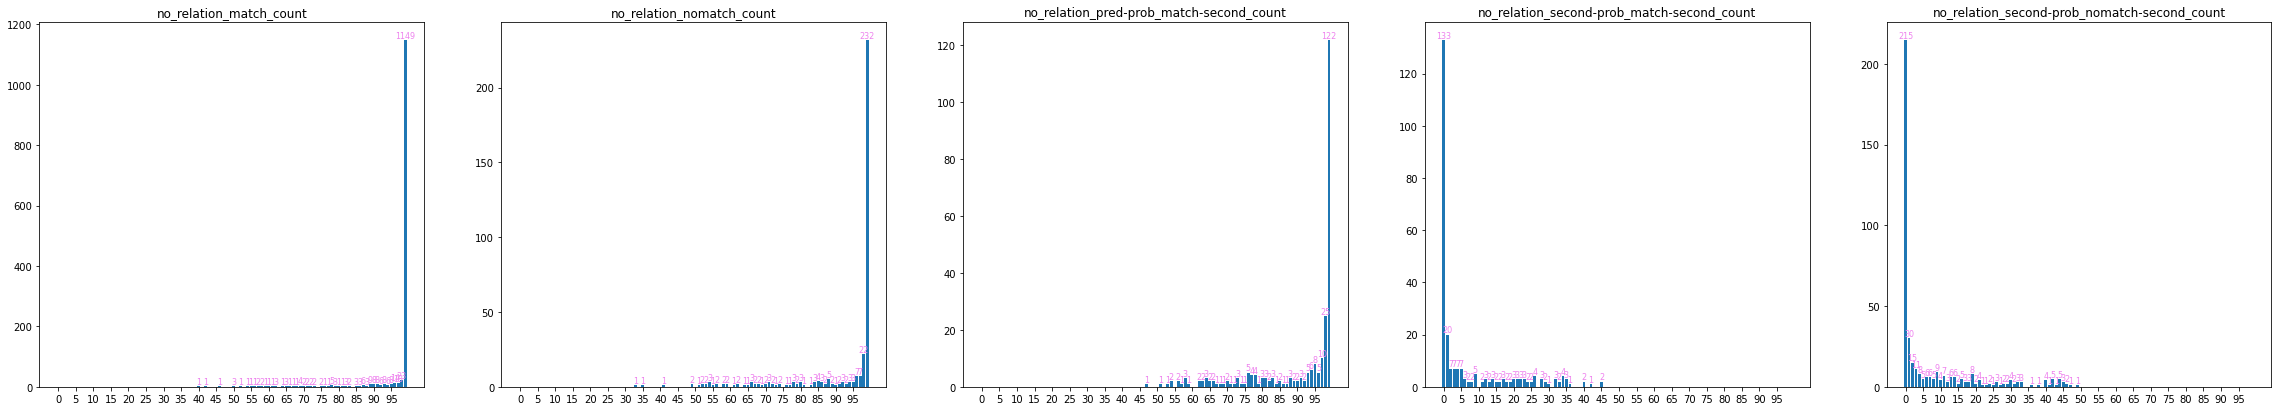

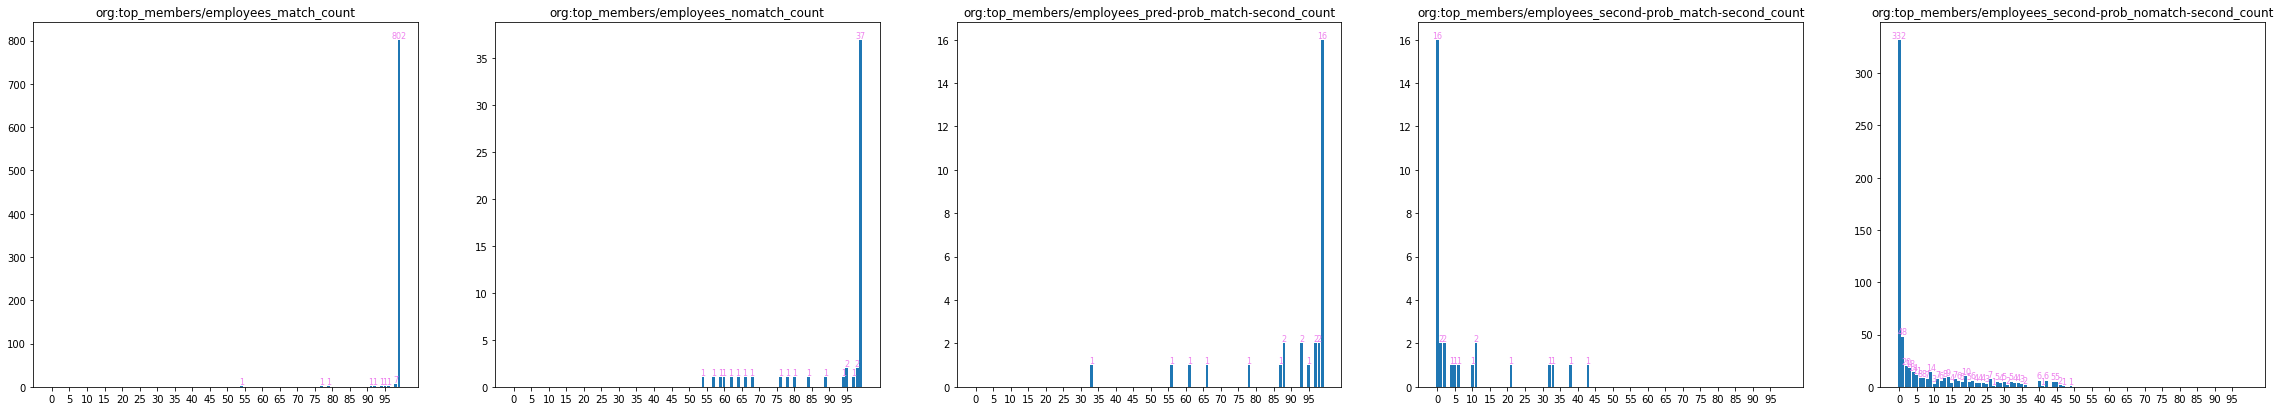

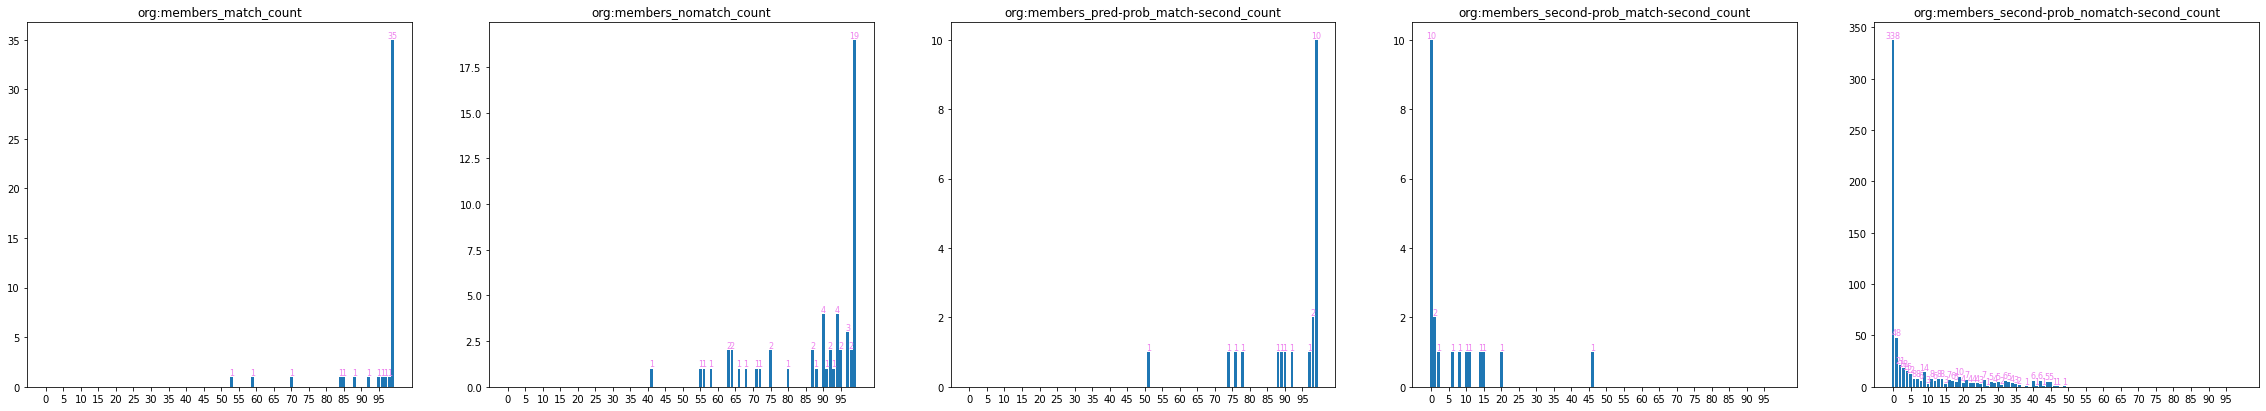

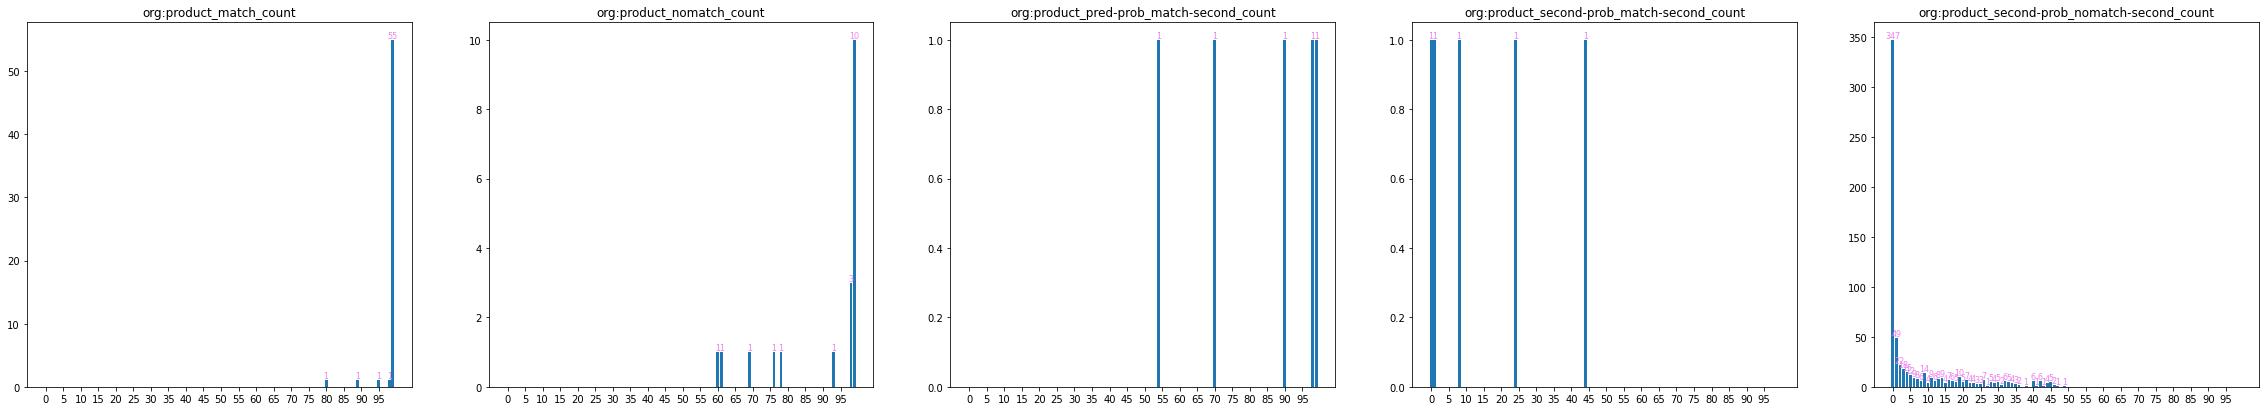

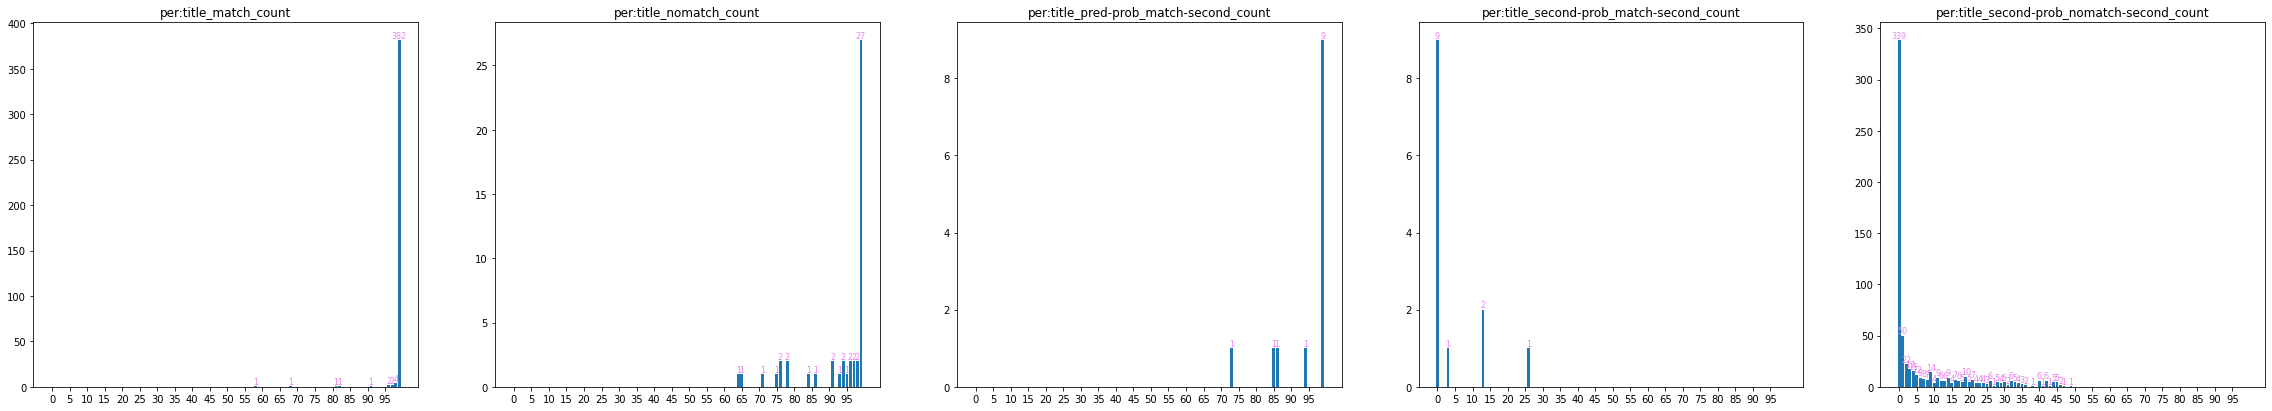

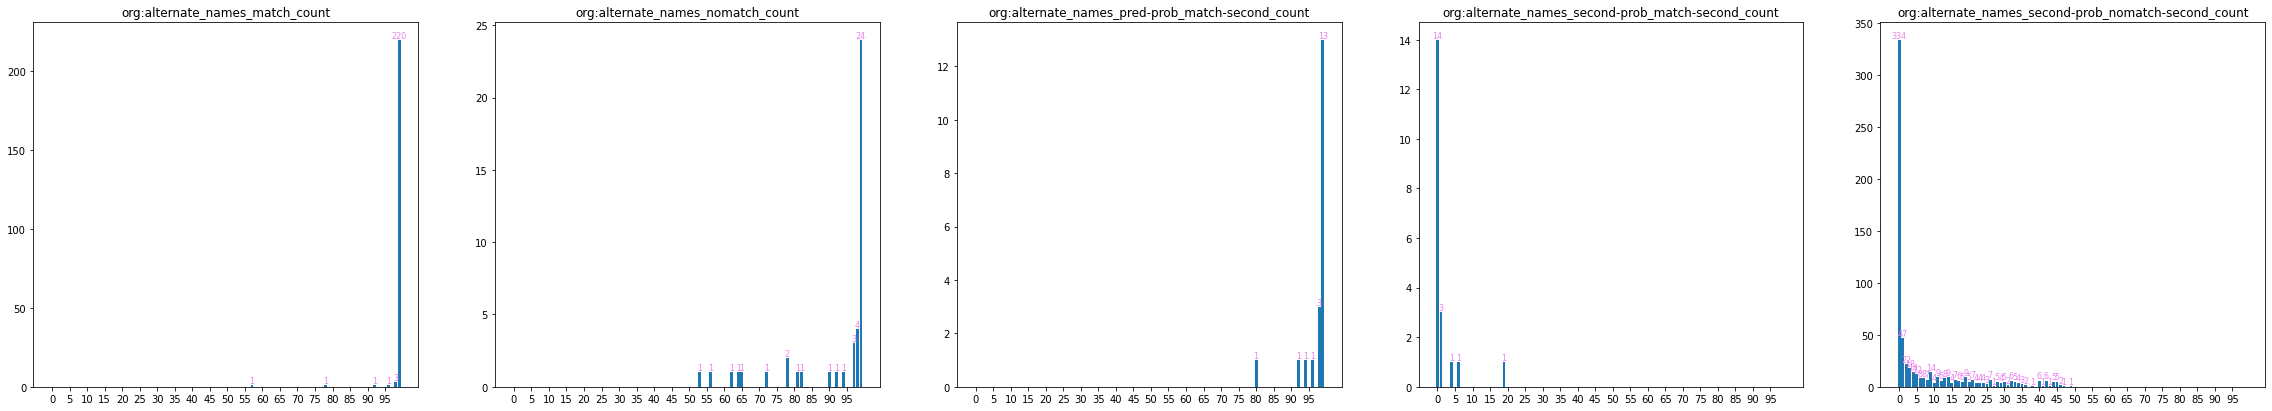

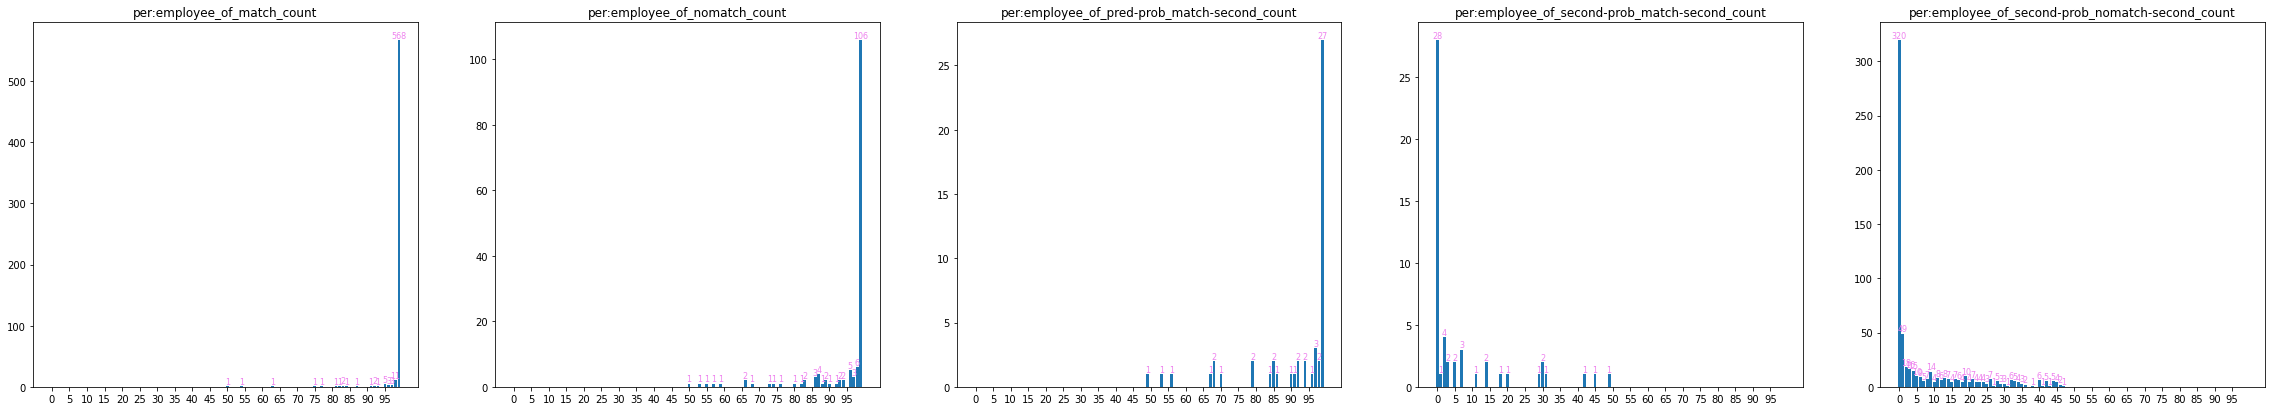

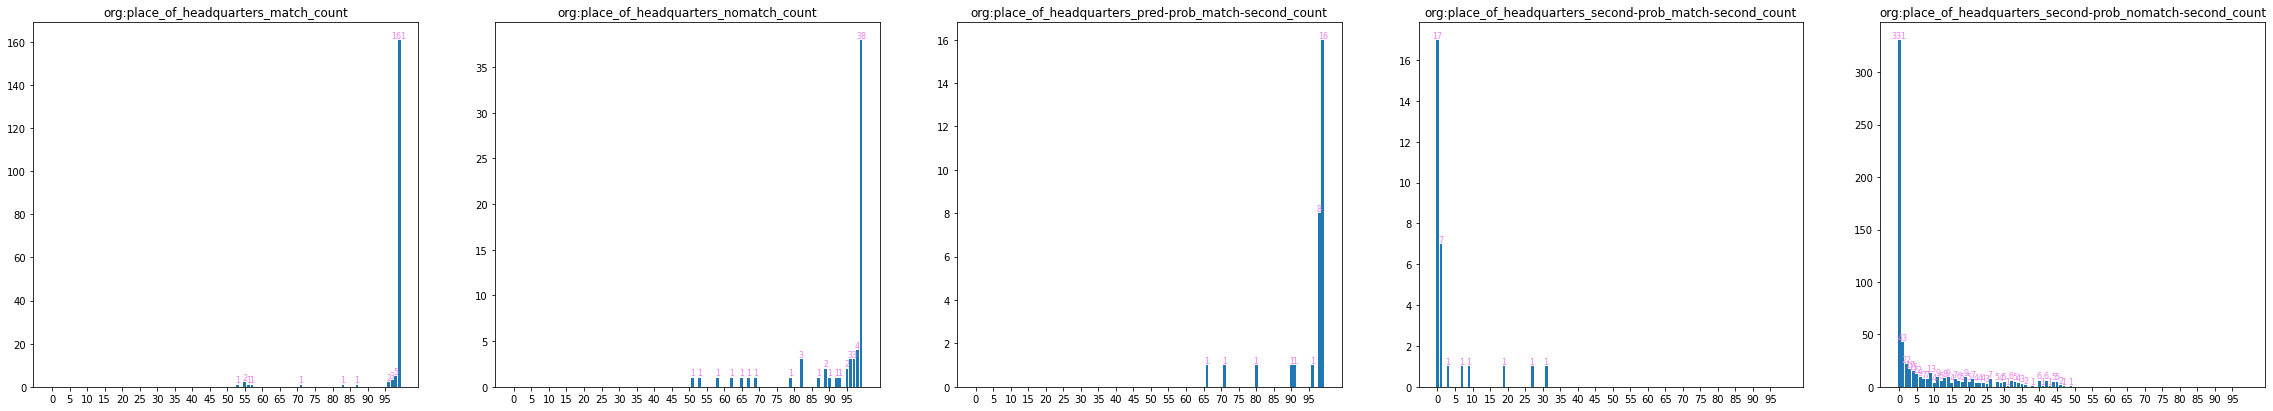

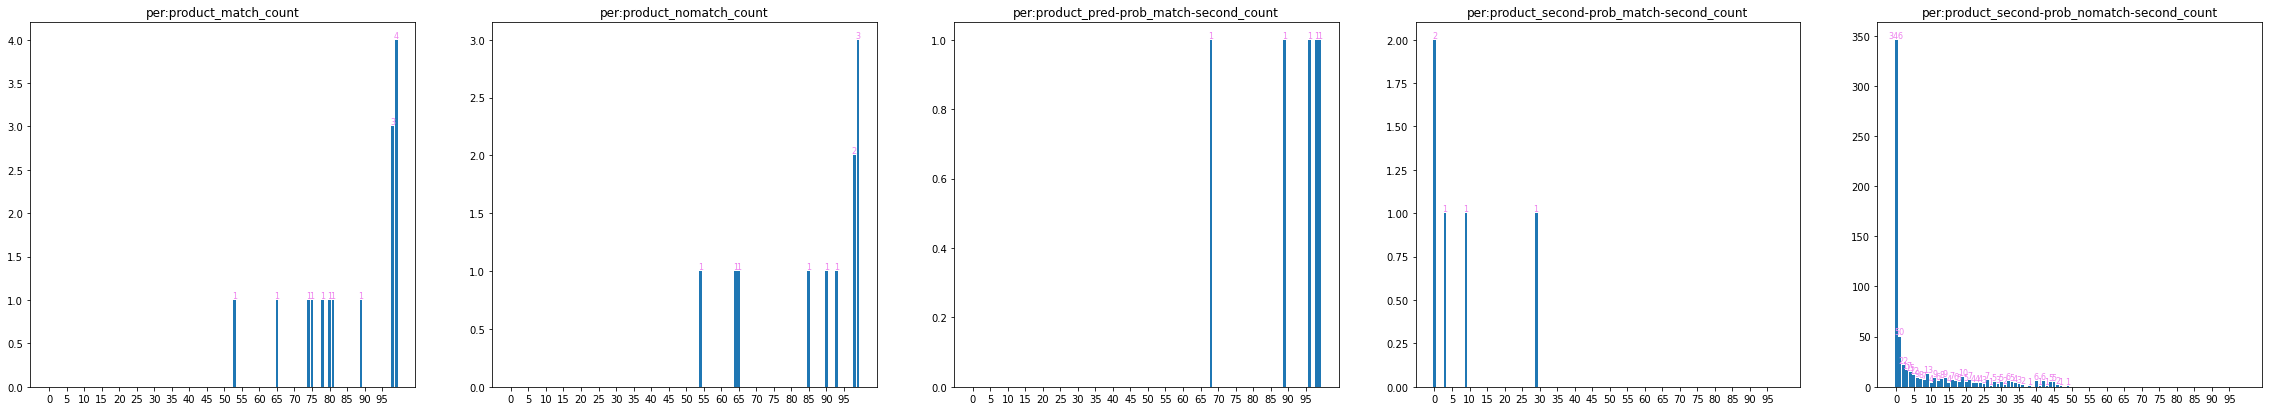

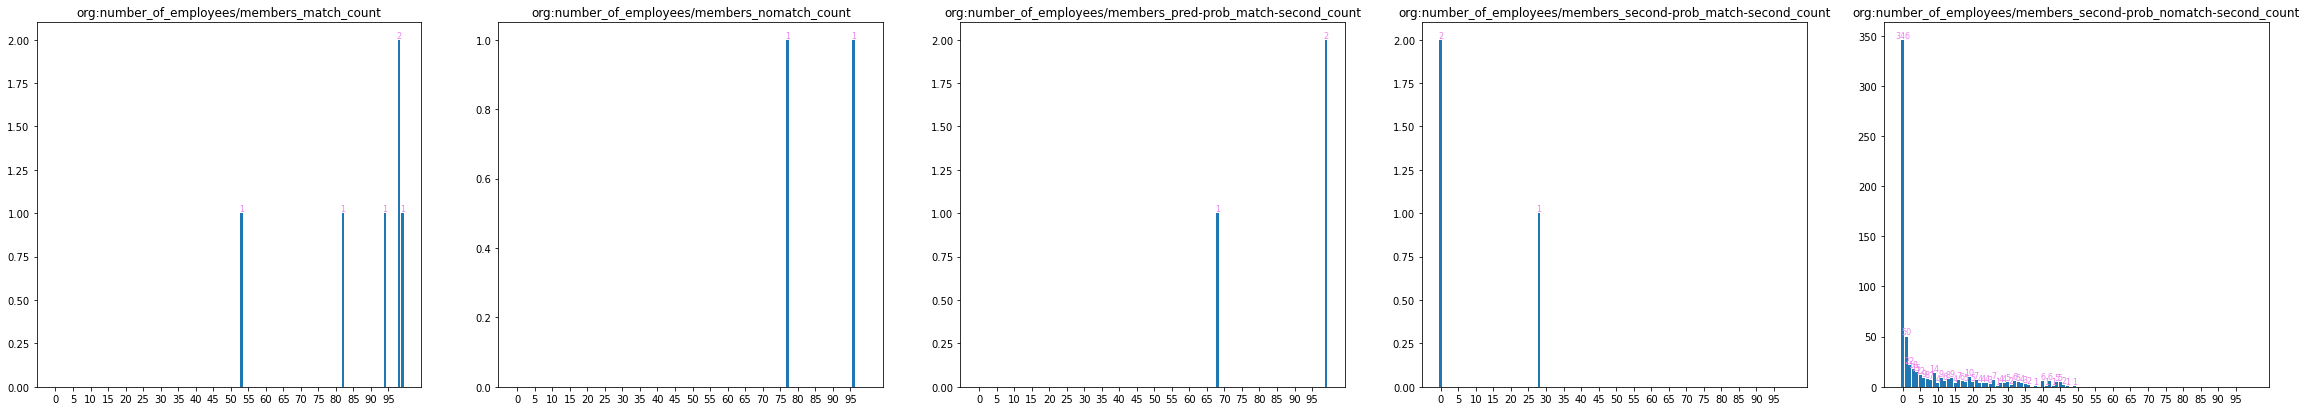

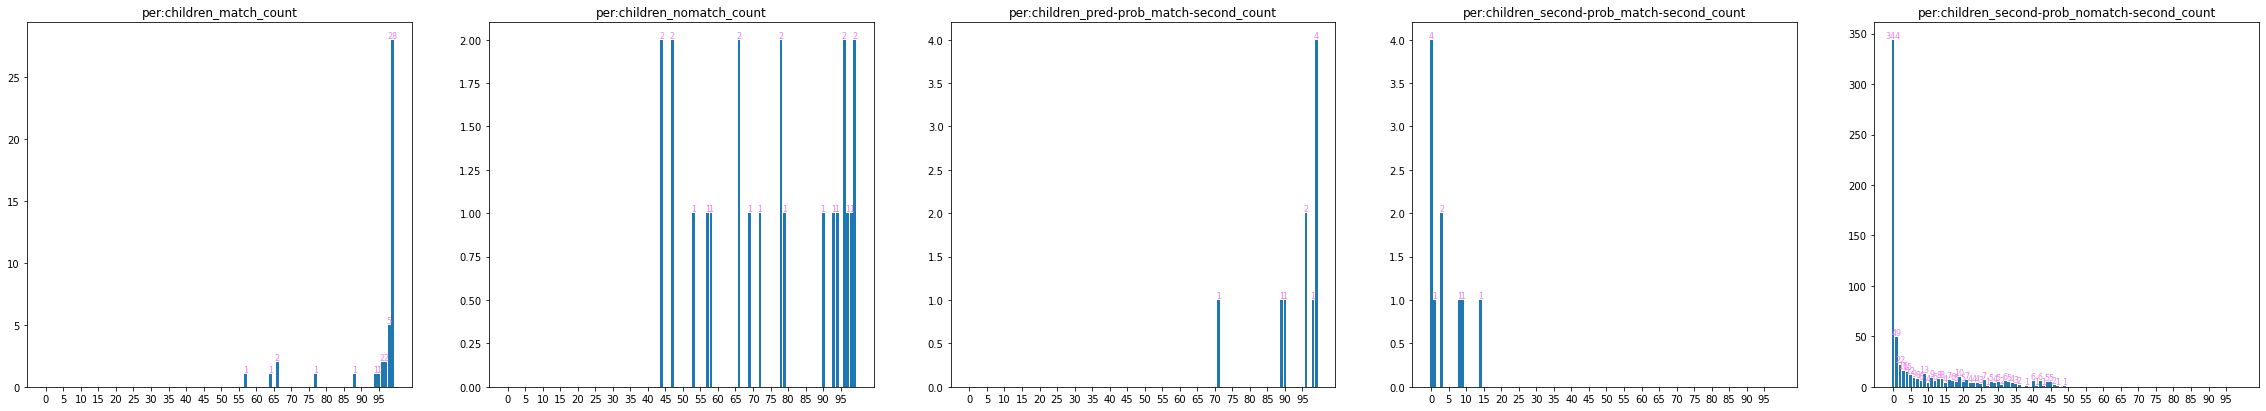

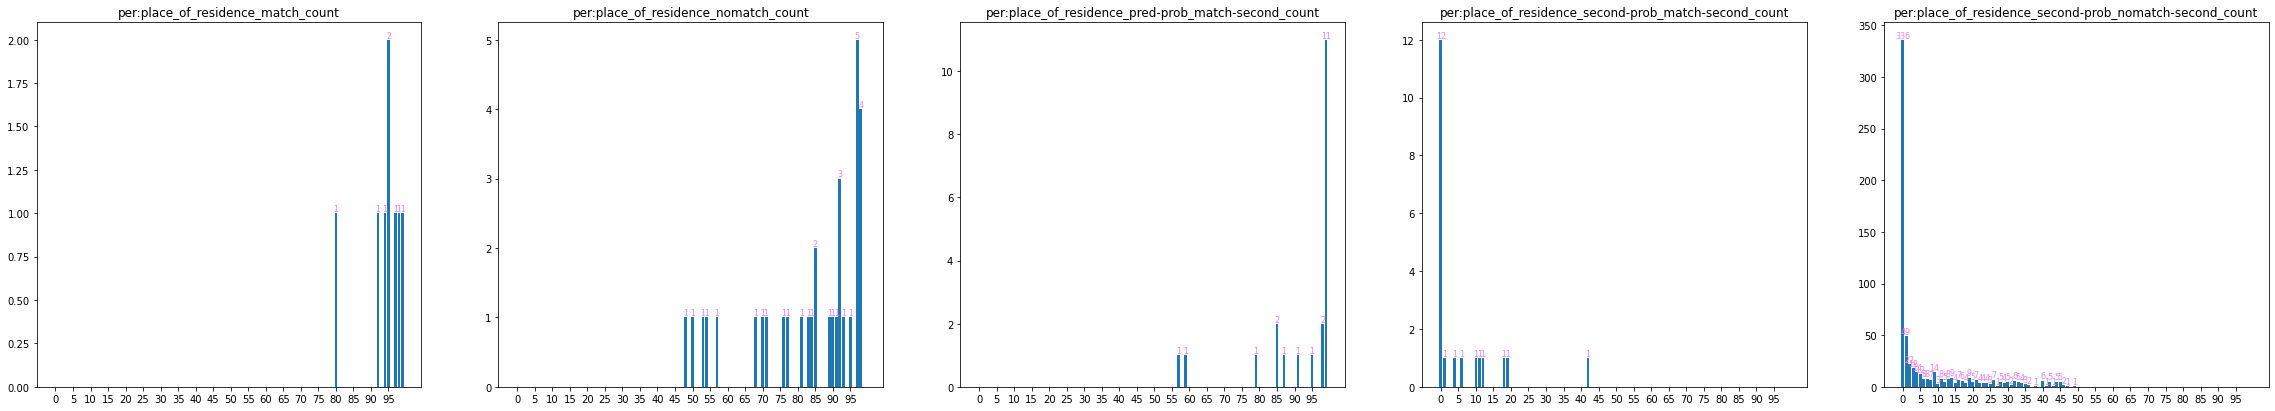

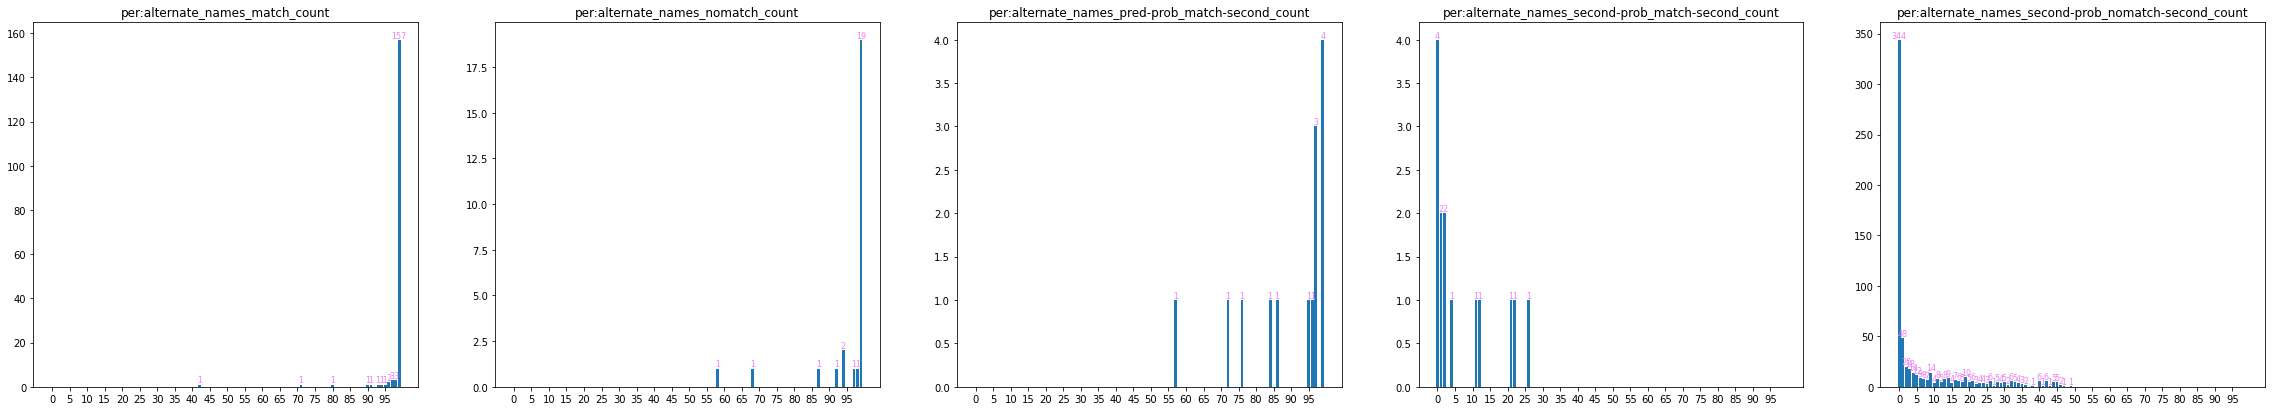

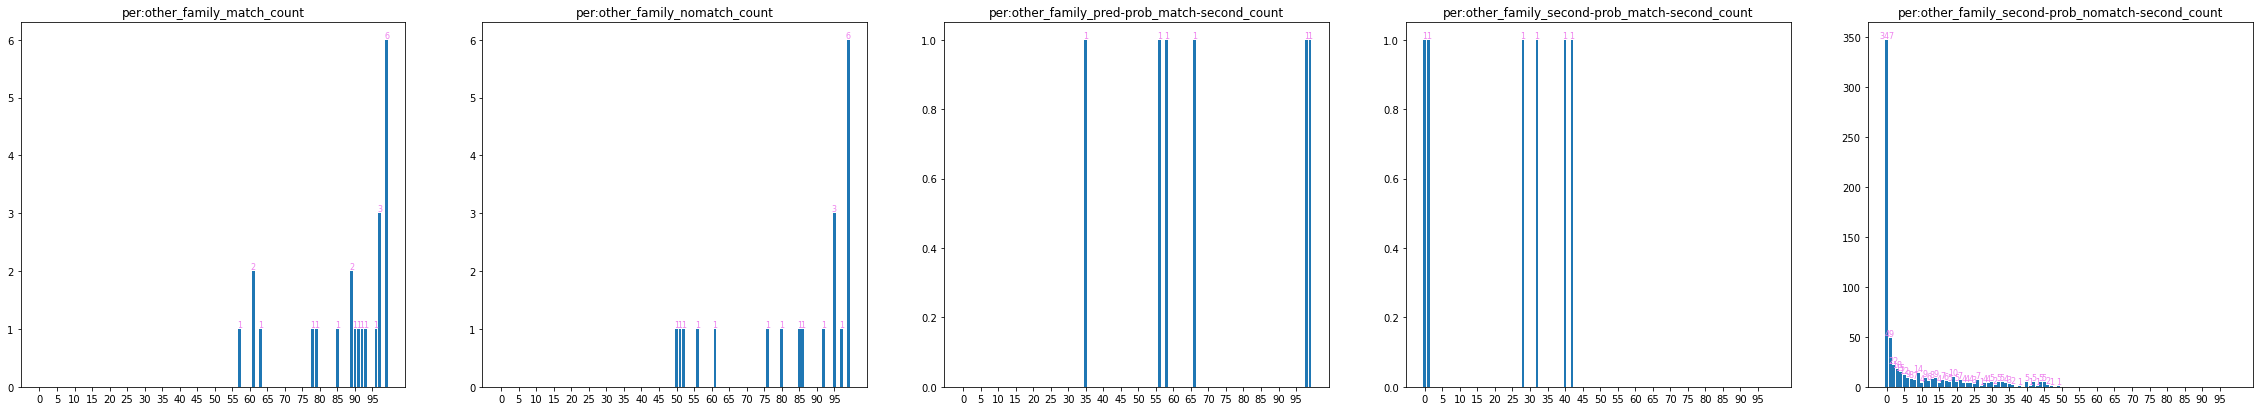

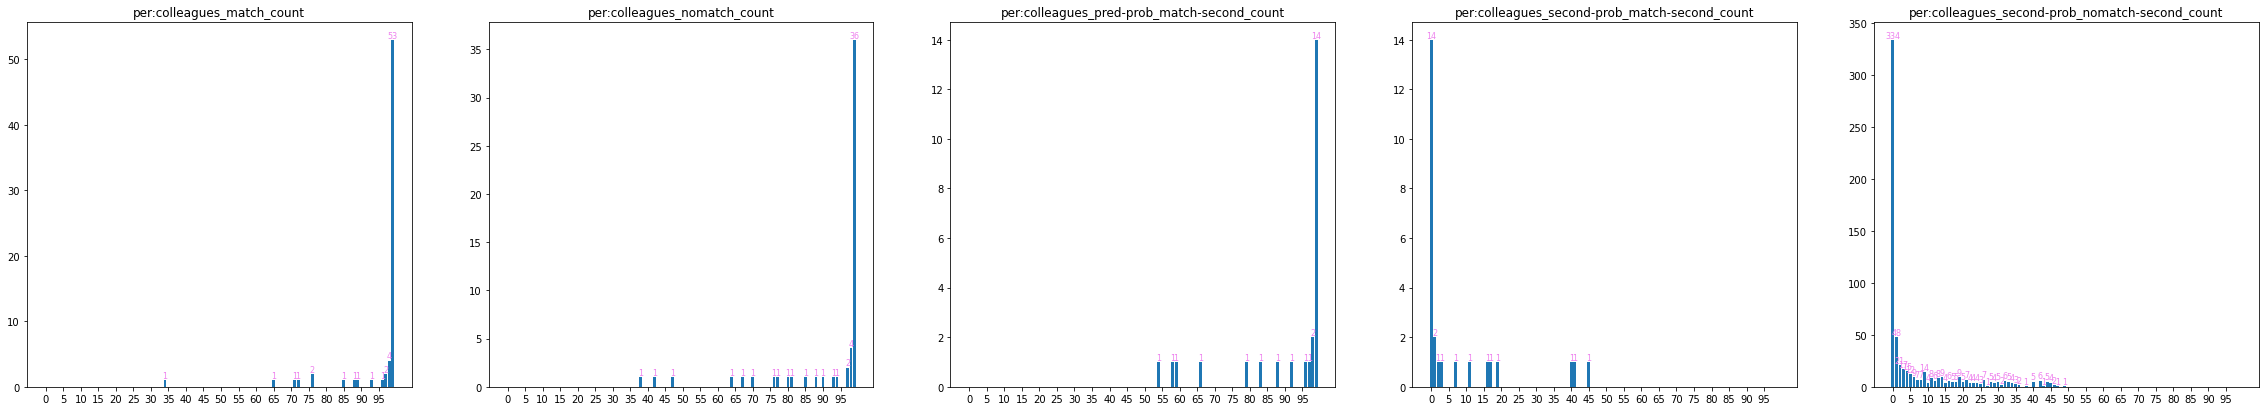

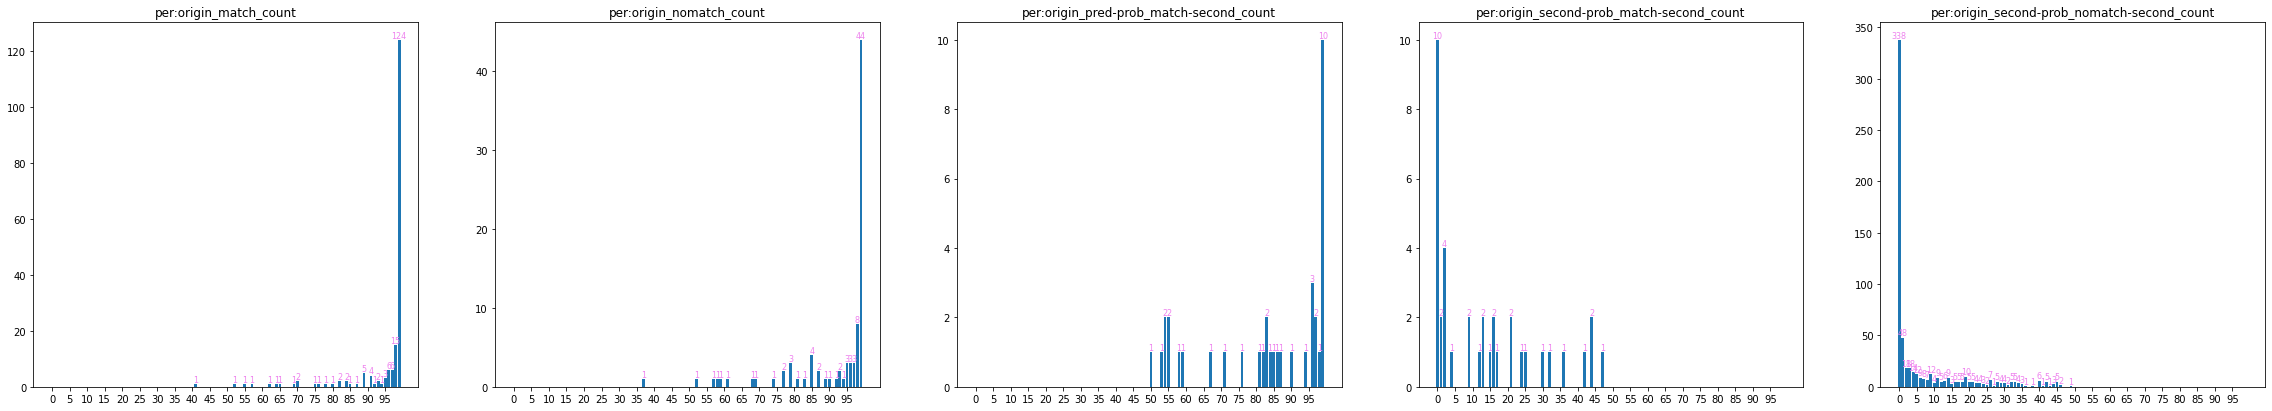

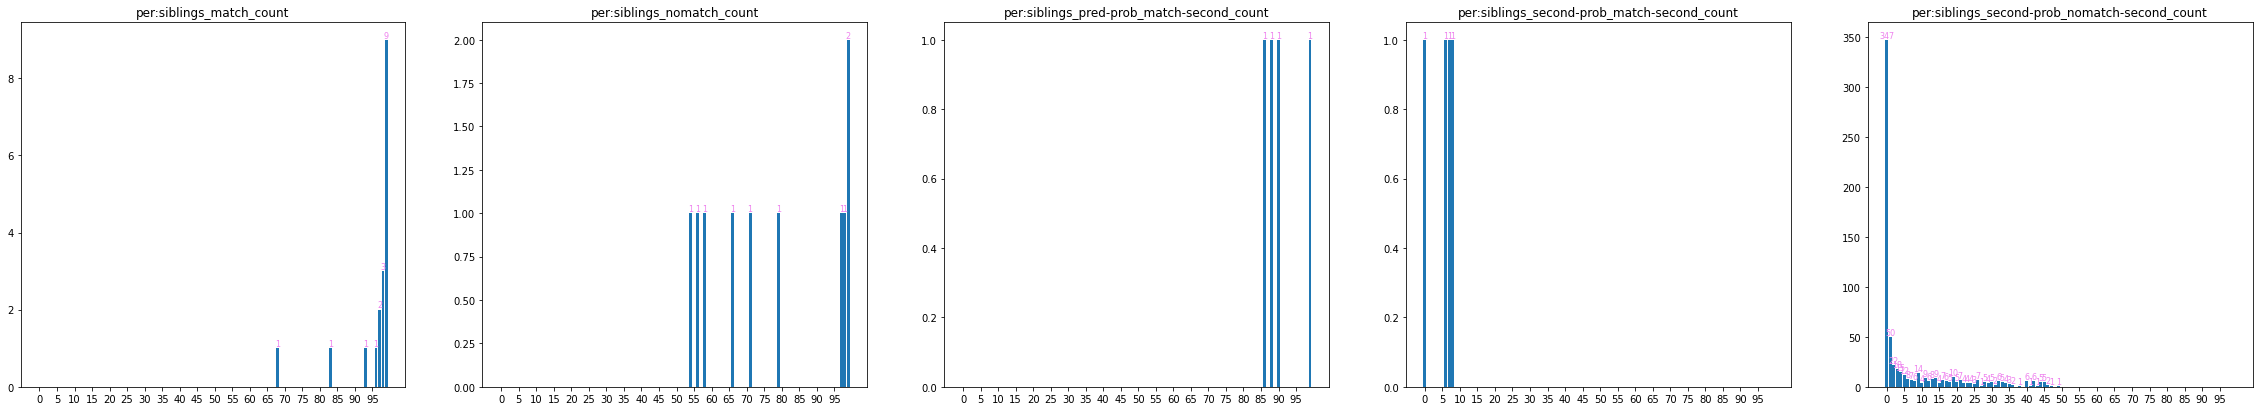

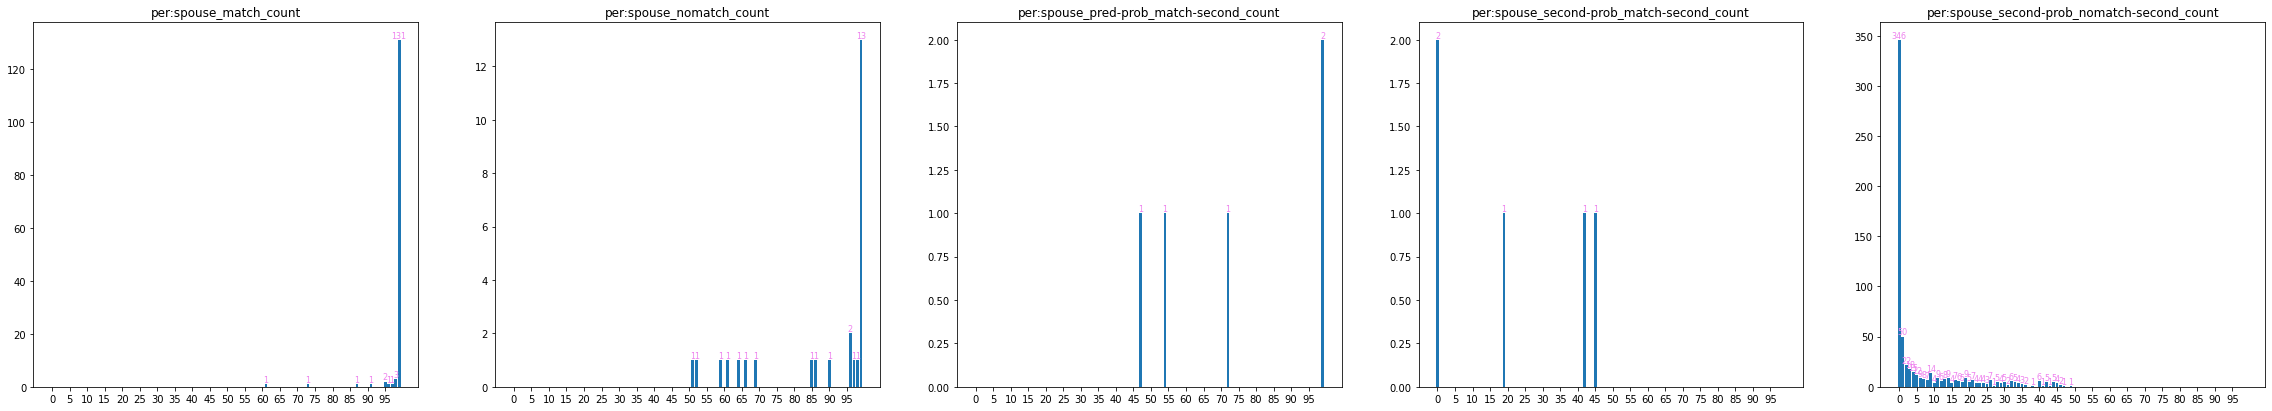

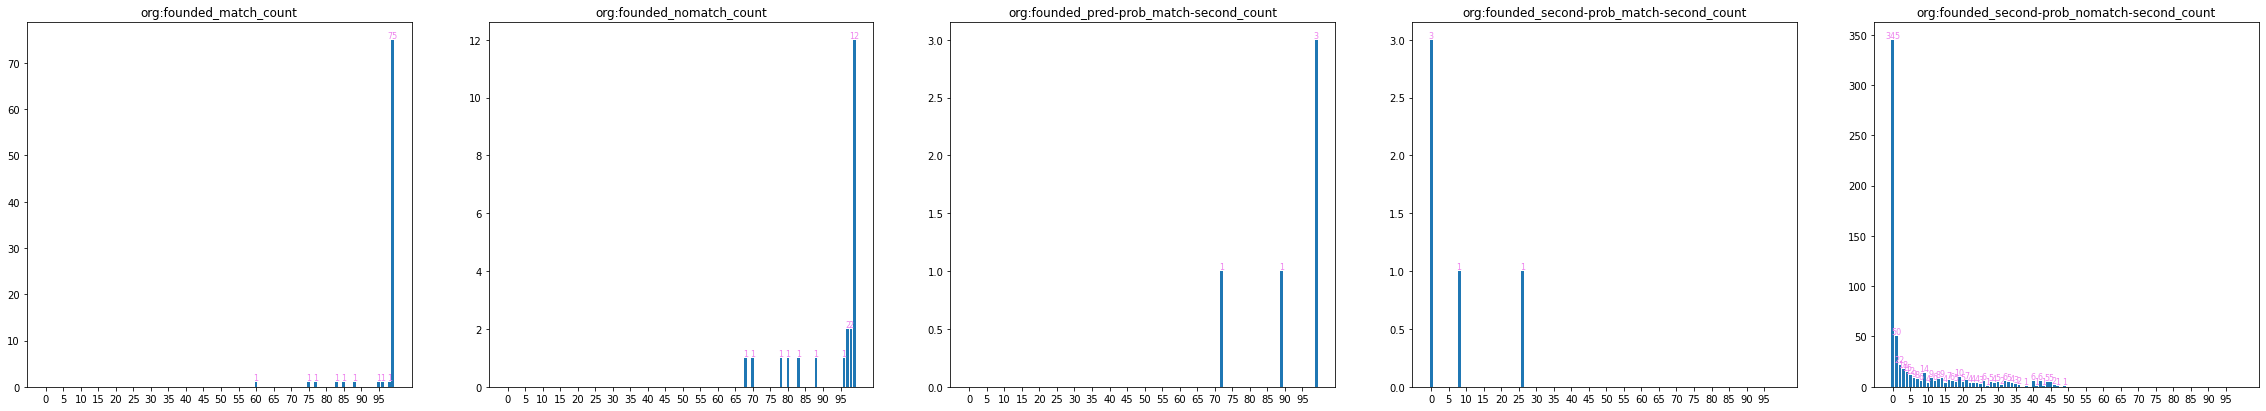

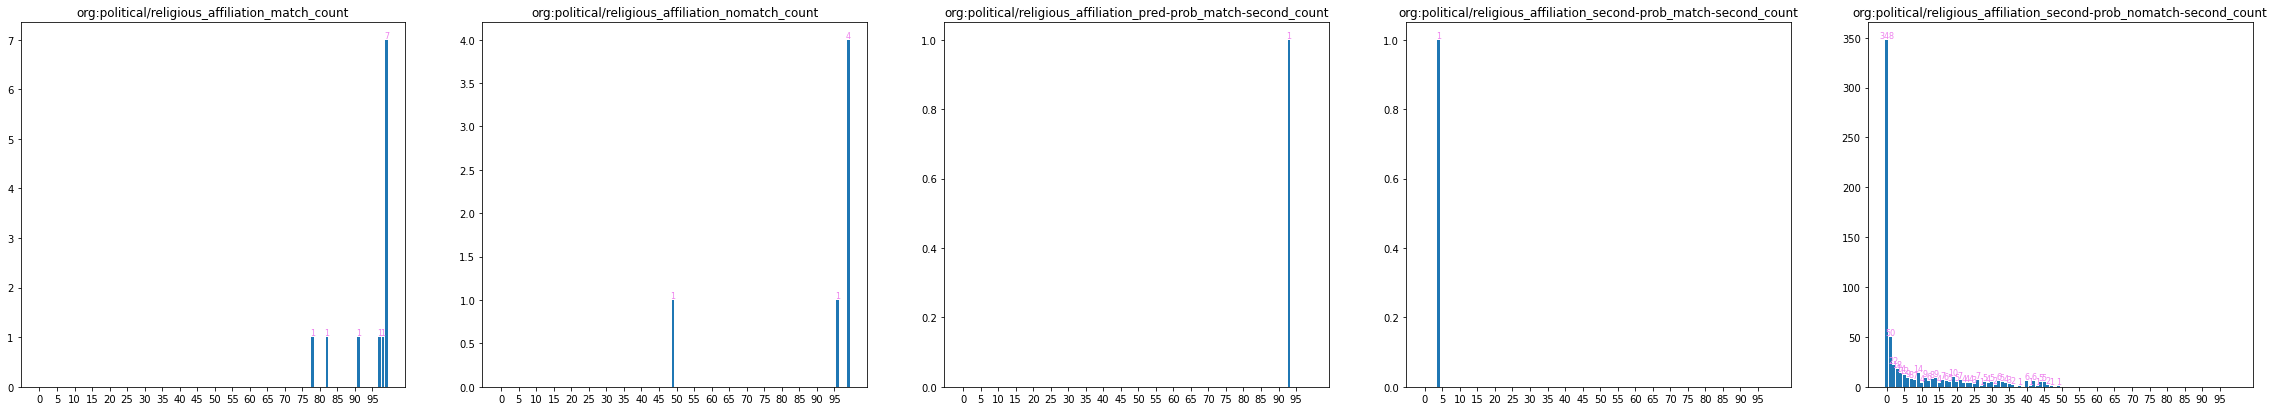

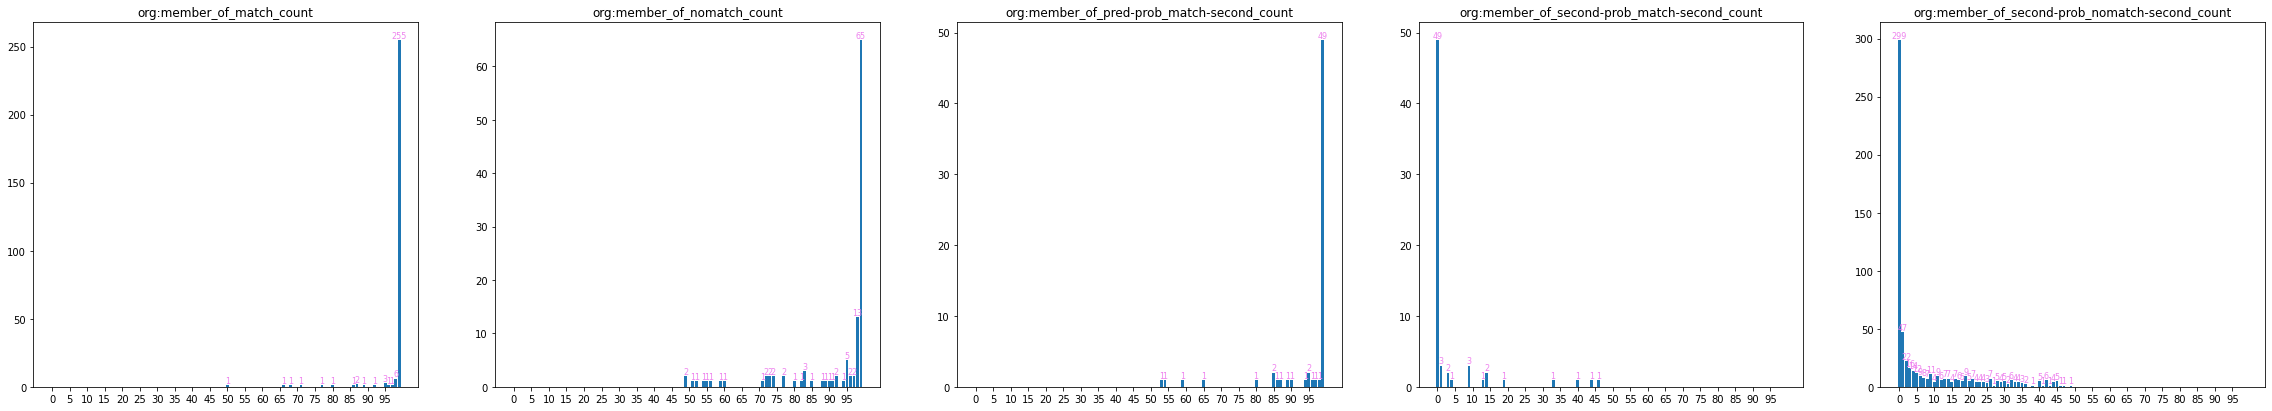

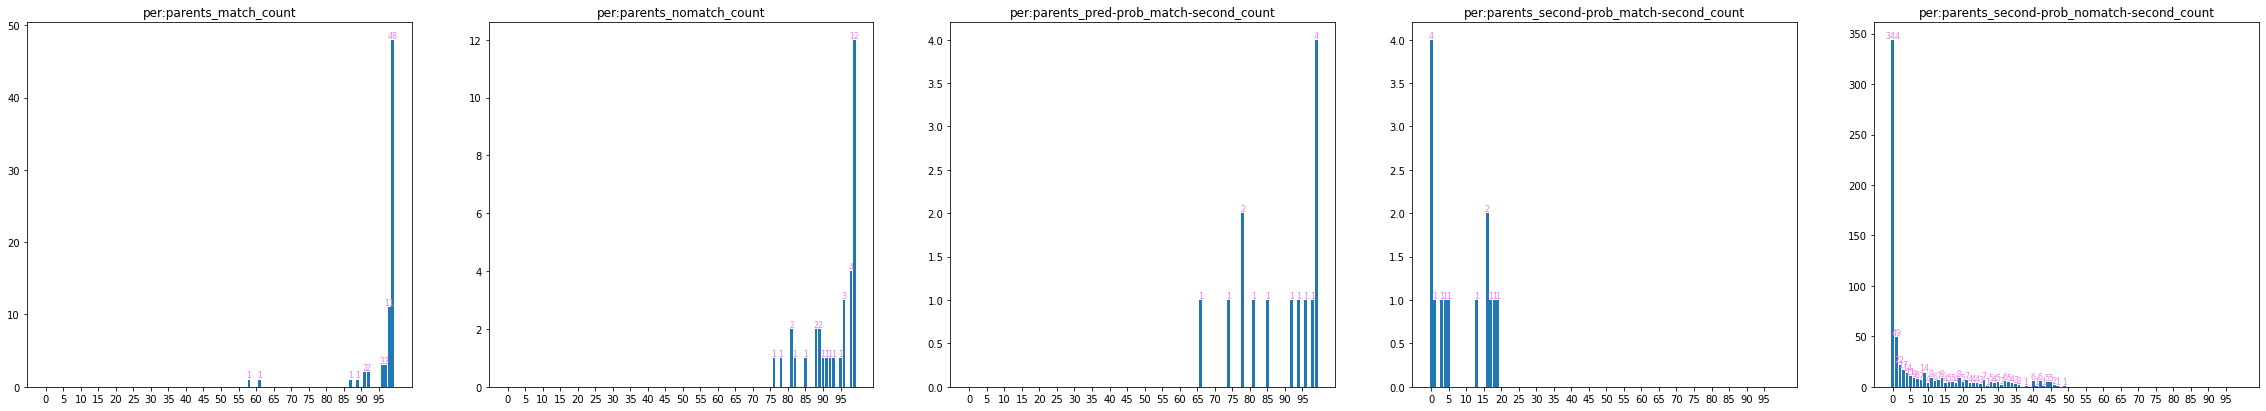

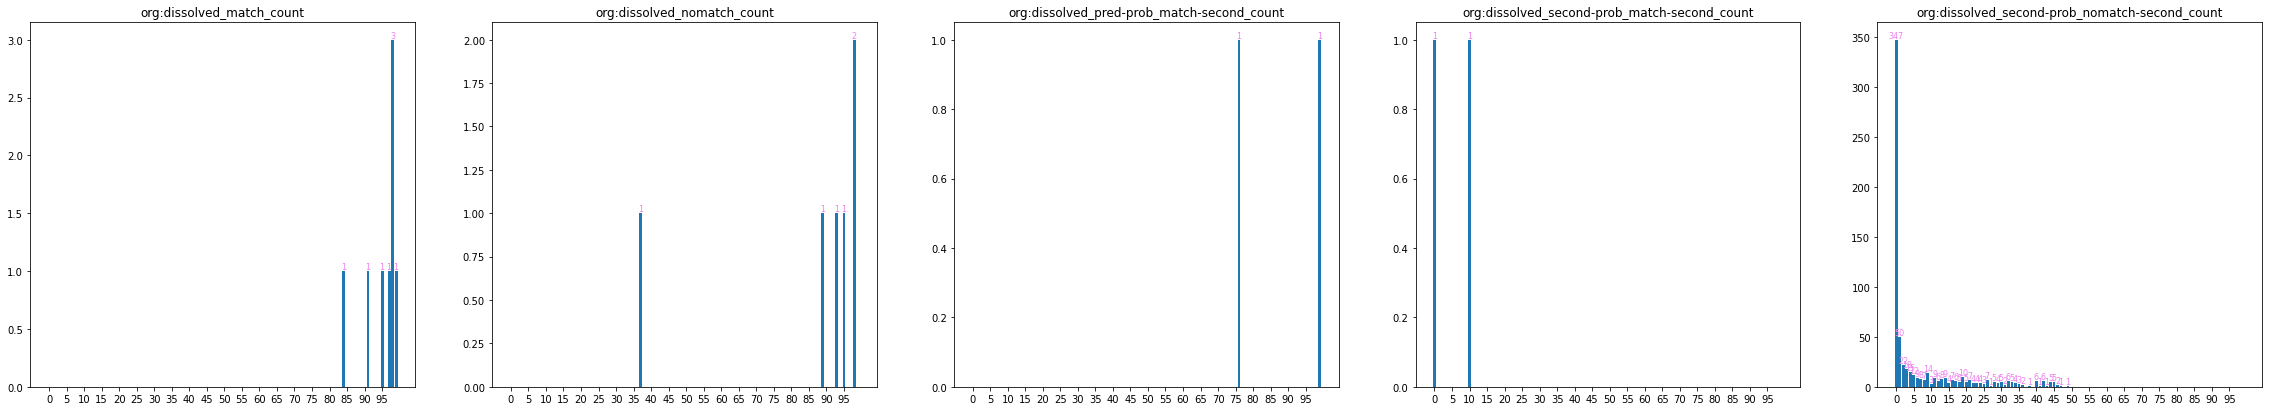

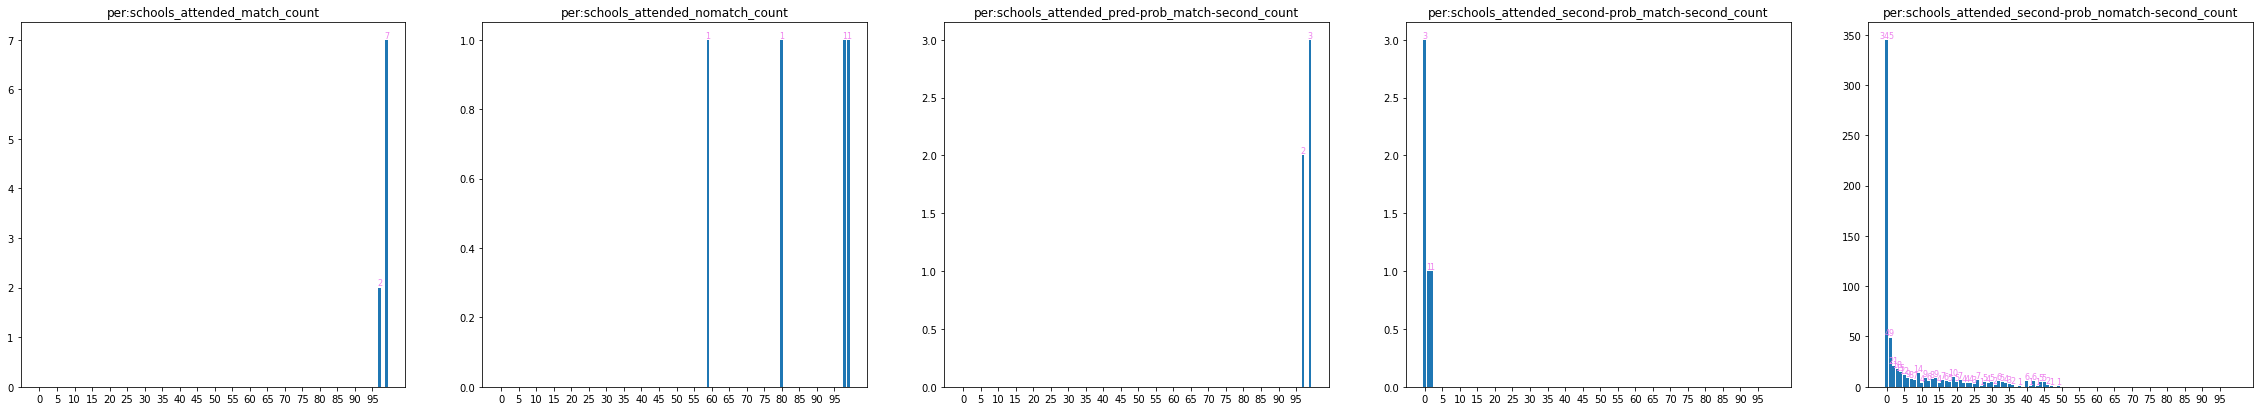

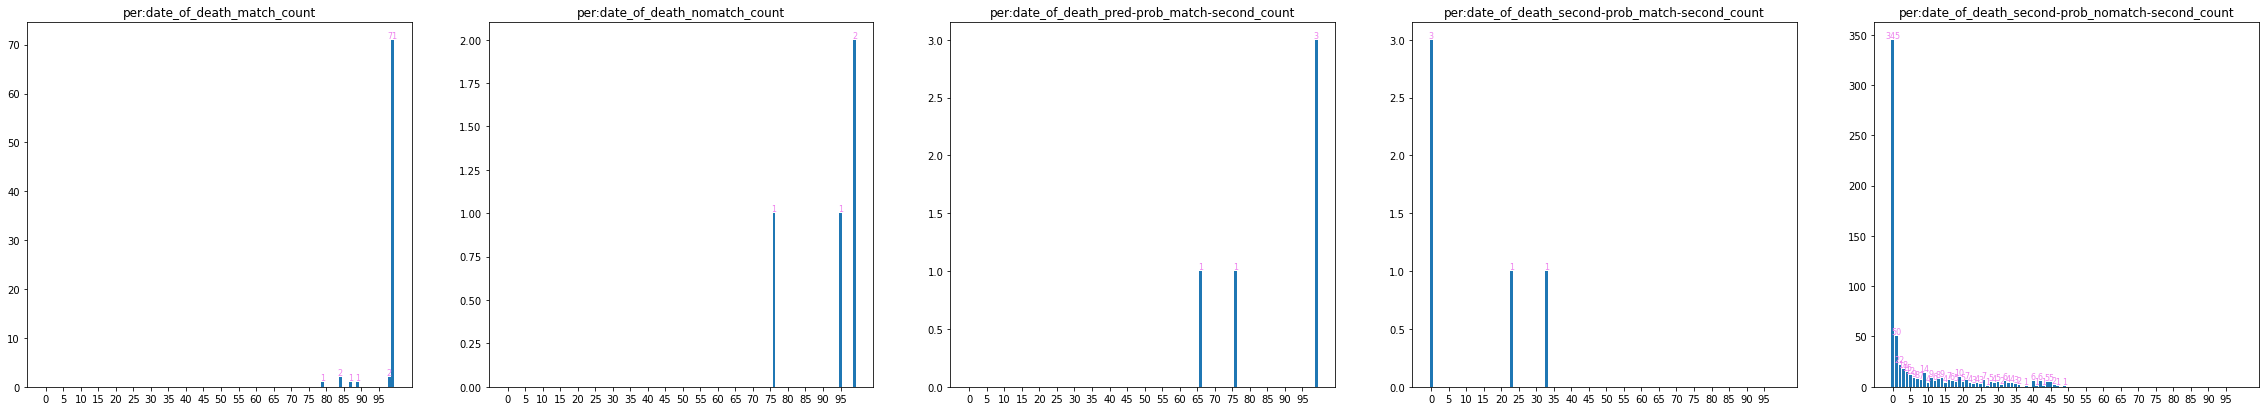

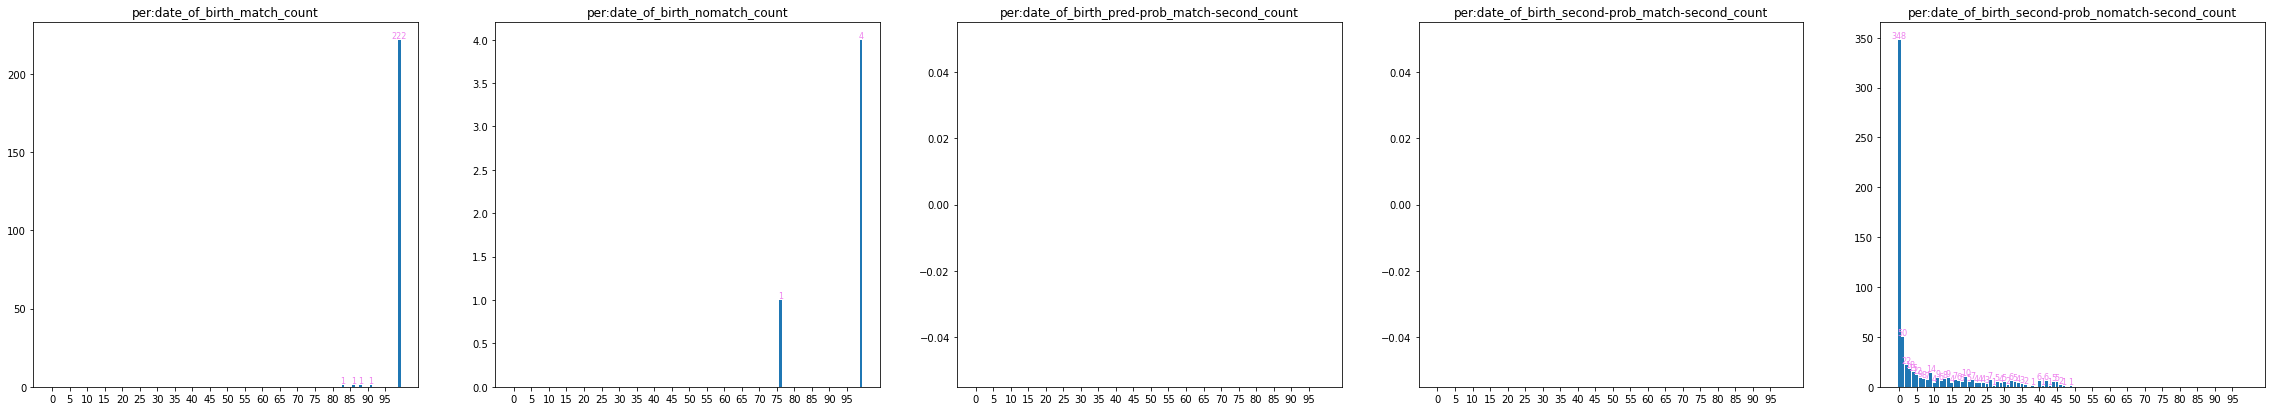

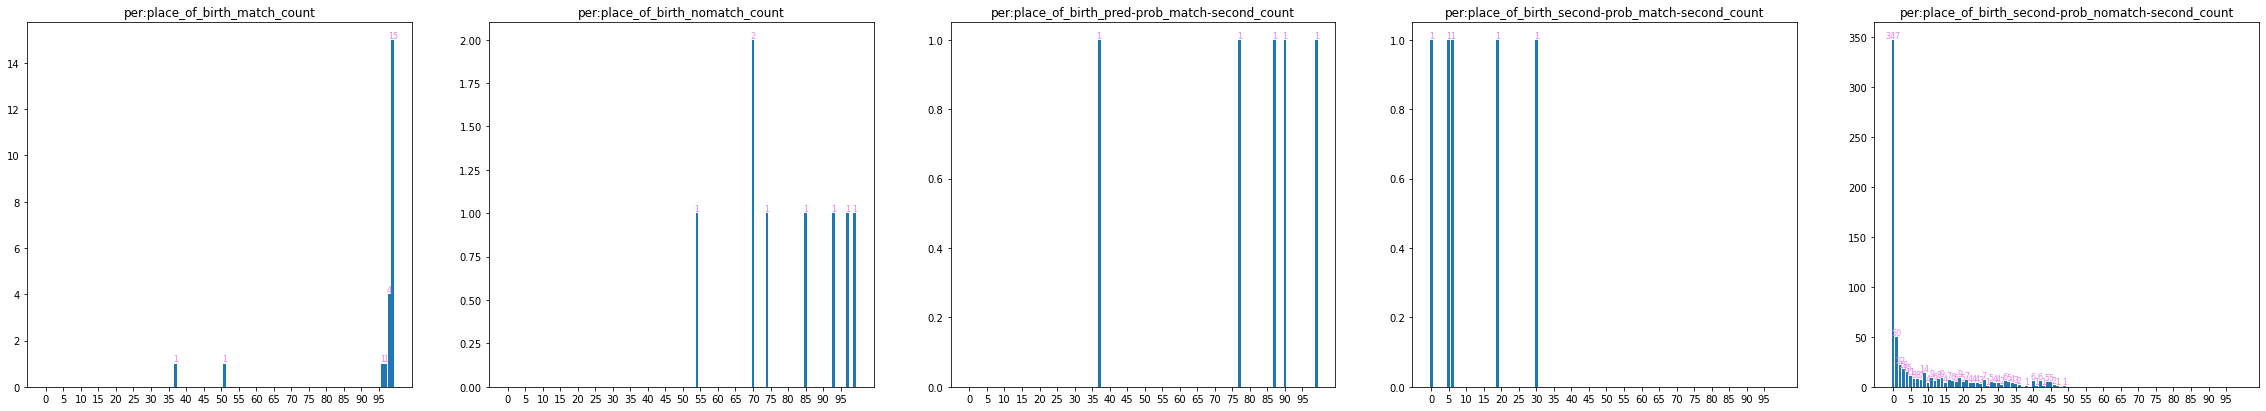

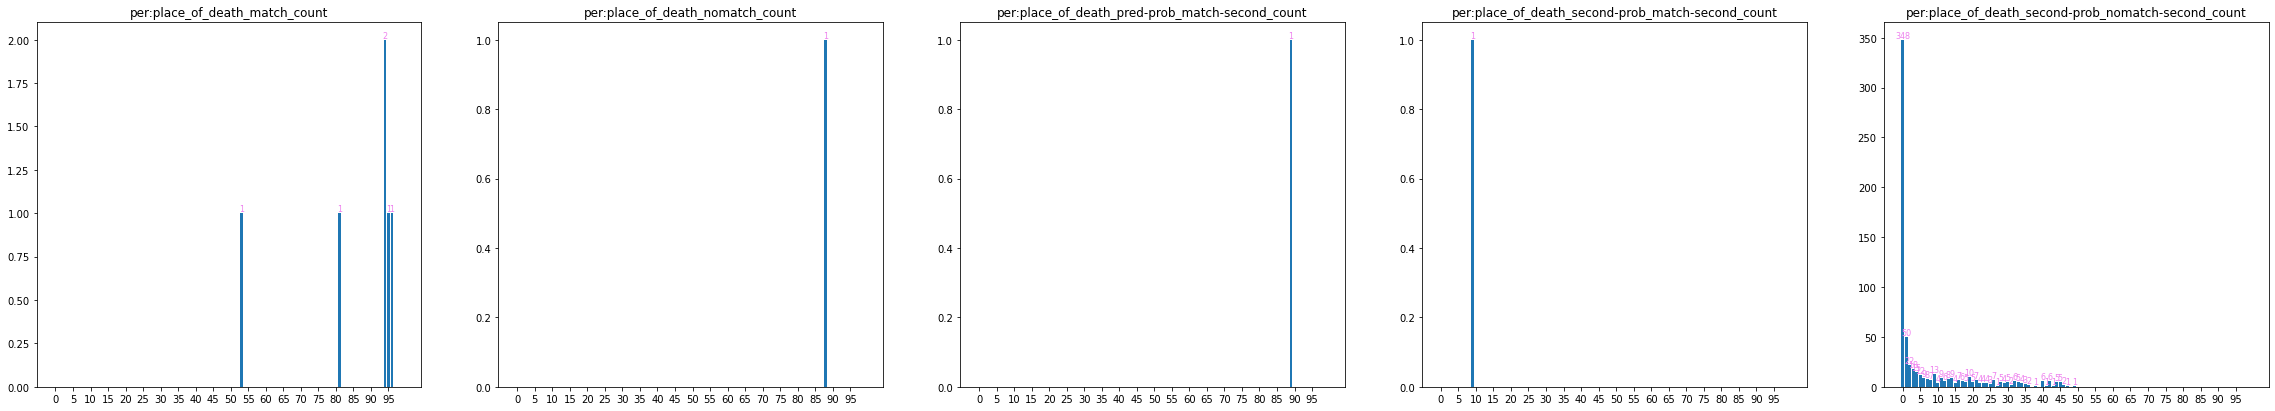

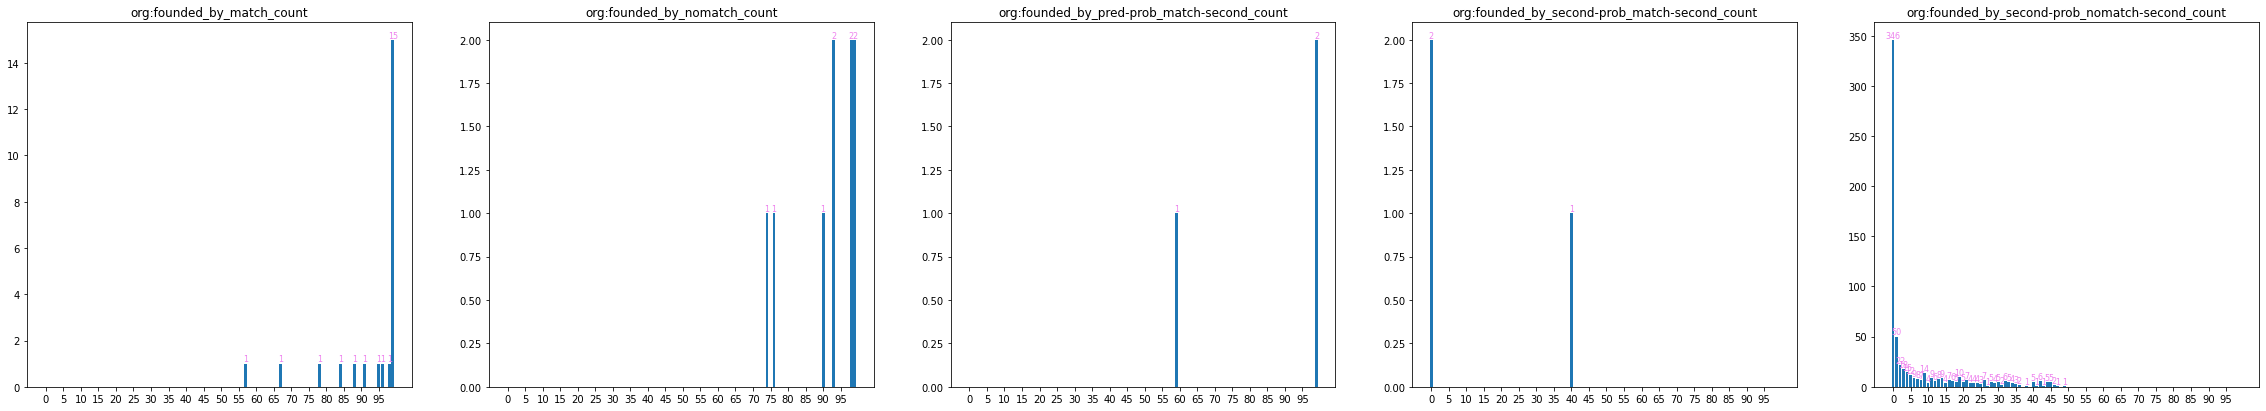

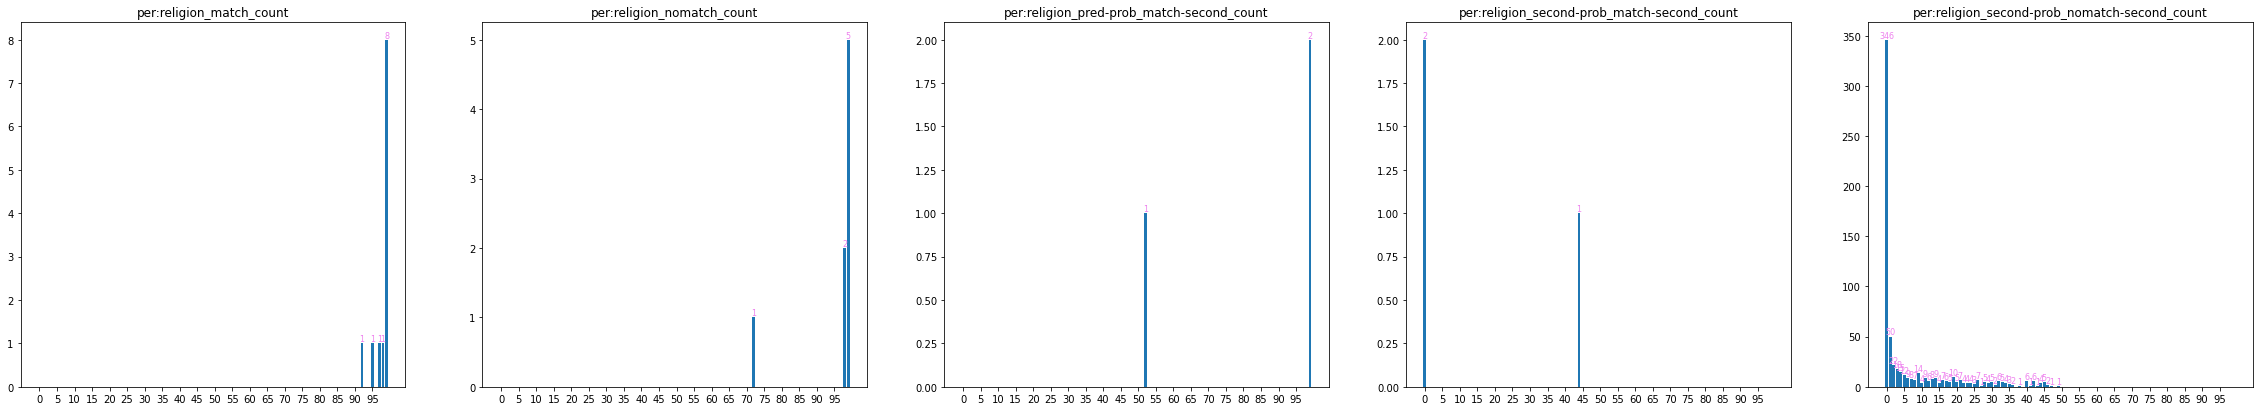

In [167]:
multi_plot('count')

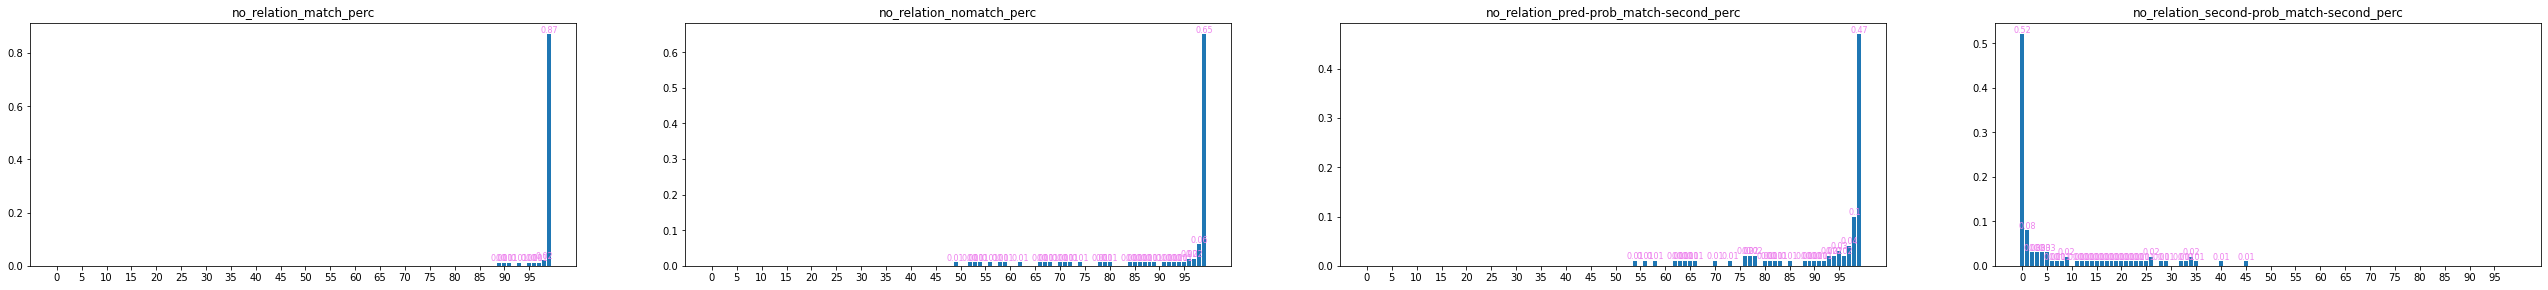

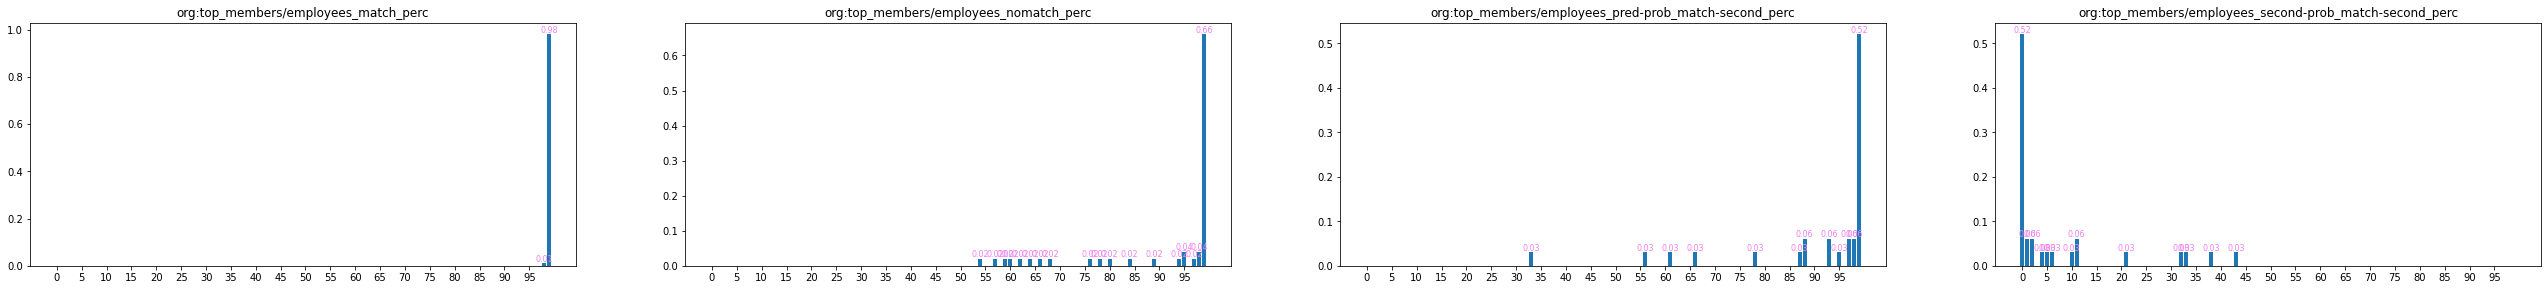

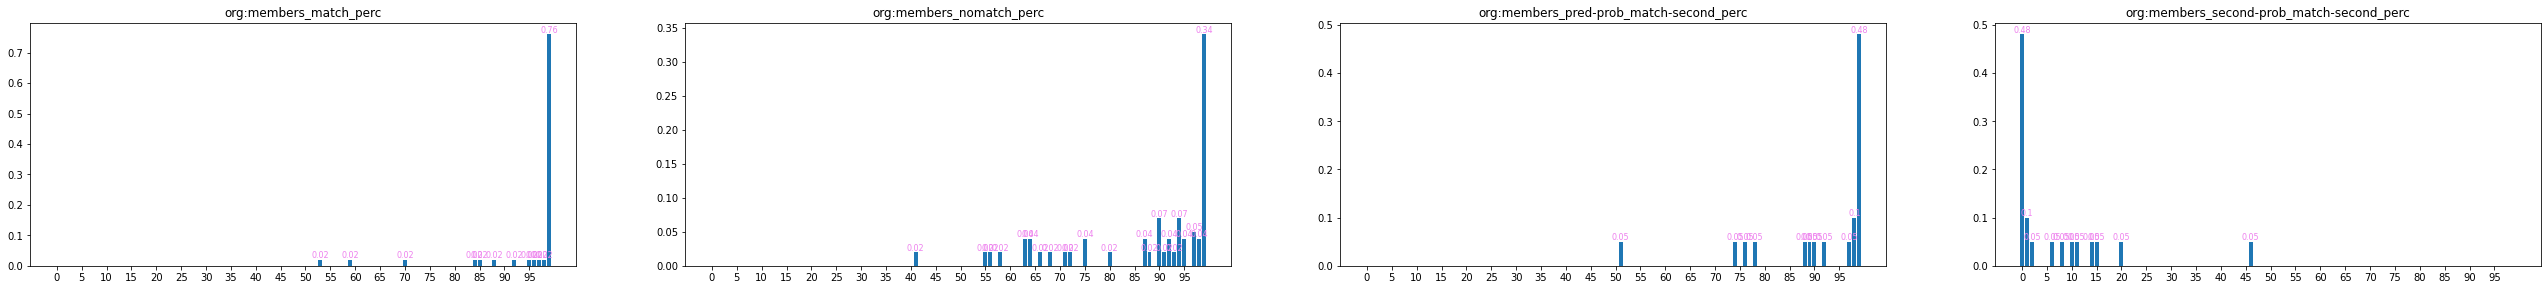

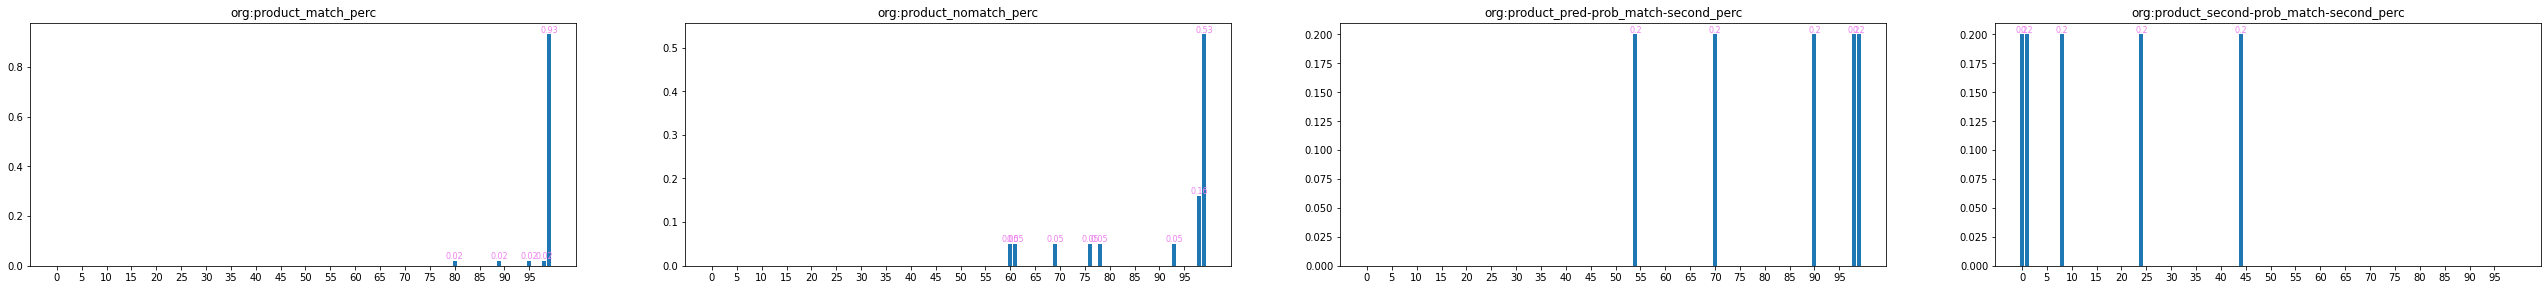

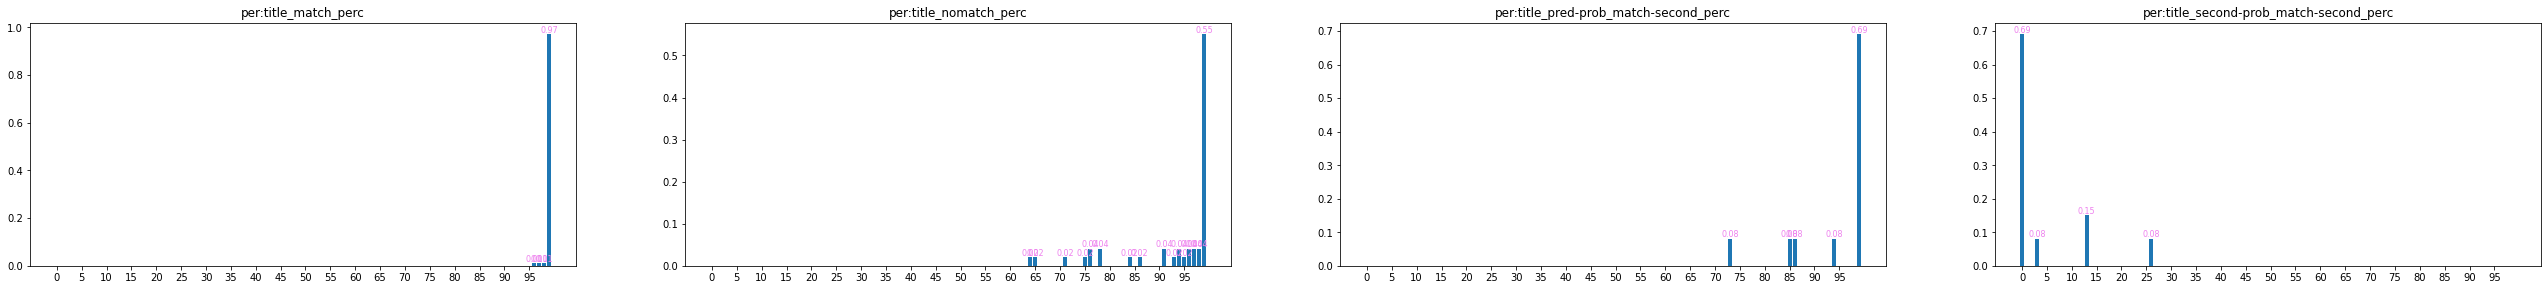

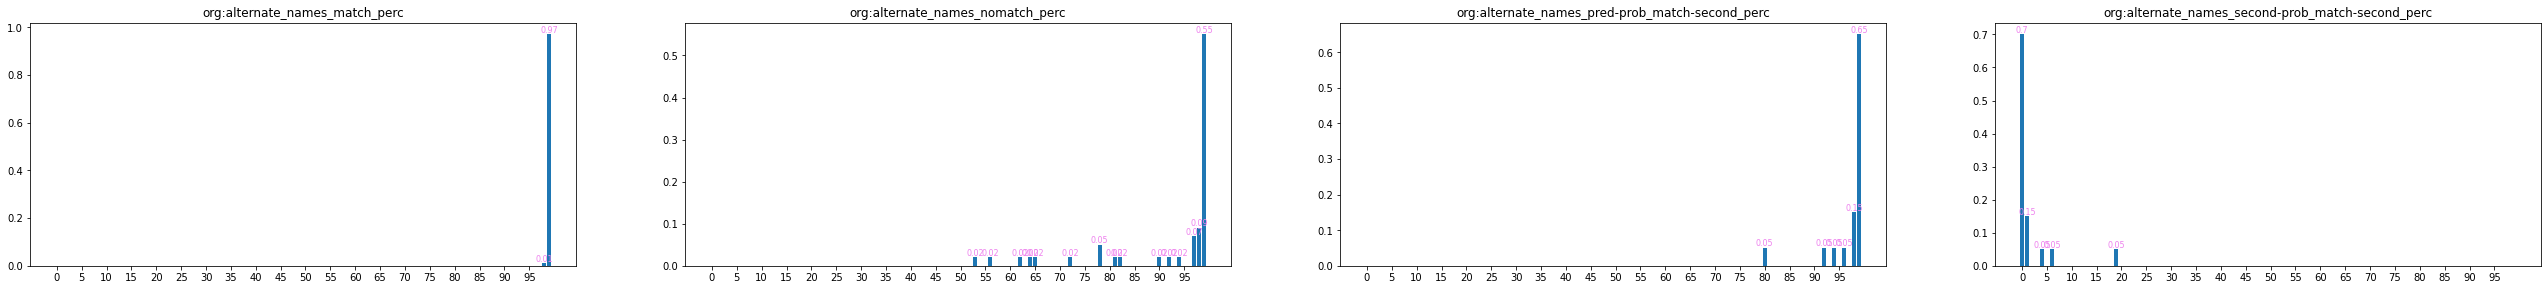

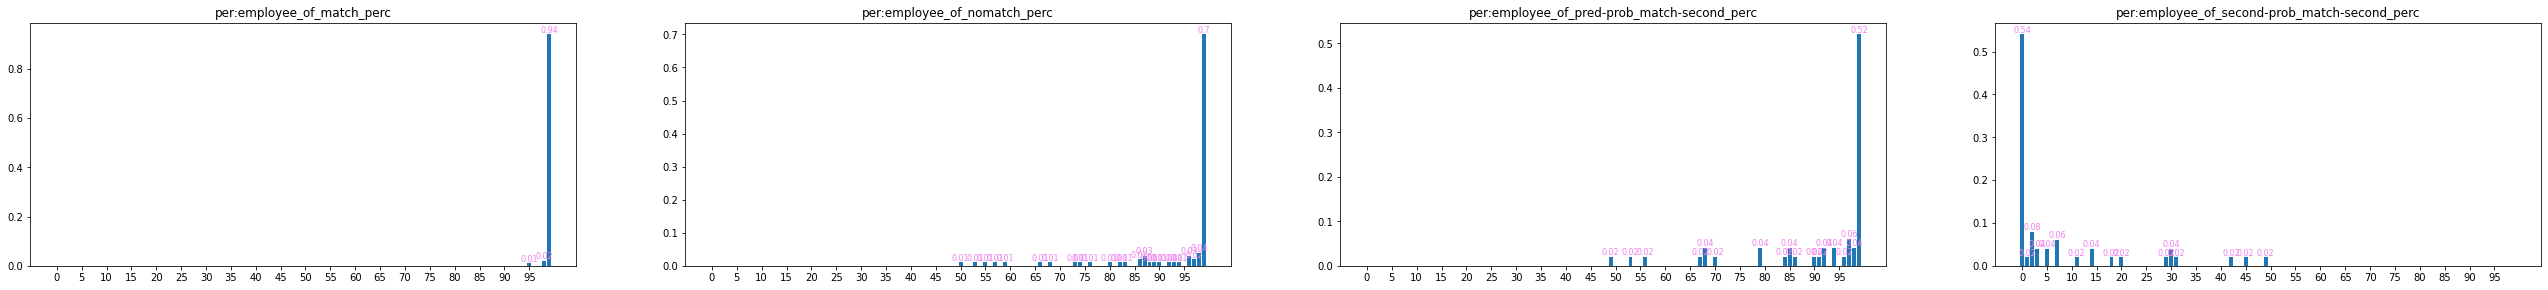

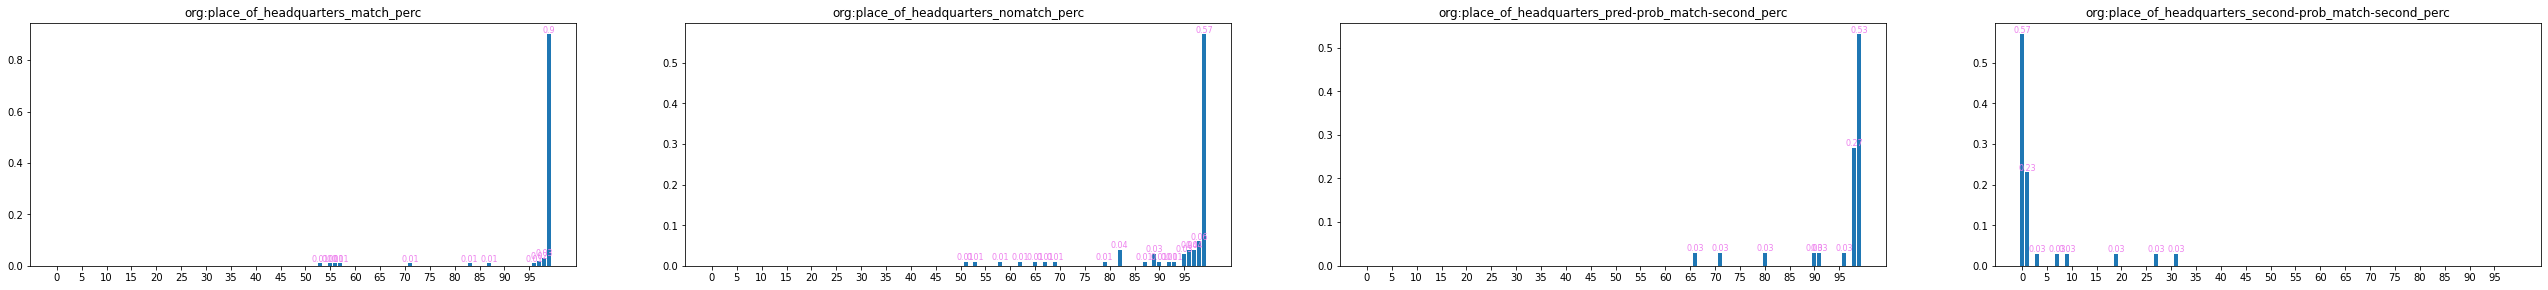

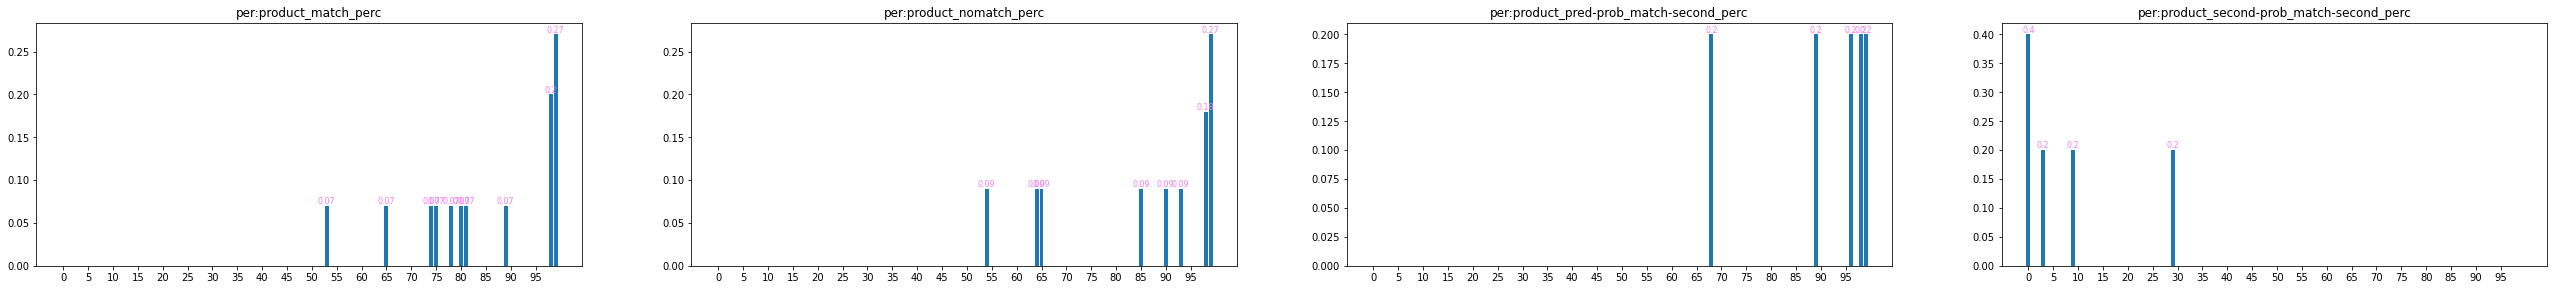

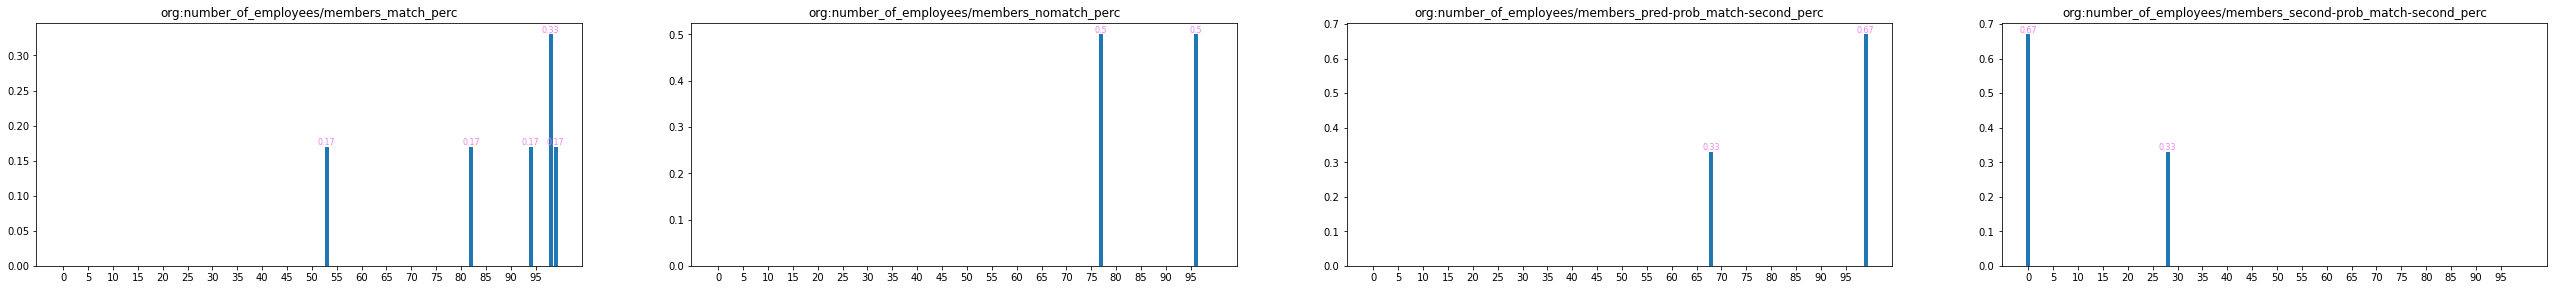

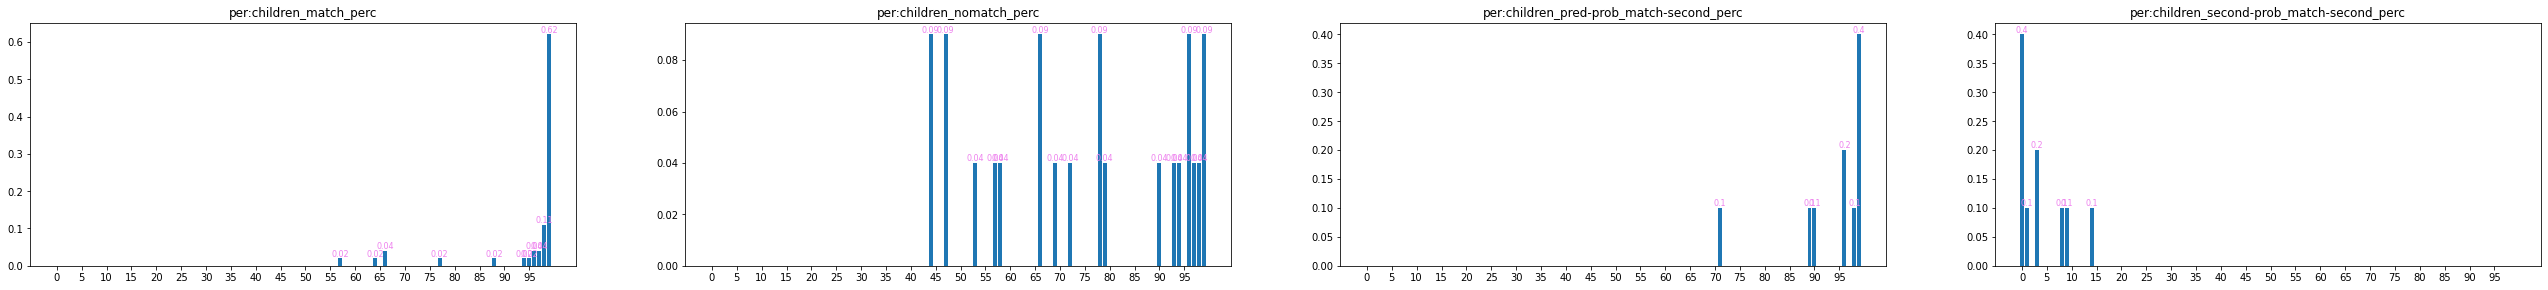

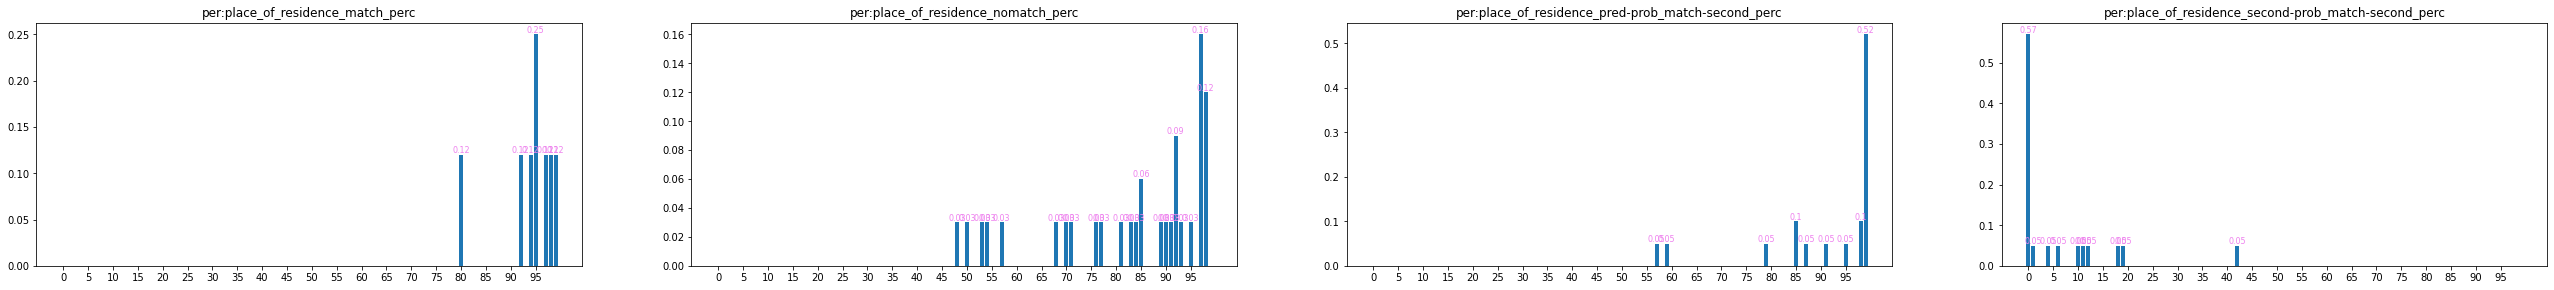

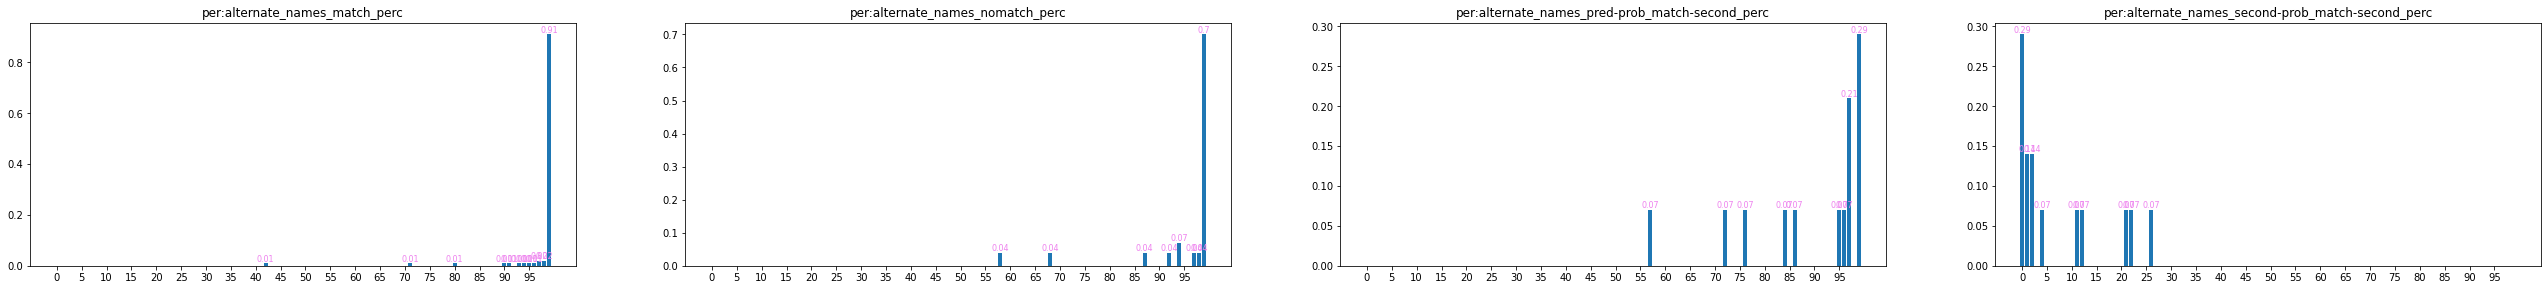

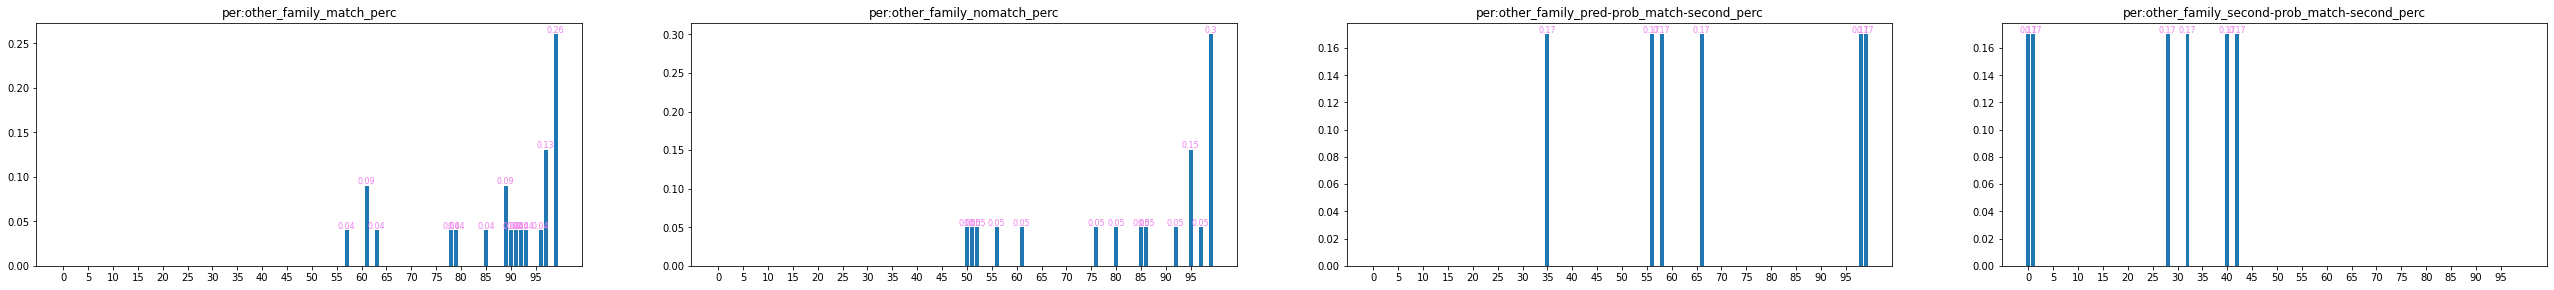

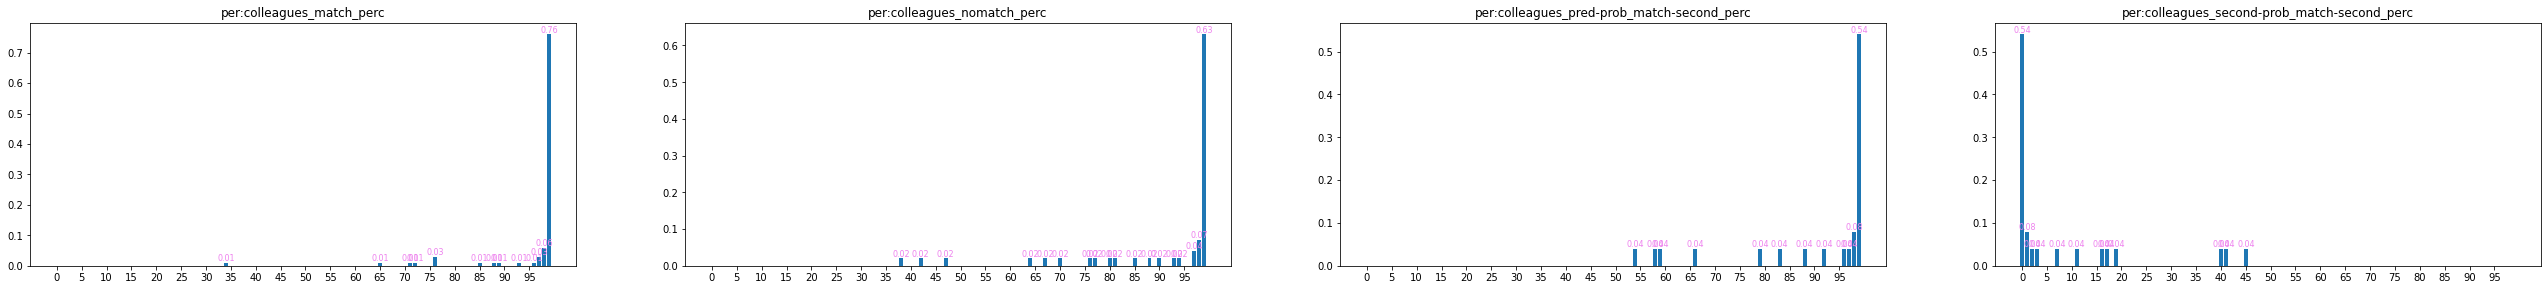

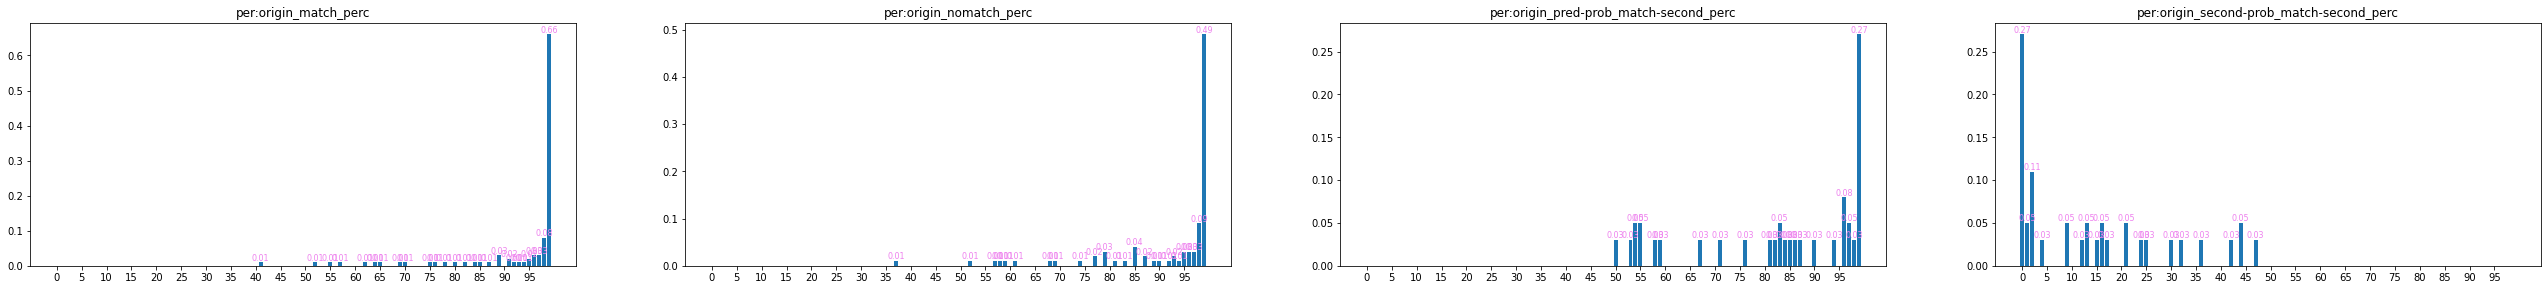

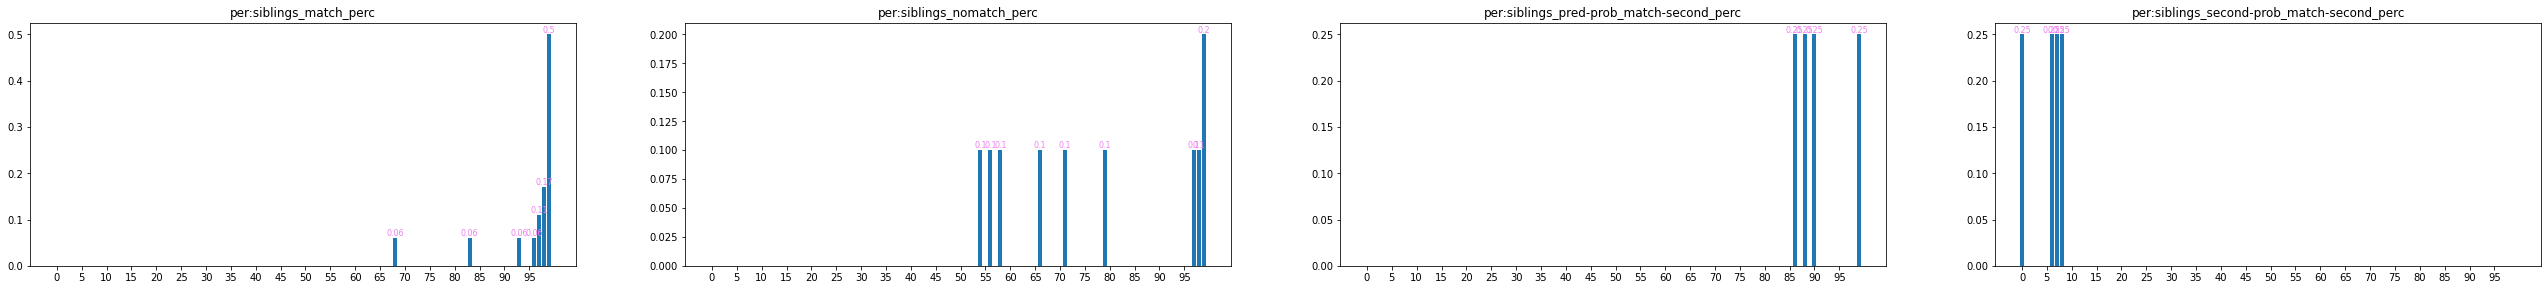

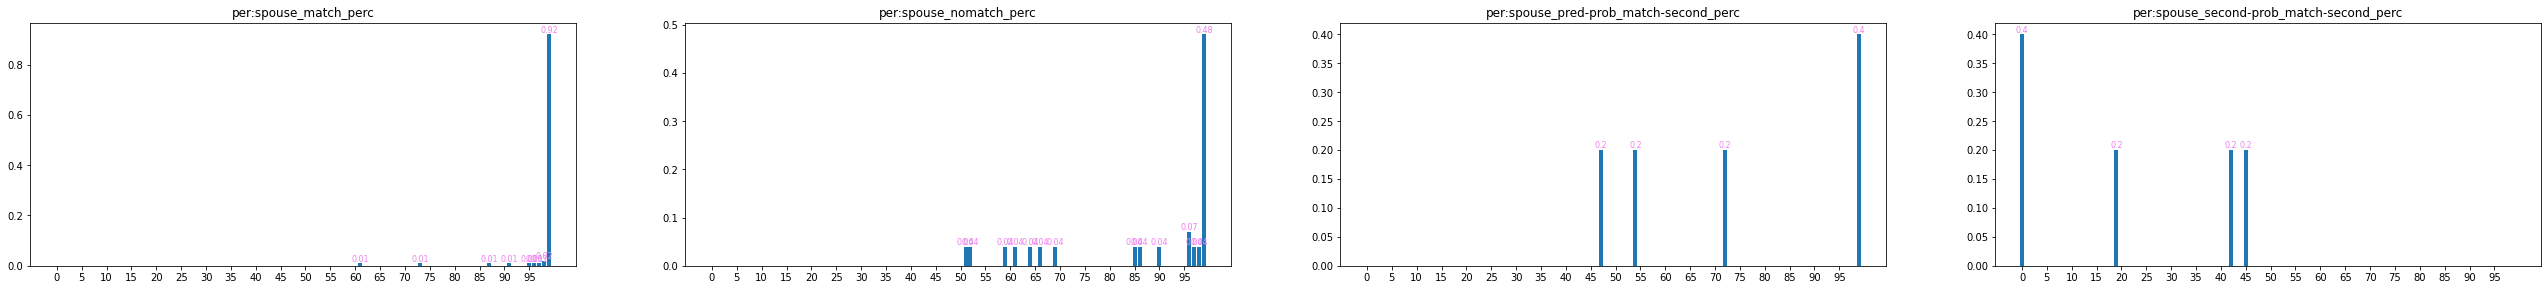

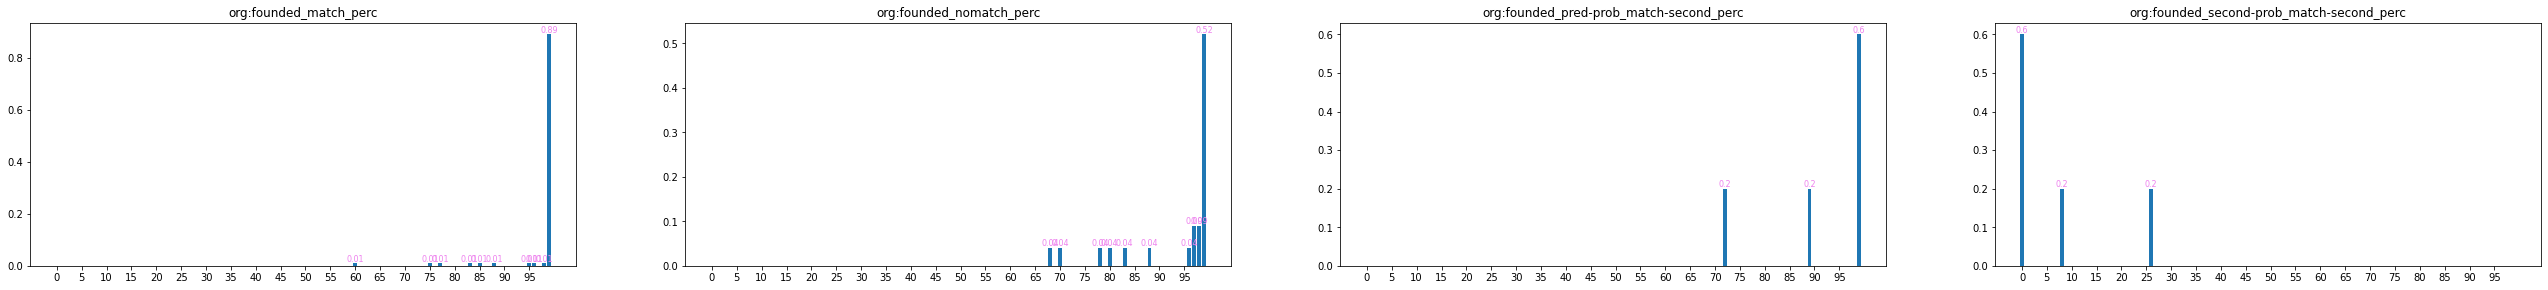

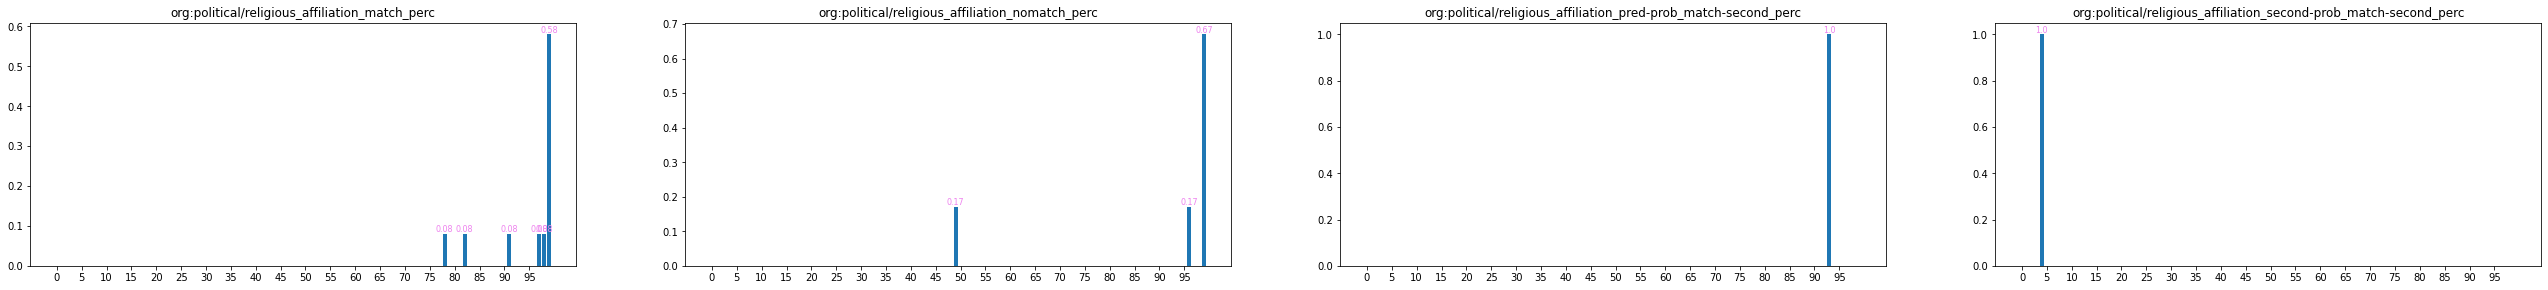

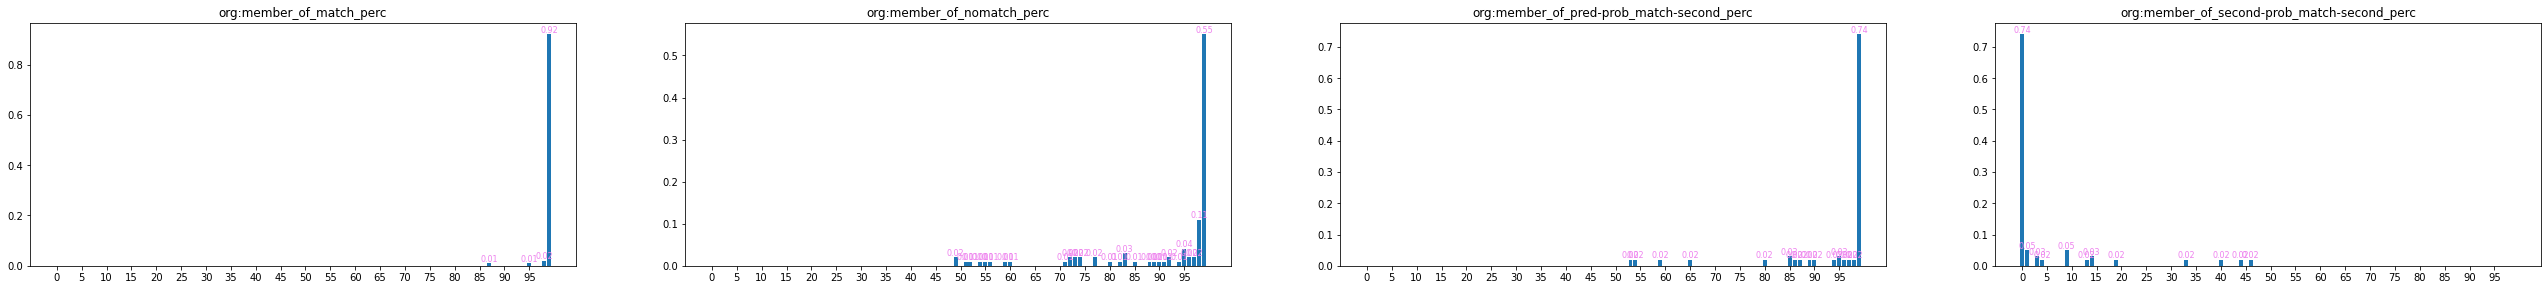

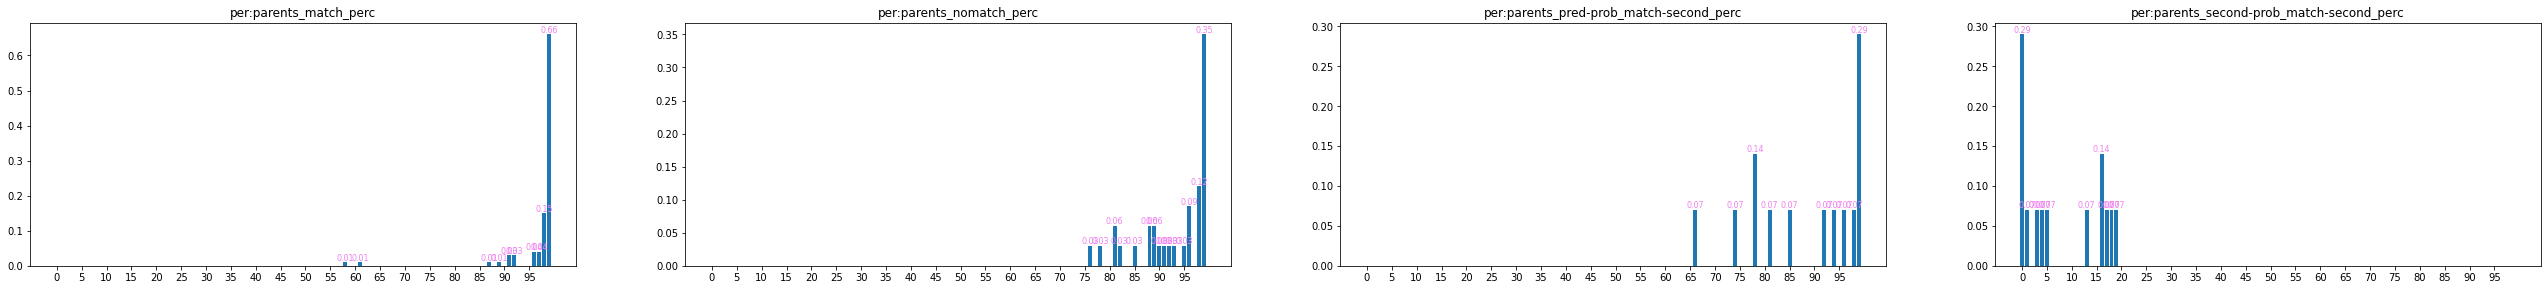

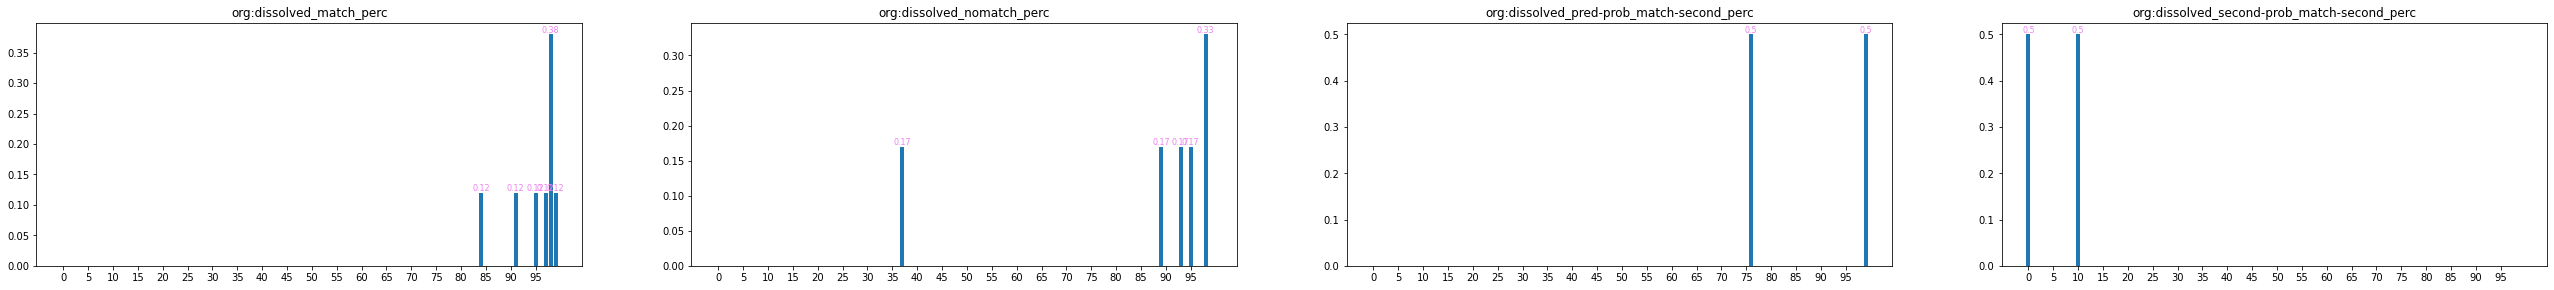

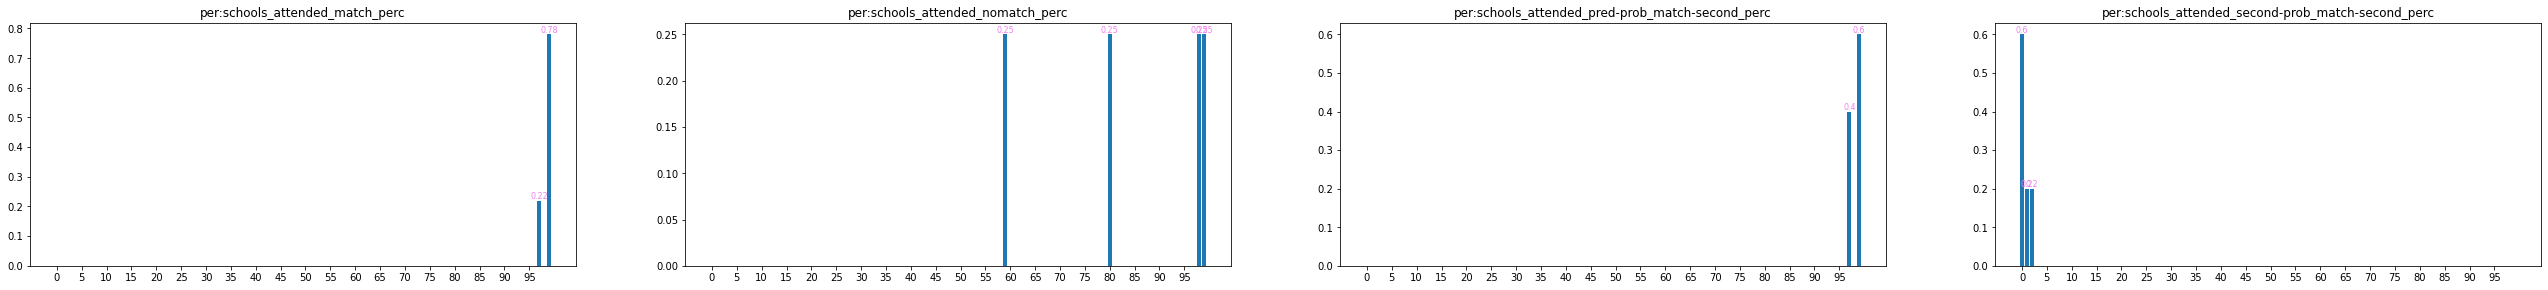

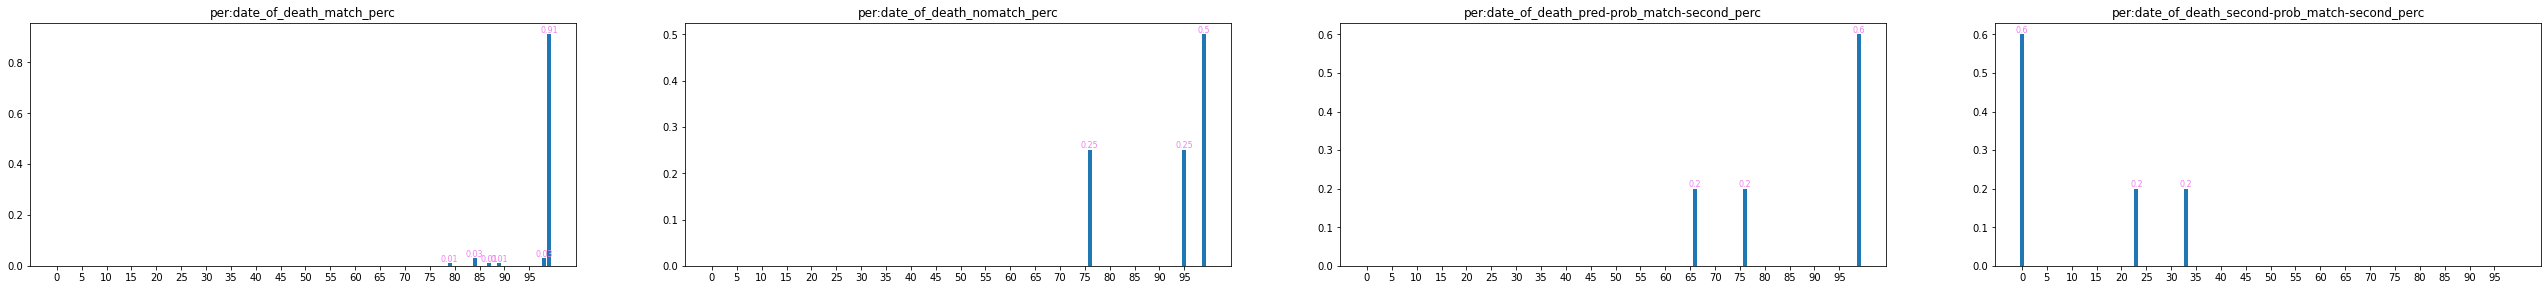

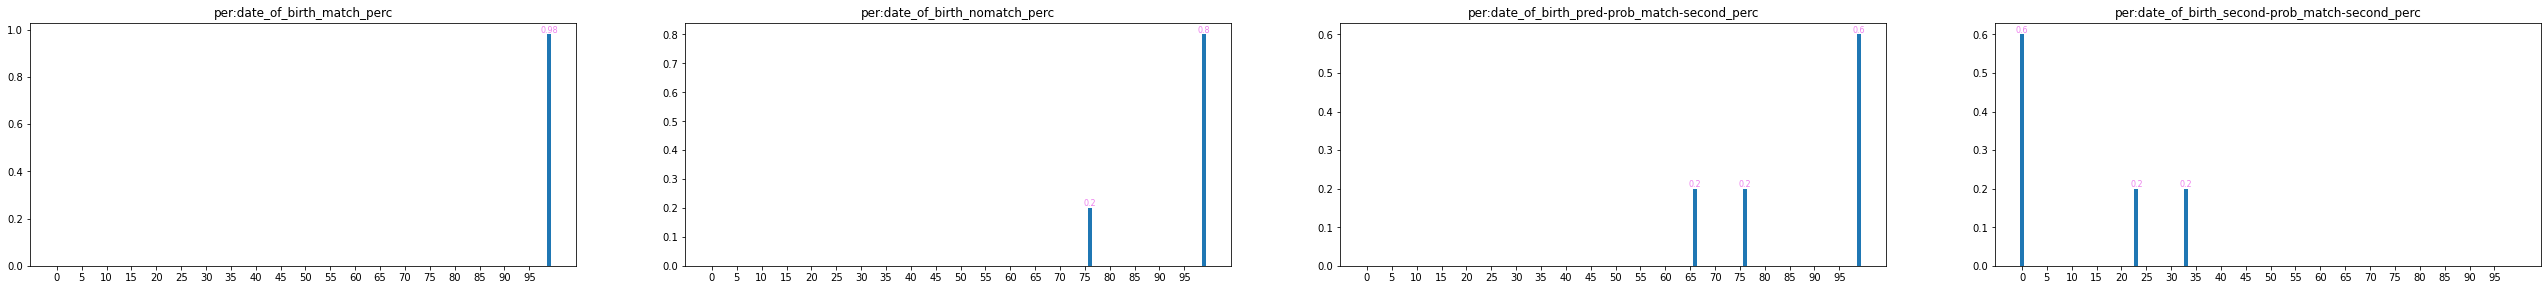

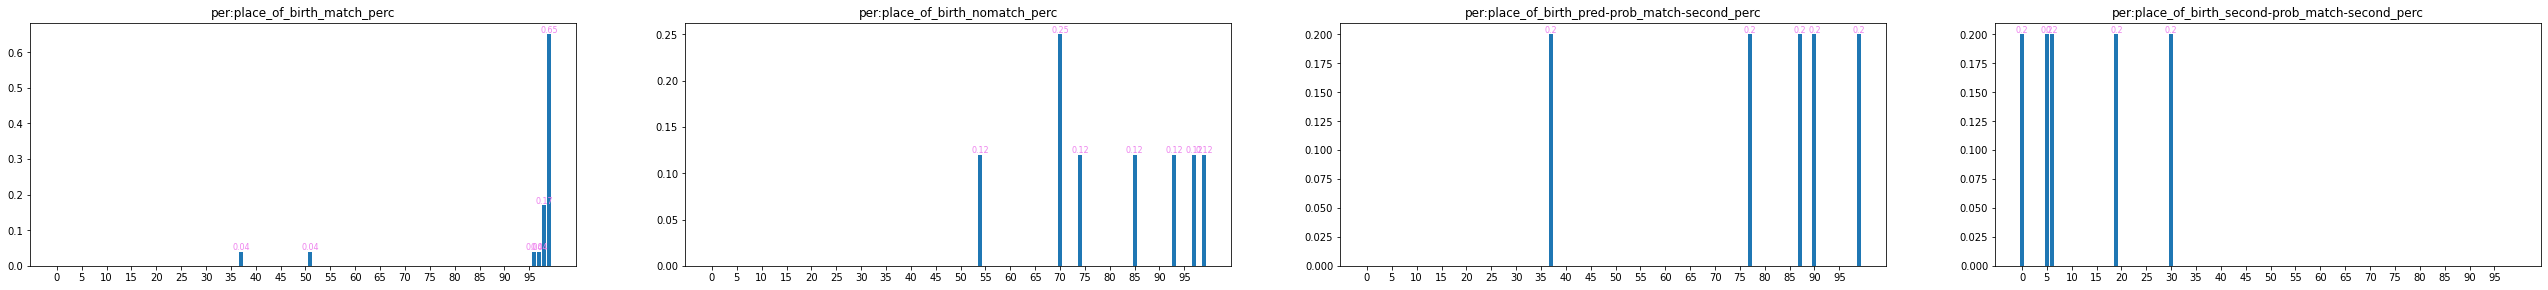

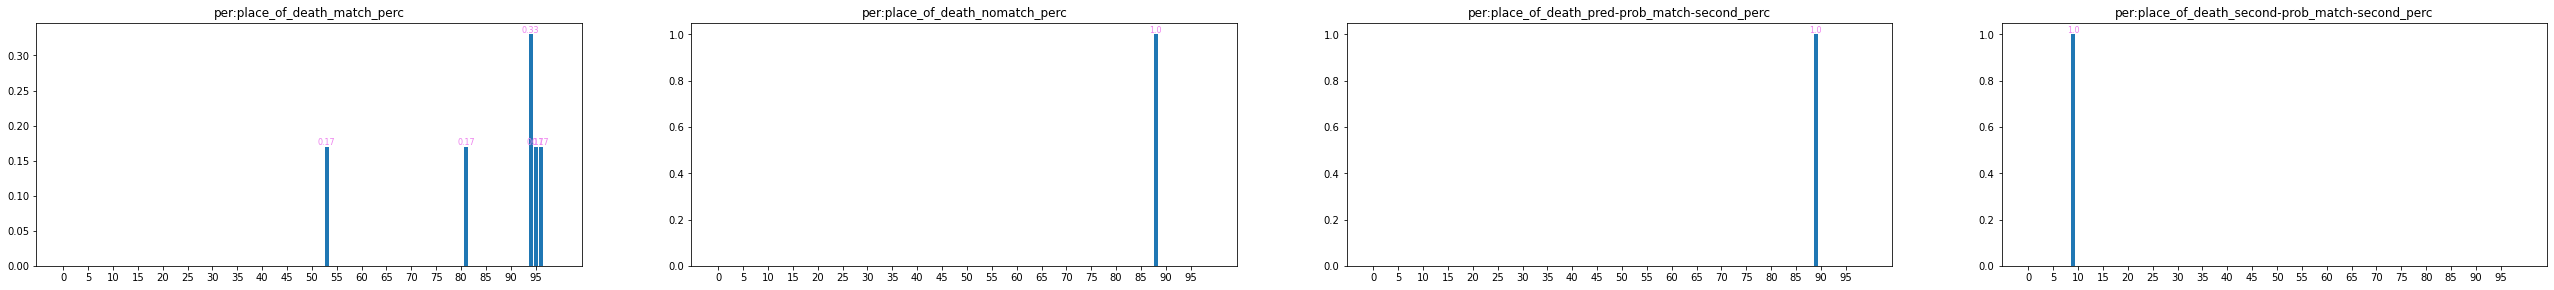

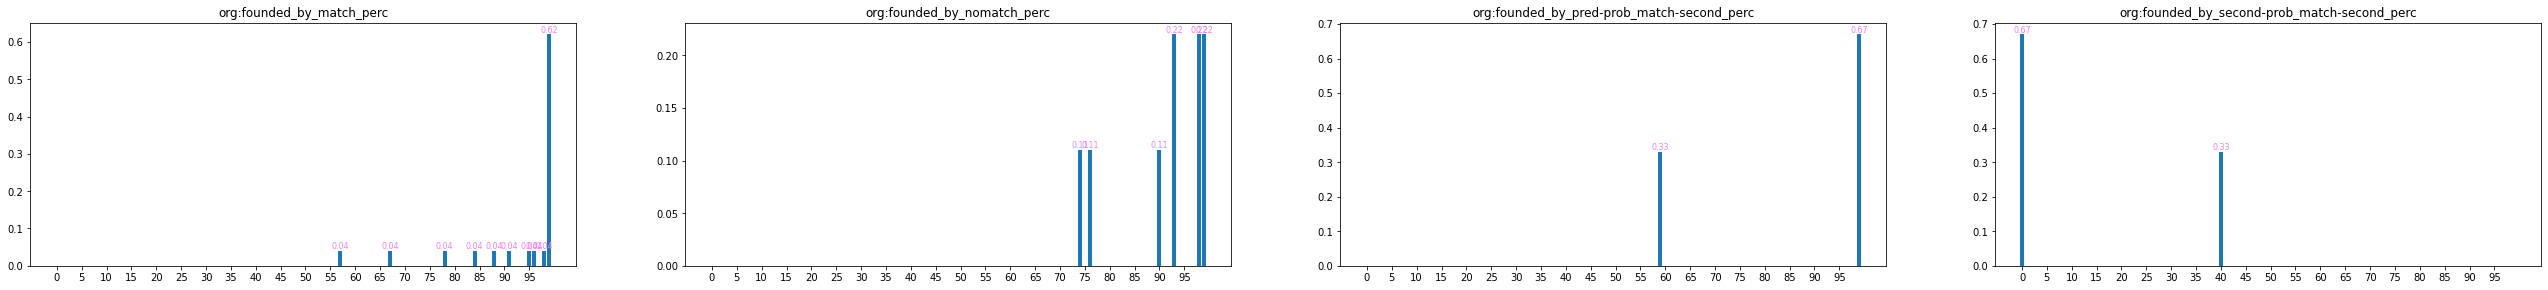

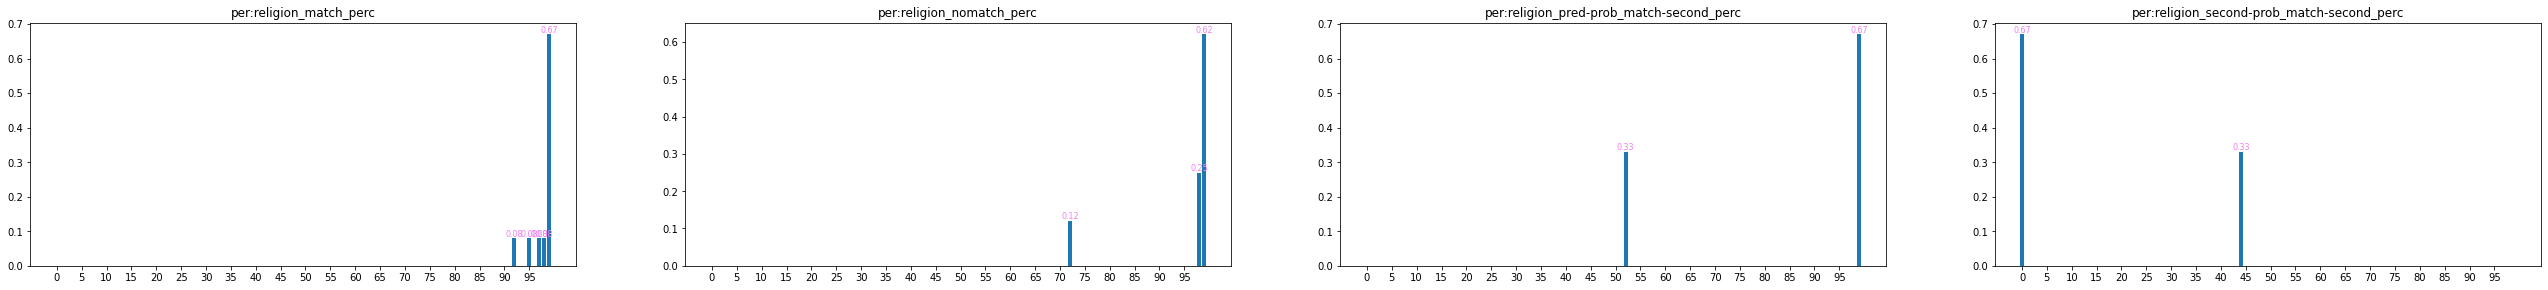

In [141]:
multi_plot('perc')

In [ ]:
label_count=[]
for i in range(0,10):
    label_count.append(len(no_match[(no_match['pred_prob']>i*0.1)&(no_match['pred_prob']<=(i+1)*0.1)&(no_match['pred_label']=='no_relation')]))

In [70]:
label_count

[0, 0, 0, 2, 3, 15, 13, 17, 24, 282]

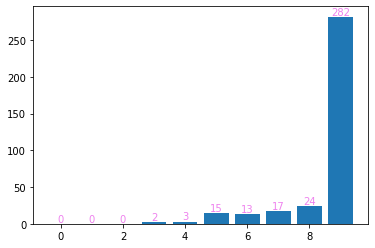

In [203]:
single_plot(range(0,10),label_count)

In [127]:
tp

,id,sentence,source,subj_word,subj_start_idx,subj_end_idx,subj_type,obj_word,obj_start_idx,obj_end_idx,...,per:place_of_birth,per:place_of_death,org:founded_by,per:religion,second_label,second_prob,pred_prob,gold_prob,prob_diff,prse_diff
0,9127,이 돈가스집은 백종원 더본코리아 대표가 지난해 11월 ‘골목식당‘ 서울 홍은동 포방...,wikitree,더본코리아,12,16,ORG,백종원,8,10,...,0.0000,0.0000,0.0000,0.0000,per:title,0.0000,0.9999,0.9999,0.0000,0.9998
1,18956,경기 양평군(군수 정동균)은 지난 18일 별관4층 대회의실에서 2030년까지 양평의...,wikitree,양평군,3,5,ORG,정동균,10,12,...,0.0000,0.0000,0.0000,0.0000,org:founded_by,0.0000,0.9999,0.9999,0.0000,0.9999
2,13521,올시즌 프로에 데뷔한 센터백 최규백이 2016년 하계 올림픽 국가대표팀으로 발탁되었다.,wikipedia,최규백,16,18,PER,센터백,12,14,...,0.0000,0.0000,0.0000,0.0000,per:parents,0.0000,0.9997,0.9997,0.0000,0.9997
3,31250,NTSB는 1967년 4월 1일 대통령 직속기관으로 설립되었다.,wikipedia,NTSB,0,3,ORG,1967년 4월 1일,6,16,...,0.0000,0.0000,0.0001,0.0000,org:dissolved,0.0002,0.9990,0.9990,0.0000,0.9988
4,14236,리그 우승으로 2007 AFC 챔피언스리그 티켓을 획득한 성남은 조별 예선과 8강전...,wikipedia,우라와 레드 다이아몬즈,69,80,ORG,2007,8,11,...,0.0000,0.0000,0.0000,0.0000,org:member_of,0.0000,0.9999,0.9999,0.0000,0.9999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6489,269,"시는 앞서 지난 9일 지역구 국회의원인 민홍철(김해갑), 김정호(김해을) 의원을 시...",wikitree,김정호,32,34,PER,국회의원,16,19,...,0.0000,0.0000,0.0000,0.0000,per:parents,0.0000,0.9997,0.9997,0.0000,0.9997
6490,1379,한명진 예비후보는 30년 공직 중 25년을 정부경제부처인 기획예산처-기획재정부에서 ...,wikitree,기획재정부,38,42,ORG,기획예산처,32,36,...,0.0000,0.0000,0.0000,0.0000,org:members,0.0019,0.9966,0.9966,0.0000,0.9947
6491,8825,"일반적으로 김정은의 어머니는 고용희(고영희)인 것으로 알려지고 있지만, 이복형 김정...",wikipedia,고용희,16,18,PER,김정은,6,8,...,0.0004,0.0002,0.0002,0.0001,per:parents,0.2378,0.6424,0.6424,0.0000,0.4045
6492,28301,그러나 번번히 거절당하자 2011년 7월부터는 제천시 제천여성도서관에 대한 항의 방...,wikipedia,여성도서관,32,36,ORG,제천시,26,28,...,0.0001,0.0000,0.0000,0.0000,org:members,0.0002,0.9992,0.9992,0.0000,0.9990


In [128]:
match

,sentence,subj_word,subj_type,obj_word,obj_type,gold_label,pred_label,second_label,gold_prob,pred_prob,second_prob,prob_diff,prse_diff
0,이 돈가스집은 백종원 더본코리아 대표가 지난해 11월 ‘골목식당‘ 서울 홍은동 포방...,더본코리아,ORG,백종원,PER,org:top_members/employees,org:top_members/employees,per:title,0.9999,0.9999,0.0000,0.0000,0.9998
1,경기 양평군(군수 정동균)은 지난 18일 별관4층 대회의실에서 2030년까지 양평의...,양평군,ORG,정동균,PER,org:top_members/employees,org:top_members/employees,org:founded_by,0.9999,0.9999,0.0000,0.0000,0.9999
2,올시즌 프로에 데뷔한 센터백 최규백이 2016년 하계 올림픽 국가대표팀으로 발탁되었다.,최규백,PER,센터백,POH,per:title,per:title,per:parents,0.9997,0.9997,0.0000,0.0000,0.9997
3,NTSB는 1967년 4월 1일 대통령 직속기관으로 설립되었다.,NTSB,ORG,1967년 4월 1일,DAT,org:founded,org:founded,org:dissolved,0.9990,0.9990,0.0002,0.0000,0.9988
4,리그 우승으로 2007 AFC 챔피언스리그 티켓을 획득한 성남은 조별 예선과 8강전...,우라와 레드 다이아몬즈,ORG,2007,DAT,no_relation,no_relation,org:member_of,0.9999,0.9999,0.0000,0.0000,0.9999
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6489,"시는 앞서 지난 9일 지역구 국회의원인 민홍철(김해갑), 김정호(김해을) 의원을 시...",김정호,PER,국회의원,POH,per:title,per:title,per:parents,0.9997,0.9997,0.0000,0.0000,0.9997
6490,한명진 예비후보는 30년 공직 중 25년을 정부경제부처인 기획예산처-기획재정부에서 ...,기획재정부,ORG,기획예산처,ORG,org:alternate_names,org:alternate_names,org:members,0.9966,0.9966,0.0019,0.0000,0.9947
6491,"일반적으로 김정은의 어머니는 고용희(고영희)인 것으로 알려지고 있지만, 이복형 김정...",고용희,PER,김정은,PER,per:children,per:children,per:parents,0.6424,0.6424,0.2378,0.0000,0.4045
6492,그러나 번번히 거절당하자 2011년 7월부터는 제천시 제천여성도서관에 대한 항의 방...,여성도서관,ORG,제천시,LOC,org:place_of_headquarters,org:place_of_headquarters,org:members,0.9992,0.9992,0.0002,0.0000,0.9990


In [250]:
no_match[no_match['gold_prob']==no_match['second_prob']]

,sentence,subj_word,subj_type,obj_word,obj_type,gold_label,pred_label,second_label,gold_prob,pred_prob,second_prob,prob_diff,prse_diff
84,"2017년 2월 14일, 같은 해 여름에 치러질 도쿄도의회 선거를 앞두고 민진당 도...",유신당,ORG,민진당,ORG,no_relation,org:alternate_names,no_relation,0.0154,0.9829,0.0154,0.9675,0.9675
1026,"1991년 개헌후 처음 벌어졌던 기초지방선거에서 참패한 후, 9월 10일 합당에 합...",신민주연합,ORG,민주당,ORG,no_relation,org:alternate_names,no_relation,0.3459,0.5342,0.3459,0.1883,0.1883
5514,PSG-OM 혹은 OM-PSG는 흔히 르 클라시크(Le Classique)라고 불리...,파리 생제르맹 FC,ORG,PSG-OM,POH,no_relation,org:alternate_names,no_relation,0.0150,0.9835,0.0150,0.9684,0.9684
5677,"오르내림 (OLNL)이 소속된 크루는 쥬스오버알콜 (juiceoveralchol),...",OLNL,ORG,WYBH,ORG,no_relation,org:alternate_names,no_relation,0.3685,0.6259,0.3685,0.2574,0.2574
5782,"약칭은 한민당. 1945년 9월 16일에 조선민족당, 한국국민당 등이 만든 정당으로...",한민당,ORG,"조선민족당, 한국국민당",ORG,no_relation,org:alternate_names,no_relation,0.4267,0.5687,0.4267,0.1420,0.1420
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6397,"앨범의 수록곡은 11곡에서 14곡으로 판마다 차이를 보이는데, 이 중에는 퓨처 컷과...",마크 론슨,PER,프로듀서,POH,per:title,no_relation,per:title,0.0011,0.9981,0.0011,0.9971,0.9971
3266,20세기의 유명한 카스트라토이자 최후의 카스트라토는 알레산드로 모레스키(Alessa...,알레산드로 모레스키,PER,카스트라토,POH,per:title,per:alternate_names,per:title,0.0009,0.9971,0.0009,0.9962,0.9962
1265,"노중 홋타 마사요시, 시마즈 나리아키라(사쓰마 번), 다테 무네나리(우와지마 번주)...",야마우치 요도,PER,도사 번주,ORG,per:title,per:employee_of,per:title,0.0018,0.9970,0.0018,0.9952,0.9952
3132,"1920년 1월 13일, 임시정부의 기관지 ‘독립신문’은 대한독립군 홍범도 의용대장...",홍범도,PER,대한독립군,ORG,per:title,per:employee_of,per:title,0.0000,0.9997,0.0000,0.9997,0.9997


In [273]:
no_match[no_match['gold_prob']==no_match['second_prob']][['pred_prob','second_prob']].to_csv('/opt/ml/code/prediction/prsc.csv')

In [274]:
lam = no_match[(no_match['gold_prob']==no_match['second_prob'])][['pred_prob','second_prob']]
lam['ps_diff']=lam['pred_prob']-lam['second_prob']

In [275]:
# pd.set_option('display.max_rows',None)

In [278]:
lam.sort_values(by='ps_diff',ascending=True).reset_index()

,index,pred_prob,second_prob,ps_diff
0,4410,0.4999,0.4976,0.0022
1,4697,0.3348,0.3270,0.0078
2,5110,0.4746,0.4598,0.0148
3,2025,0.5083,0.4754,0.0329
4,1546,0.5122,0.4617,0.0504
5,4743,0.5303,0.4673,0.0630
6,2282,0.5172,0.4509,0.0664
7,1221,0.3543,0.2847,0.0696
8,959,0.3760,0.3042,0.0718
9,174,0.5229,0.4481,0.0748


In [130]:
no_match

,sentence,subj_word,subj_type,obj_word,obj_type,gold_label,pred_label,second_label,gold_prob,pred_prob,second_prob,prob_diff,prse_diff
84,"2017년 2월 14일, 같은 해 여름에 치러질 도쿄도의회 선거를 앞두고 민진당 도...",유신당,ORG,민진당,ORG,no_relation,org:alternate_names,no_relation,0.0154,0.9829,0.0154,0.9675,0.9675
1026,"1991년 개헌후 처음 벌어졌던 기초지방선거에서 참패한 후, 9월 10일 합당에 합...",신민주연합,ORG,민주당,ORG,no_relation,org:alternate_names,no_relation,0.3459,0.5342,0.3459,0.1883,0.1883
5514,PSG-OM 혹은 OM-PSG는 흔히 르 클라시크(Le Classique)라고 불리...,파리 생제르맹 FC,ORG,PSG-OM,POH,no_relation,org:alternate_names,no_relation,0.0150,0.9835,0.0150,0.9684,0.9684
5677,"오르내림 (OLNL)이 소속된 크루는 쥬스오버알콜 (juiceoveralchol),...",OLNL,ORG,WYBH,ORG,no_relation,org:alternate_names,no_relation,0.3685,0.6259,0.3685,0.2574,0.2574
5782,"약칭은 한민당. 1945년 9월 16일에 조선민족당, 한국국민당 등이 만든 정당으로...",한민당,ORG,"조선민족당, 한국국민당",ORG,no_relation,org:alternate_names,no_relation,0.4267,0.5687,0.4267,0.1420,0.1420
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3132,"1920년 1월 13일, 임시정부의 기관지 ‘독립신문’은 대한독립군 홍범도 의용대장...",홍범도,PER,대한독립군,ORG,per:title,per:employee_of,per:title,0.0000,0.9997,0.0000,0.9997,0.9997
4442,"리처드 데이비스 윈터스 또는 딕 윈터스(Richard Davis ""Dick"" Win...",딕 윈터스,PER,미국 육군,ORG,per:title,per:employee_of,per:title,0.0002,0.9993,0.0002,0.9991,0.9991
5011,"그는 그리스의 왕이 되었지만, 크리스티안 9세의 아들이었으므로, 동시에 덴마크의 왕...",크리스티안 9세,PER,덴마크의 왕자,LOC,per:title,per:parents,no_relation,0.0012,0.8815,0.1043,0.8803,0.7771
4275,정화왕후 강씨(貞和王后 康氏)는 고려의 추존왕비이며 태조 왕건의 증조할머니이다.,정화왕후,PER,추존왕비,POH,per:title,per:parents,per:spouse,0.0031,0.8823,0.0960,0.8791,0.7863


In [131]:
len(match)/len(tp)

0.7964274715121651

In [57]:
dict_label_to_num

{'no_relation': 0,
 'org:top_members/employees': 1,
 'org:members': 2,
 'org:product': 3,
 'per:title': 4,
 'org:alternate_names': 5,
 'per:employee_of': 6,
 'org:place_of_headquarters': 7,
 'per:product': 8,
 'org:number_of_employees/members': 9,
 'per:children': 10,
 'per:place_of_residence': 11,
 'per:alternate_names': 12,
 'per:other_family': 13,
 'per:colleagues': 14,
 'per:origin': 15,
 'per:siblings': 16,
 'per:spouse': 17,
 'org:founded': 18,
 'org:political/religious_affiliation': 19,
 'org:member_of': 20,
 'per:parents': 21,
 'org:dissolved': 22,
 'per:schools_attended': 23,
 'per:date_of_death': 24,
 'per:date_of_birth': 25,
 'per:place_of_birth': 26,
 'per:place_of_death': 27,
 'org:founded_by': 28,
 'per:religion': 29}

In [58]:
len(no_match['pred_label'])

1322

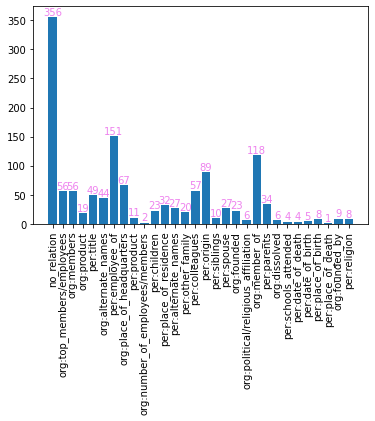

In [59]:
x = list(dict_label_to_num.keys())
y = [len(no_match[no_match['pred_label']==d]) for d in x]
plt.bar(x,y)
plt.xticks(rotation=90)
for i, v in enumerate(x):
    plt.text(str(v), y[i], y[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 10, 
             color='violet',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)
plt.show()

In [60]:
pred_count = pd.DataFrame(y,x).sort_values(by=0,ascending=False).transpose()
pred_count.iloc[:,:10]

,no_relation,per:employee_of,org:member_of,per:origin,org:place_of_headquarters,per:colleagues,org:members,org:top_members/employees,per:title,org:alternate_names
0,356,151,118,89,67,57,56,56,49,44


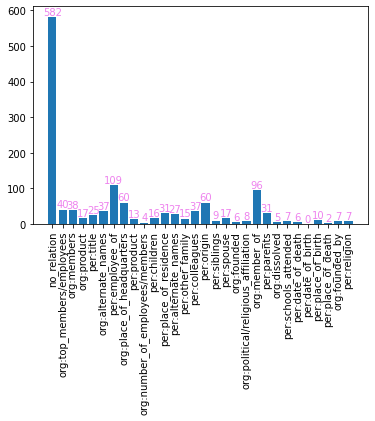

In [61]:
x = list(dict_label_to_num.keys())
y = [len(no_match[no_match['gold_label']==d]) for d in x]
plt.bar(x,y)
plt.xticks(rotation=90)
for i, v in enumerate(x):
    plt.text(str(v), y[i], y[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 10, 
             color='violet',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)
plt.show()

In [62]:
pred_count.values.reshape(-1)

array([356, 151, 118,  89,  67,  57,  56,  56,  49,  44,  34,  32,  27,
        27,  23,  23,  20,  19,  11,  10,   9,   8,   8,   6,   6,   5,
         4,   4,   2,   1])

In [63]:
gold_count = pd.DataFrame(y,x).sort_values(by=0,ascending=False).transpose()
gold_count.iloc[:,:10]

,no_relation,per:employee_of,org:member_of,org:place_of_headquarters,per:origin,org:top_members/employees,org:members,org:alternate_names,per:colleagues,per:parents
0,582,109,96,60,60,40,38,37,37,31


In [64]:
pg_count=pd.DataFrame([pred_count.columns,pred_count.values.reshape(-1),gold_count.columns,gold_count.values.reshape(-1),pred_count.columns == gold_count.columns],index=['pred_lable','pred_count','gold_label','gold_count','pred=gold'])
pg_count.iloc[:,:15]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
pred_lable,no_relation,per:employee_of,org:member_of,per:origin,org:place_of_headquarters,per:colleagues,org:members,org:top_members/employees,per:title,org:alternate_names,per:parents,per:place_of_residence,per:spouse,per:alternate_names,org:founded
pred_count,356,151,118,89,67,57,56,56,49,44,34,32,27,27,23
gold_label,no_relation,per:employee_of,org:member_of,org:place_of_headquarters,per:origin,org:top_members/employees,org:members,org:alternate_names,per:colleagues,per:parents,per:place_of_residence,per:alternate_names,per:title,per:spouse,org:product
gold_count,582,109,96,60,60,40,38,37,37,31,31,27,25,17,17
pred=gold,True,True,True,False,False,False,True,False,False,False,False,False,False,False,False


In [65]:
set(pred_count.columns[:15])-set(gold_count.columns[:15])

{'org:founded'}

In [66]:
set(gold_count.columns[:15])-set(pred_count.columns[:15])

{'org:product'}

In [67]:
pg_count.iloc[:,15:]

,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
pred_lable,per:children,per:other_family,org:product,per:product,per:siblings,org:founded_by,per:place_of_birth,per:religion,org:political/religious_affiliation,org:dissolved,per:date_of_birth,per:schools_attended,per:date_of_death,org:number_of_employees/members,per:place_of_death
pred_count,23,20,19,11,10,9,8,8,6,6,5,4,4,2,1
gold_label,per:children,per:other_family,per:product,per:place_of_birth,per:siblings,org:political/religious_affiliation,per:schools_attended,org:founded_by,per:religion,org:founded,per:date_of_death,org:dissolved,org:number_of_employees/members,per:place_of_death,per:date_of_birth
gold_count,16,15,13,10,9,8,7,7,7,6,6,5,4,2,0
pred=gold,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False


In [151]:
# tp.iloc[:,13:].describe(include='all').iloc[:,:].transpose()

,count,mean,std,min,25%,50%,75%,max
no_relation,6494.0,0.257754,0.425362,3.435717e-07,8.176830e-06,0.000041,0.683676,0.999945
org:top_members/employees,6494.0,0.134566,0.339245,2.154067e-06,1.114097e-05,0.000021,0.000102,0.999892
org:members,6494.0,0.015430,0.115889,4.043274e-07,2.966692e-06,0.000009,0.000043,0.998508
org:product,6494.0,0.012085,0.106805,6.647778e-07,2.388252e-06,0.000008,0.000031,0.998967
per:title,6494.0,0.068318,0.250198,1.242194e-06,8.050804e-06,0.000020,0.000056,0.999770
org:alternate_names,6494.0,0.041983,0.197497,1.591467e-06,4.492491e-06,0.000013,0.000042,0.999637
per:employee_of,6494.0,0.116910,0.316941,1.839379e-06,6.012148e-06,0.000016,0.000119,0.999819
org:place_of_headquarters,6494.0,0.037745,0.186295,5.120315e-07,3.605833e-06,0.000009,0.000044,0.999407
per:product,6494.0,0.003787,0.055725,2.899918e-07,1.850236e-06,0.000009,0.000028,0.997442
org:number_of_employees/members,6494.0,0.001193,0.031345,2.250208e-07,2.334531e-06,0.000007,0.000018,0.990889


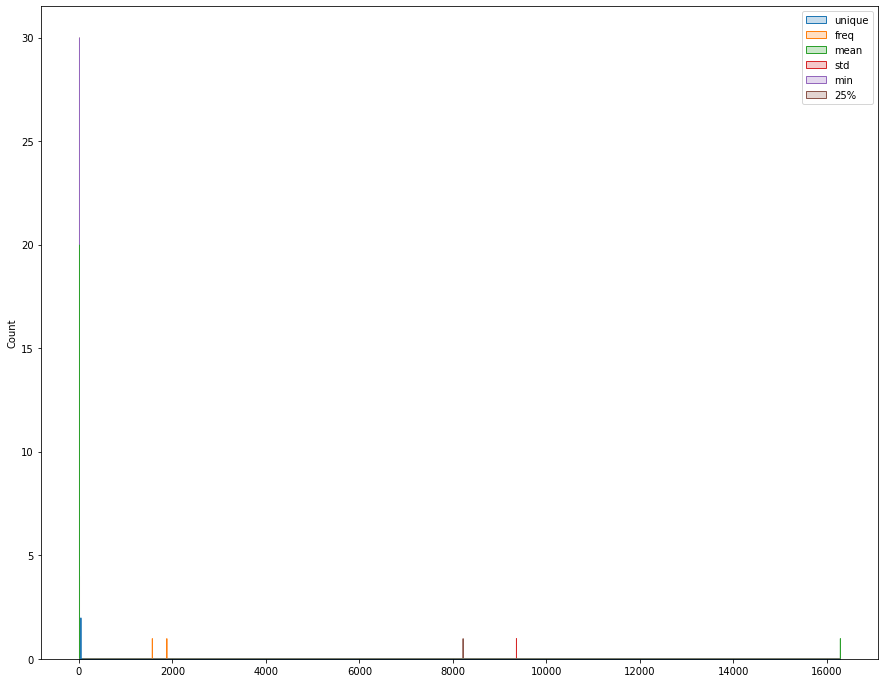

In [69]:
# plt.figure(figsize=(15, 12))
# s = sns.histplot(dev_loss_nost.iloc[:,:].describe(include='all').iloc[[1,3,4,5,6,7],:].transpose(),element="step")

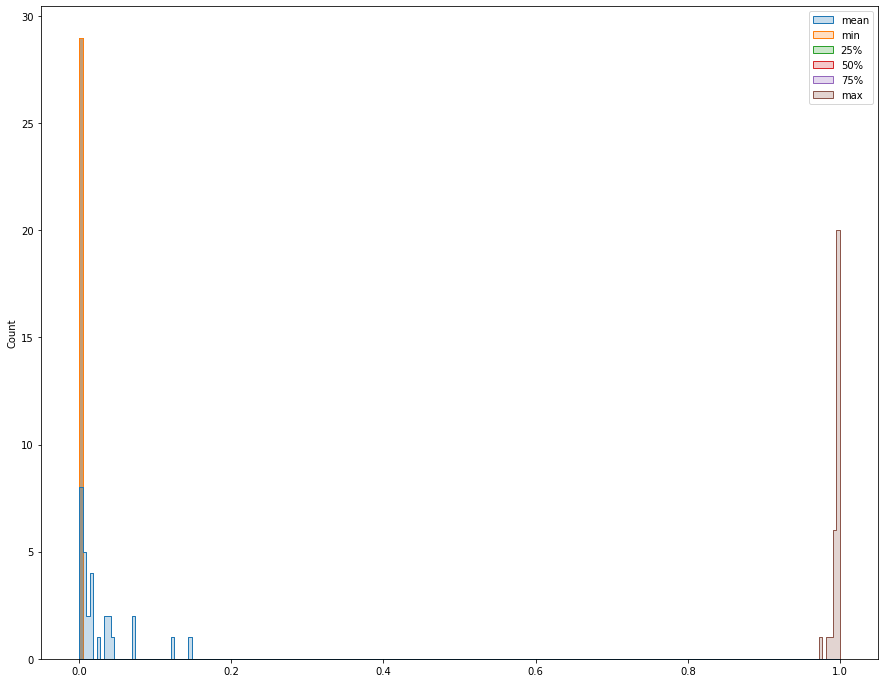

In [110]:
# plt.figure(figsize=(15, 12))
# s = sns.histplot(dev_loss_nost.iloc[:,4:].describe(include='all').iloc[[1,3,4,5,6,7],:].transpose(),element="step")

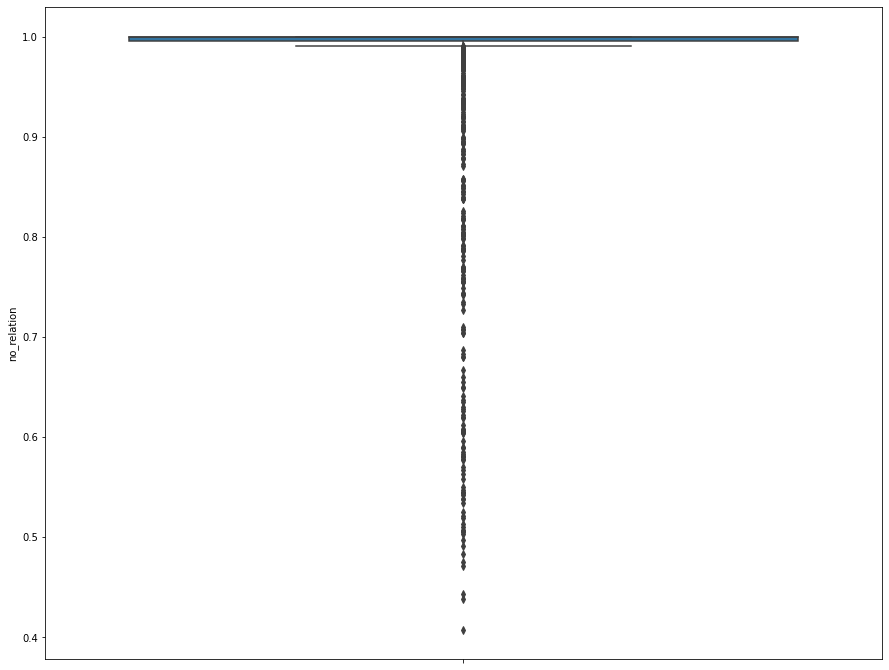

In [100]:
# plt.figure(figsize=(15, 12))
# s = sns.boxplot(y=dev_loss_nost[dev_loss_nost['pred_label']=='no_relation']['no_relation'])